In [1]:
import pandas as pd

In [3]:
df=pd.read_csv('Business Challenge/Wildfire CSV/emsr_wildfire_damage_data.csv',low_memory=False)

In [5]:
df.size

39999234

In [170]:
df.head()

,fid,obj_type,info,damage_gra,event_time,country,filename,txt,act_id,interpret,...,functional,road_type,simplified,objectid,length,area,area_ha,emsr_id,fwi,wui_label
0,1,"211-Highways, Streets and Roads",21120-Primary Road,No visible damage,2019-09-15,Greece,EMSR390_AOI01_GRA_PRODUCT_transportationL_r1_v2.shx,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1789.639466,0.0,0.0,390,42.304688,forest_interface
1,2,"211-Highways, Streets and Roads",21120-Primary Road,No visible damage,2019-09-15,Greece,EMSR390_AOI01_GRA_PRODUCT_transportationL_r1_v2.shx,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,564.223136,0.0,0.0,390,42.304688,forest_interface
2,3,"211-Highways, Streets and Roads",21120-Primary Road,No visible damage,2019-09-15,Greece,EMSR390_AOI01_GRA_PRODUCT_transportationL_r1_v2.shx,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,466.417476,0.0,0.0,390,42.304688,forest_intermix
3,4,"211-Highways, Streets and Roads",21120-Primary Road,No visible damage,2019-09-15,Greece,EMSR390_AOI01_GRA_PRODUCT_transportationL_r1_v2.shx,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,533.522591,0.0,0.0,390,42.304688,forest_intermix
4,5,"211-Highways, Streets and Roads",21120-Primary Road,No visible damage,2019-09-15,Greece,EMSR390_AOI01_GRA_PRODUCT_transportationL_r1_v2.shx,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4281.168938,0.0,0.0,390,42.304688,other


In [9]:
column_list = df.columns.tolist()
print(column_list)


['fid', 'obj_type', 'info', 'damage_gra', 'event_time', 'country', 'filename', 'txt', 'act_id', 'interpret', 'settl_type', 'subtype', 'functional', 'road_type', 'simplified', 'objectid', 'length', 'area', 'area_ha', 'emsr_id', 'fwi', 'wui_label']


In [11]:
import pandas as pd

# List of all 22 columns in your DataFrame
columns_to_check = [
    'fid', 'obj_type', 'info', 'damage_gra', 'event_time', 'country', 'filename', 'txt', 
    'act_id', 'interpret', 'settl_type', 'subtype', 'functional', 'road_type', 'simplified', 
    'objectid', 'length', 'area', 'area_ha', 'emsr_id', 'fwi', 'wui_label'
]

# Create a summary dictionary
summary = {
    col: {
        'Unique Count': df[col].nunique(),
        'Null Count': df[col].isna().sum(),
        'NaN Count': df[col].isna().sum()  # NaN values are included in .isna()
    } 
    for col in columns_to_check
}

# Get total null count and NaN count across all columns
total_nulls = df[columns_to_check].isna().sum().sum()
total_nans = df[columns_to_check].isna().sum().sum()  # NaN values are included in .isna()

# Add total row
summary['Total Nulls (All)'] = {'Unique Count': None, 'Null Count': total_nulls, 'NaN Count': total_nans}

# Convert to DataFrame for readability
summary_df = pd.DataFrame(summary).T

# Display the summary
print(summary_df)  # This will print it in the terminal/console


                   Unique Count  Null Count   NaN Count
fid                   1818147.0         0.0         0.0
obj_type                   56.0    362229.0    362229.0
info                      113.0    466421.0    466421.0
damage_gra                 29.0      1168.0      1168.0
event_time                141.0         0.0         0.0
country                    19.0         0.0         0.0
filename                 1082.0         0.0         0.0
txt                       256.0   1446129.0   1446129.0
act_id                     45.0   1423163.0   1423163.0
interpret                   5.0   1684508.0   1684508.0
settl_type                 22.0   1610870.0   1610870.0
subtype                    28.0   1451169.0   1451169.0
functional                  9.0   1709299.0   1709299.0
road_type                   9.0   1663888.0   1663888.0
simplified                 12.0   1815513.0   1815513.0
objectid                  616.0   1816263.0   1816263.0
length                1593472.0         0.0     

In [13]:
# Get unique filenames
unique_filenames = df['filename'].dropna().unique()

# Check if each filename ends with '.shx'
non_shx_files = [name for name in unique_filenames if not str(name).lower().endswith('.shx')]

# Get unique extensions from non-shp files
unique_extensions = set(name.split('.')[-1] for name in non_shx_files if '.' in str(name))

# Print results
print(f"Total unique filenames: {len(unique_filenames)}")
print(f"Filenames NOT ending in '.shx': {len(non_shx_files)}")
print(f"Other file extensions found: {unique_extensions}")
print(f"Examples of non-shp filenames: {non_shx_files[:10]}")  # Show first 10 non-shp files

Total unique filenames: 1082
Filenames NOT ending in '.shx': 0
Other file extensions found: set()
Examples of non-shp filenames: []


In [31]:
import pandas as pd
import numpy as np


# Convert to DataFrame with column names
filename_df['filename']= pd.DataFrame(df['filename'].unique())

# Display the DataFrame
filename_df

,0,filename
0,EMSR390_AOI01_GRA_PRODUCT_transportationL_r1_v...,EMSR390_AOI01_GRA_PRODUCT_transportationL_r1_v...
1,EMSR390_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v...,EMSR390_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v...
2,EMSR390_AOI01_GRA_PRODUCT_builtUpA_r1_v2.shx,EMSR390_AOI01_GRA_PRODUCT_builtUpA_r1_v2.shx
3,EMSR390_AOI01_GRA_PRODUCT_observedEventA_r1_v2...,EMSR390_AOI01_GRA_PRODUCT_observedEventA_r1_v2...
4,EMSR390_AOI01_GRA_PRODUCT_facilitiesA_r1_v2.shx,EMSR390_AOI01_GRA_PRODUCT_facilitiesA_r1_v2.shx
...,...,...
1077,EMSR443_AOI01_GRA_PRODUCT_builtUpP_r1_v1.shx,EMSR443_AOI01_GRA_PRODUCT_builtUpP_r1_v1.shx
1078,EMSR443_AOI01_GRA_PRODUCT_transportationL_r1_v...,EMSR443_AOI01_GRA_PRODUCT_transportationL_r1_v...
1079,EMSR368_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v...,EMSR368_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v...
1080,EMSR368_AOI01_GRA_PRODUCT_transportationL_r1_v...,EMSR368_AOI01_GRA_PRODUCT_transportationL_r1_v...


In [33]:
# Extract everything before the first underscore and store in 'activation_id'
filename_df['activation_id'] = filename_df['filename'].str.extract(r'^([^_]+)')

# Display the first few rows with the new column
filename_df.head(100)

,0,filename,activation_id
0,EMSR390_AOI01_GRA_PRODUCT_transportationL_r1_v...,EMSR390_AOI01_GRA_PRODUCT_transportationL_r1_v...,EMSR390
1,EMSR390_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v...,EMSR390_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v...,EMSR390
2,EMSR390_AOI01_GRA_PRODUCT_builtUpA_r1_v2.shx,EMSR390_AOI01_GRA_PRODUCT_builtUpA_r1_v2.shx,EMSR390
3,EMSR390_AOI01_GRA_PRODUCT_observedEventA_r1_v2...,EMSR390_AOI01_GRA_PRODUCT_observedEventA_r1_v2...,EMSR390
4,EMSR390_AOI01_GRA_PRODUCT_facilitiesA_r1_v2.shx,EMSR390_AOI01_GRA_PRODUCT_facilitiesA_r1_v2.shx,EMSR390
...,...,...,...
95,EMSR530_AOI02_GRA_PRODUCT_facilitiesL_r1_v1.shx,EMSR530_AOI02_GRA_PRODUCT_facilitiesL_r1_v1.shx,EMSR530
96,EMSR530_AOI02_GRA_PRODUCT_naturalLandUseA_r1_v...,EMSR530_AOI02_GRA_PRODUCT_naturalLandUseA_r1_v...,EMSR530
97,EMSR302_02VENTASDEARRIBA_GRA_v1_transportation...,EMSR302_02VENTASDEARRIBA_GRA_v1_transportation...,EMSR302
98,EMSR302_02VENTASDEARRIBA_GRA_v1_natural_land_u...,EMSR302_02VENTASDEARRIBA_GRA_v1_natural_land_u...,EMSR302


In [35]:
len(filename_df['activation_id'].unique())

171

In [37]:
import pandas as pd

# Define the regex pattern for "EMSR" followed by three digits
pattern = r'^EMSR\d{3}$'

# Filter rows in filename_df that match the pattern
filtered_filename_df = filename_df[filename_df['activation_id'].str.match(pattern, na=False)]

# Display the filtered DataFrame
print(filtered_filename_df)


                                                      0  \
0     EMSR390_AOI01_GRA_PRODUCT_transportationL_r1_v...   
1     EMSR390_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v...   
2          EMSR390_AOI01_GRA_PRODUCT_builtUpA_r1_v2.shx   
3     EMSR390_AOI01_GRA_PRODUCT_observedEventA_r1_v2...   
4       EMSR390_AOI01_GRA_PRODUCT_facilitiesA_r1_v2.shx   
...                                                 ...   
1077       EMSR443_AOI01_GRA_PRODUCT_builtUpP_r1_v1.shx   
1078  EMSR443_AOI01_GRA_PRODUCT_transportationL_r1_v...   
1079  EMSR368_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v...   
1080  EMSR368_AOI01_GRA_PRODUCT_transportationL_r1_v...   
1081  EMSR368_AOI01_GRA_PRODUCT_observedEventA_r1_v3...   

                                               filename activation_id  
0     EMSR390_AOI01_GRA_PRODUCT_transportationL_r1_v...       EMSR390  
1     EMSR390_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v...       EMSR390  
2          EMSR390_AOI01_GRA_PRODUCT_builtUpA_r1_v2.shx       EMSR390  
3  

In [39]:
import pandas as pd

# Define the regex pattern for "EMSR" followed by three digits
pattern = r'^EMSR\d{3}$'

# Filter rows that do not match the pattern
missing_activation_ids = filename_df[~filename_df['activation_id'].str.match(pattern, na=False)]

# Print the missing rows
print(missing_activation_ids)


                                                     0  \
185  EMSR-050_01Braganca_20130709_ESP_FI_v1_Crisis_...   
278  EMSR-050_01Braganca_20130709_PRT_FI_v1_Crisis_...   
483  EMSR-036_01Strontian_20130401_GBR_FI_v1_eventa...   

                                              filename activation_id  
185  EMSR-050_01Braganca_20130709_ESP_FI_v1_Crisis_...      EMSR-050  
278  EMSR-050_01Braganca_20130709_PRT_FI_v1_Crisis_...      EMSR-050  
483  EMSR-036_01Strontian_20130401_GBR_FI_v1_eventa...      EMSR-036  


In [41]:
import pandas as pd

# Replace activation_id values with EMSR### format (remove hyphen)
filename_df['activation_id'] = filename_df['activation_id'].str.replace(r'EMSR-(\d{3})', r'EMSR\1', regex=True)

# Print the updated DataFrame
print(filename_df)


                                                      0  \
0     EMSR390_AOI01_GRA_PRODUCT_transportationL_r1_v...   
1     EMSR390_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v...   
2          EMSR390_AOI01_GRA_PRODUCT_builtUpA_r1_v2.shx   
3     EMSR390_AOI01_GRA_PRODUCT_observedEventA_r1_v2...   
4       EMSR390_AOI01_GRA_PRODUCT_facilitiesA_r1_v2.shx   
...                                                 ...   
1077       EMSR443_AOI01_GRA_PRODUCT_builtUpP_r1_v1.shx   
1078  EMSR443_AOI01_GRA_PRODUCT_transportationL_r1_v...   
1079  EMSR368_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v...   
1080  EMSR368_AOI01_GRA_PRODUCT_transportationL_r1_v...   
1081  EMSR368_AOI01_GRA_PRODUCT_observedEventA_r1_v3...   

                                               filename activation_id  
0     EMSR390_AOI01_GRA_PRODUCT_transportationL_r1_v...       EMSR390  
1     EMSR390_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v...       EMSR390  
2          EMSR390_AOI01_GRA_PRODUCT_builtUpA_r1_v2.shx       EMSR390  
3  

In [43]:
import pandas as pd

# Define the regex pattern
pattern = r'^EMSR\d{3}_AOI\d{2}_GRA.*_r\d_v\d.shx'

# Apply the filter on the 'filename' column
filtered_filename_df = filename_df[filename_df['filename'].str.match(pattern, na=False)]

# Print the filtered DataFrame
filtered_filename_df


,0,filename,activation_id
0,EMSR390_AOI01_GRA_PRODUCT_transportationL_r1_v...,EMSR390_AOI01_GRA_PRODUCT_transportationL_r1_v...,EMSR390
1,EMSR390_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v...,EMSR390_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v...,EMSR390
2,EMSR390_AOI01_GRA_PRODUCT_builtUpA_r1_v2.shx,EMSR390_AOI01_GRA_PRODUCT_builtUpA_r1_v2.shx,EMSR390
3,EMSR390_AOI01_GRA_PRODUCT_observedEventA_r1_v2...,EMSR390_AOI01_GRA_PRODUCT_observedEventA_r1_v2...,EMSR390
4,EMSR390_AOI01_GRA_PRODUCT_facilitiesA_r1_v2.shx,EMSR390_AOI01_GRA_PRODUCT_facilitiesA_r1_v2.shx,EMSR390
...,...,...,...
1077,EMSR443_AOI01_GRA_PRODUCT_builtUpP_r1_v1.shx,EMSR443_AOI01_GRA_PRODUCT_builtUpP_r1_v1.shx,EMSR443
1078,EMSR443_AOI01_GRA_PRODUCT_transportationL_r1_v...,EMSR443_AOI01_GRA_PRODUCT_transportationL_r1_v...,EMSR443
1079,EMSR368_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v...,EMSR368_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v...,EMSR368
1080,EMSR368_AOI01_GRA_PRODUCT_transportationL_r1_v...,EMSR368_AOI01_GRA_PRODUCT_transportationL_r1_v...,EMSR368


In [45]:
import pandas as pd

# Find filenames that are NOT in the filtered DataFrame
missing_filenames = filename_df[~filename_df['filename'].isin(filtered_filename_df['filename'])]

# Print the missing filenames
missing_filenames

,0,filename,activation_id
14,EMSR207_06MADEIRA_02GRADING_MONIT01_v2_25000_c...,EMSR207_06MADEIRA_02GRADING_MONIT01_v2_25000_c...,EMSR207
15,EMSR207_06MADEIRA_02GRADING_MONIT01_v2_25000_s...,EMSR207_06MADEIRA_02GRADING_MONIT01_v2_25000_s...,EMSR207
16,EMSR207_06MADEIRA_02GRADING_MONIT01_v2_25000_t...,EMSR207_06MADEIRA_02GRADING_MONIT01_v2_25000_t...,EMSR207
26,EMSR679_AOI01_GRA_PRODUCT_transportationL_v1.shx,EMSR679_AOI01_GRA_PRODUCT_transportationL_v1.shx,EMSR679
27,EMSR679_AOI01_GRA_PRODUCT_facilitiesA_v1.shx,EMSR679_AOI01_GRA_PRODUCT_facilitiesA_v1.shx,EMSR679
...,...,...,...
1067,EMSR127_08MOTRIL_02GRADING_v1_21000_settlement...,EMSR127_08MOTRIL_02GRADING_v1_21000_settlement...,EMSR127
1068,EMSR127_08MOTRIL_02GRADING_v1_21000_crisis_inf...,EMSR127_08MOTRIL_02GRADING_v1_21000_crisis_inf...,EMSR127
1069,EMSR127_02HUESA_02GRADING_MONIT03_v3_25000_hyd...,EMSR127_02HUESA_02GRADING_MONIT03_v3_25000_hyd...,EMSR127
1070,EMSR127_02HUESA_02GRADING_MONIT03_v3_25000_tra...,EMSR127_02HUESA_02GRADING_MONIT03_v3_25000_tra...,EMSR127


In [47]:
659+423 #unique file names

1082

In [49]:
len(filtered_filename_df['activation_id'].unique())

109

In [51]:
len(missing_filenames['activation_id'].unique())

62

In [53]:
109+62 #unique activation_ids

171

In [55]:
import re

# Define the regex pattern to match the specified filename format
pattern = re.compile(r'^(\w+)_AOI\d{2}_GRA_.*_r\d_v\d.shx')

# Function to check if the filename matches the pattern
def match_pattern(row):
    activation_id = row['activation_id']
    filename = row['filename']
    return bool(pattern.match(filename) and filename.startswith(activation_id))

# Count the number of rows matching the pattern
matching_count = filtered_filename_df.apply(match_pattern, axis=1).sum()
matching_count

423

In [57]:
import re

# Define the regex pattern to match the specified filename format
pattern = re.compile(r'^(\w+)_AOI\d{2}_GRA_MONI.*_r\d_v\d.shx')

# Function to check if the filename matches the pattern
def match_pattern(row):
    activation_id = row['activation_id']
    filename = row['filename']
    return bool(pattern.match(filename) and filename.startswith(activation_id))

# Count the number of rows matching the pattern
matching_count = filtered_filename_df.apply(match_pattern, axis=1).sum()
matching_count

30

In [59]:
import pandas as pd
import re

# Function to extract the required portion
def extract_filename_part(filename):
    match = re.match(r'^(\w+_AOI\d{2}_GRA_[^_]+_)', filename)
    return match.group(1) if match else None

# Apply function to the filename column
filtered_filename_df['extracted_part'] = filtered_filename_df['filename'].apply(extract_filename_part)

# Ensure full filenames are displayed
pd.set_option('display.max_colwidth', None)

# Print the new dataframe
print(filtered_filename_df.to_string(index=False))


                                                  0                                            filename activation_id             extracted_part
EMSR390_AOI01_GRA_PRODUCT_transportationL_r1_v2.shx EMSR390_AOI01_GRA_PRODUCT_transportationL_r1_v2.shx       EMSR390 EMSR390_AOI01_GRA_PRODUCT_
EMSR390_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v2.shx EMSR390_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v2.shx       EMSR390 EMSR390_AOI01_GRA_PRODUCT_
       EMSR390_AOI01_GRA_PRODUCT_builtUpA_r1_v2.shx        EMSR390_AOI01_GRA_PRODUCT_builtUpA_r1_v2.shx       EMSR390 EMSR390_AOI01_GRA_PRODUCT_
 EMSR390_AOI01_GRA_PRODUCT_observedEventA_r1_v2.shx  EMSR390_AOI01_GRA_PRODUCT_observedEventA_r1_v2.shx       EMSR390 EMSR390_AOI01_GRA_PRODUCT_
    EMSR390_AOI01_GRA_PRODUCT_facilitiesA_r1_v2.shx     EMSR390_AOI01_GRA_PRODUCT_facilitiesA_r1_v2.shx       EMSR390 EMSR390_AOI01_GRA_PRODUCT_
 EMSR369_AOI03_GRA_PRODUCT_observedEventA_r1_v2.shx  EMSR369_AOI03_GRA_PRODUCT_observedEventA_r1_v2.shx       EMSR369 EMSR369_AOI0

C:\Users\donri\AppData\Local\Temp\ipykernel_22184\2914547243.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_filename_df['extracted_part'] = filtered_filename_df['filename'].apply(extract_filename_part)


In [61]:

# Function to extract and format the required portion
def format_filename(filename):
    # Extract initial portion before the underscore after the word following "GRA"
    match = re.match(r'^(\w+_AOI\d{2}_GRA_[^_]+)_', filename)
    base_part = match.group(1) if match else None

    # Extract the last 5 characters before .shx
    last_five_chars_match = re.search(r'(.{5})\.shx$', filename)
    last_five_chars = last_five_chars_match.group(1) if last_five_chars_match else ''

    # Extract the r\d and v\d part
    r_v_match = re.search(r'_(r\d)_v(\d)', filename)
    if r_v_match:
        r_part, v_part = r_v_match.groups()
        formatted_part = f"{base_part}_{r_part}_RTP01_v{v_part}_vector.zip"
    else:
        formatted_part = None

    return formatted_part

# Apply function to the filename column
filtered_filename_df['formatted_filename'] = filtered_filename_df['filename'].apply(format_filename)

# Ensure full filenames are displayed
pd.set_option('display.max_colwidth', None)

# Print the new dataframe
print(filtered_filename_df.to_string(index=False))


                                                  0                                            filename activation_id             extracted_part                               formatted_filename
EMSR390_AOI01_GRA_PRODUCT_transportationL_r1_v2.shx EMSR390_AOI01_GRA_PRODUCT_transportationL_r1_v2.shx       EMSR390 EMSR390_AOI01_GRA_PRODUCT_ EMSR390_AOI01_GRA_PRODUCT_r1_RTP01_v2_vector.zip
EMSR390_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v2.shx EMSR390_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v2.shx       EMSR390 EMSR390_AOI01_GRA_PRODUCT_ EMSR390_AOI01_GRA_PRODUCT_r1_RTP01_v2_vector.zip
       EMSR390_AOI01_GRA_PRODUCT_builtUpA_r1_v2.shx        EMSR390_AOI01_GRA_PRODUCT_builtUpA_r1_v2.shx       EMSR390 EMSR390_AOI01_GRA_PRODUCT_ EMSR390_AOI01_GRA_PRODUCT_r1_RTP01_v2_vector.zip
 EMSR390_AOI01_GRA_PRODUCT_observedEventA_r1_v2.shx  EMSR390_AOI01_GRA_PRODUCT_observedEventA_r1_v2.shx       EMSR390 EMSR390_AOI01_GRA_PRODUCT_ EMSR390_AOI01_GRA_PRODUCT_r1_RTP01_v2_vector.zip
    EMSR390_AOI01_GRA_PRODUCT_

C:\Users\donri\AppData\Local\Temp\ipykernel_22184\2921674828.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_filename_df['formatted_filename'] = filtered_filename_df['filename'].apply(format_filename)


In [63]:
len(filtered_filename_df['formatted_filename'].unique())

111

In [569]:
import os
import time
import requests
import zipfile
import pandas as pd

# Define the base URL
base_url = "https://cems-mapping-website.s3.eu-west-1.amazonaws.com/static/activations/"

# Set up the main directories
base_download_path = os.path.join(os.getcwd(), "Business Challenge", "ShapeFiles")
os.makedirs(base_download_path, exist_ok=True)

# Remove duplicate entries from the DataFrame
filtered_filename_df = filtered_filename_df.drop_duplicates(subset=["activation_id", filtered_filename_df.columns[-1]])

# Initialize counters and lists
total_files = len(filtered_filename_df)
download_count = 0
invalid_downloads = []

# Loop through the filtered DataFrame with a delay between requests
for index, row in filtered_filename_df.iterrows():
    try:
        activation_id = row["activation_id"]
        filename = row.iloc[-1]  # Last column value (filename)
        country = df.loc[index, "country"]  # Match country from `df`

        # Construct the full URL
        file_url = f"{base_url}{activation_id}/{filename}"

        # Create country-specific folder if it doesn't exist
        country_folder = os.path.join(base_download_path, country)
        os.makedirs(country_folder, exist_ok=True)

        # Define the local file path
        local_zip_path = os.path.join(country_folder, filename)

        # Skip if file already exists
        if os.path.exists(local_zip_path.replace(".zip", "")):  # Check if unzipped folder exists
            print(f"Skipping already downloaded: {filename}")
            continue

        # Download the file with retries
        for attempt in range(3):  # Retry up to 3 times
            response = requests.get(file_url, stream=True)
            if response.status_code == 200:
                with open(local_zip_path, "wb") as file:
                    for chunk in response.iter_content(chunk_size=1024):
                        file.write(chunk)
                break  # Successful download, exit retry loop
            else:
                time.sleep(5)  # Wait before retrying

        if response.status_code != 200:
            invalid_downloads.append(filename)
            print(f"Failed to download: {filename}")
            continue

        # Unzip the file
        with zipfile.ZipFile(local_zip_path, "r") as zip_ref:
            zip_ref.extractall(country_folder)

        # Delete the zip file after extraction to save memory
        os.remove(local_zip_path)

        # Update progress counter
        download_count += 1
        print(f"Downloaded and extracted {download_count}/{total_files}: {filename}")

        time.sleep(2)  # Add a delay to avoid hitting request limits

    except Exception as e:
        invalid_downloads.append(filename)
        print(f"Error processing {filename}: {str(e)}")

# Save invalid downloads to a CSV file
invalid_downloads_df = pd.DataFrame(invalid_downloads, columns=["Invalid Downloads"])
invalid_downloads_df.to_csv("invalid_downloads.csv", index=False)

# Final Summary
print(f"\nDownload completed: {download_count}/{total_files} files successfully downloaded and extracted.")
print(f"Invalid downloads saved to: invalid_downloads.csv")


Downloaded and extracted 1/111: EMSR390_AOI01_GRA_PRODUCT_r1_RTP01_v2_vector.zip


KeyboardInterrupt: 

In [571]:
len(missing_filenames['filename'].unique())

659

In [573]:
len(missing_filenames['activation_id'].unique())

62

In [575]:
missing_filenames['filename']

14      EMSR207_06MADEIRA_02GRADING_MONIT01_v2_25000_crisis_information_poly_grading.shx
15             EMSR207_06MADEIRA_02GRADING_MONIT01_v2_25000_settlements_poly_grading.shx
16          EMSR207_06MADEIRA_02GRADING_MONIT01_v2_25000_transportation_line_grading.shx
26                                      EMSR679_AOI01_GRA_PRODUCT_transportationL_v1.shx
27                                          EMSR679_AOI01_GRA_PRODUCT_facilitiesA_v1.shx
                                              ...                                       
1067                    EMSR127_08MOTRIL_02GRADING_v1_21000_settlements_poly_grading.shx
1068             EMSR127_08MOTRIL_02GRADING_v1_21000_crisis_information_poly_grading.shx
1069             EMSR127_02HUESA_02GRADING_MONIT03_v3_25000_hydrography_line_grading.shx
1070          EMSR127_02HUESA_02GRADING_MONIT03_v3_25000_transportation_line_grading.shx
1071            EMSR127_02HUESA_02GRADING_MONIT03_v3_25000_settlements_point_grading.shx
Name: filename, Lengt

In [577]:
missing_filenames.head()

,filename,activation_id
14,EMSR207_06MADEIRA_02GRADING_MONIT01_v2_25000_crisis_information_poly_grading.shx,EMSR207
15,EMSR207_06MADEIRA_02GRADING_MONIT01_v2_25000_settlements_poly_grading.shx,EMSR207
16,EMSR207_06MADEIRA_02GRADING_MONIT01_v2_25000_transportation_line_grading.shx,EMSR207
26,EMSR679_AOI01_GRA_PRODUCT_transportationL_v1.shx,EMSR679
27,EMSR679_AOI01_GRA_PRODUCT_facilitiesA_v1.shx,EMSR679


In [579]:
import re

# Define the regex pattern
pattern = re.compile(r'^EMSR\d{3}_AOI\d{2}_GRA_PRODUCT_.*')

# Filter unique_prefixes_df where common_prefix matches the pattern
matching_activations1 = missing_filenames[missing_filenames["filename"].apply(lambda x: bool(pattern.match(x)))]

# Count the number of unique activation_id values
unique_activation_count = matching_activations["activation_id"].nunique()

# Print the result
print("Number of unique activation IDs matching the pattern:", unique_activation_count)


Number of unique activation IDs matching the pattern: 13


In [581]:
import re

# Define the regex pattern
pattern = re.compile(r'^EMSR\d{3}_.*_02GRADING_v2.*')

# Filter unique_prefixes_df where common_prefix matches the pattern
matching_activations2 = missing_filenames[missing_filenames["filename"].apply(lambda x: bool(pattern.match(x)))]

# Count the number of unique activation_id values
unique_activation_count = matching_activations["activation_id"].nunique()

# Print the result
print("Number of unique activation IDs matching the pattern:", unique_activation_count)

Number of unique activation IDs matching the pattern: 13


In [583]:
import re

# Define the regex pattern
pattern = re.compile(r'^EMSR\d{3}_.*_02GRADING_MONIT01_v2.*')

# Filter unique_prefixes_df where common_prefix matches the pattern
matching_activations3 = missing_filenames[missing_filenames["filename"].apply(lambda x: bool(pattern.match(x)))]

# Count the number of unique activation_id values
unique_activation_count = matching_activations["activation_id"].nunique()

# Print the result
print("Number of unique activation IDs matching the pattern:", unique_activation_count)

Number of unique activation IDs matching the pattern: 13


In [585]:
matching_activations1['filename'].count()

41

In [587]:
matching_activations2['filename'].count()

103

In [589]:
missing_filenames['filename'].count()

659

In [591]:
matching_activations1.head()

,filename,activation_id
26,EMSR679_AOI01_GRA_PRODUCT_transportationL_v1.shx,EMSR679
27,EMSR679_AOI01_GRA_PRODUCT_facilitiesA_v1.shx,EMSR679
28,EMSR679_AOI01_GRA_PRODUCT_naturalLandUseA_v1.shx,EMSR679
29,EMSR679_AOI01_GRA_PRODUCT_builtUpA_v1.shx,EMSR679
290,EMSR719_AOI01_GRA_PRODUCT_naturalLandUseA_v1.shx,EMSR719


In [593]:
matching_activations2.head()

,filename,activation_id
30,EMSR207_01MIRANDADOCORVO_02GRADING_v2_25000_transportation_line_grading.shx,EMSR207
31,EMSR207_01MIRANDADOCORVO_02GRADING_v2_25000_crisis_information_poly_grading.shx,EMSR207
56,EMSR213_07SANVITOLOCAPO_02GRADING_v2_42000_utilities_poly_grading.shx,EMSR213
57,EMSR213_07SANVITOLOCAPO_02GRADING_v2_42000_transportation_line_grading.shx,EMSR213
58,EMSR213_07SANVITOLOCAPO_02GRADING_v2_42000_hydrography_line_grading.shx,EMSR213


In [597]:
matching_activations1.size

82

In [599]:
matching_activations2.size

206

In [601]:
# Correcting the logic to ensure unnecessary text is removed properly
def generate_corrected_download_link(filename):
    import re

    # Extracting the relevant part before _PRODUCT and after version
    match = re.match(r"(.+_PRODUCT)_.*_v(\d+)\.shx", filename)
    if match:
        base_name, version = match.groups()
        return f"{base_name}_v{version}.zip"
    return None

# Applying function to create the corrected Download_Link column
matching_activations1["Download_Link"] = matching_activations1["filename"].apply(generate_corrected_download_link)


matching_activations1


C:\Users\donri\AppData\Local\Temp\ipykernel_24868\1463674376.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matching_activations1["Download_Link"] = matching_activations1["filename"].apply(generate_corrected_download_link)


,filename,activation_id,Download_Link
26,EMSR679_AOI01_GRA_PRODUCT_transportationL_v1.shx,EMSR679,EMSR679_AOI01_GRA_PRODUCT_v1.zip
27,EMSR679_AOI01_GRA_PRODUCT_facilitiesA_v1.shx,EMSR679,EMSR679_AOI01_GRA_PRODUCT_v1.zip
28,EMSR679_AOI01_GRA_PRODUCT_naturalLandUseA_v1.shx,EMSR679,EMSR679_AOI01_GRA_PRODUCT_v1.zip
29,EMSR679_AOI01_GRA_PRODUCT_builtUpA_v1.shx,EMSR679,EMSR679_AOI01_GRA_PRODUCT_v1.zip
290,EMSR719_AOI01_GRA_PRODUCT_naturalLandUseA_v1.shx,EMSR719,EMSR719_AOI01_GRA_PRODUCT_v1.zip
291,EMSR719_AOI01_GRA_PRODUCT_builtUpP_v1.shx,EMSR719,EMSR719_AOI01_GRA_PRODUCT_v1.zip
308,EMSR671_AOI01_GRA_PRODUCT_facilitiesA_v1.shx,EMSR671,EMSR671_AOI01_GRA_PRODUCT_v1.zip
309,EMSR671_AOI01_GRA_PRODUCT_builtUpA_v1.shx,EMSR671,EMSR671_AOI01_GRA_PRODUCT_v1.zip
310,EMSR671_AOI01_GRA_PRODUCT_naturalLandUseA_v1.shx,EMSR671,EMSR671_AOI01_GRA_PRODUCT_v1.zip
409,EMSR672_AOI01_GRA_PRODUCT_facilitiesL_v3.shx,EMSR672,EMSR672_AOI01_GRA_PRODUCT_v3.zip


In [603]:
download_df = matching_activations1[['activation_id', 'Download_Link']].drop_duplicates()

In [605]:
download_df

,activation_id,Download_Link
26,EMSR679,EMSR679_AOI01_GRA_PRODUCT_v1.zip
290,EMSR719,EMSR719_AOI01_GRA_PRODUCT_v1.zip
308,EMSR671,EMSR671_AOI01_GRA_PRODUCT_v1.zip
409,EMSR672,EMSR672_AOI01_GRA_PRODUCT_v3.zip
422,EMSR682,EMSR682_AOI01_GRA_PRODUCT_v1.zip
536,EMSR675,EMSR675_AOI01_GRA_PRODUCT_v1.zip
623,EMSR678,EMSR678_AOI01_GRA_PRODUCT_v2.zip
650,EMSR685,EMSR685_AOI01_GRA_PRODUCT_v1.zip
706,EMSR704,EMSR704_AOI01_GRA_PRODUCT_v1.zip
739,EMSR667,EMSR667_AOI01_GRA_PRODUCT_v2.zip


In [607]:

# Creating a new column with the required format
download_df["Download_Path"] =download_df["activation_id"] + "/" + download_df["Download_Link"]

# Display the updated dataframe
download_df


,activation_id,Download_Link,Download_Path
26,EMSR679,EMSR679_AOI01_GRA_PRODUCT_v1.zip,EMSR679/EMSR679_AOI01_GRA_PRODUCT_v1.zip
290,EMSR719,EMSR719_AOI01_GRA_PRODUCT_v1.zip,EMSR719/EMSR719_AOI01_GRA_PRODUCT_v1.zip
308,EMSR671,EMSR671_AOI01_GRA_PRODUCT_v1.zip,EMSR671/EMSR671_AOI01_GRA_PRODUCT_v1.zip
409,EMSR672,EMSR672_AOI01_GRA_PRODUCT_v3.zip,EMSR672/EMSR672_AOI01_GRA_PRODUCT_v3.zip
422,EMSR682,EMSR682_AOI01_GRA_PRODUCT_v1.zip,EMSR682/EMSR682_AOI01_GRA_PRODUCT_v1.zip
536,EMSR675,EMSR675_AOI01_GRA_PRODUCT_v1.zip,EMSR675/EMSR675_AOI01_GRA_PRODUCT_v1.zip
623,EMSR678,EMSR678_AOI01_GRA_PRODUCT_v2.zip,EMSR678/EMSR678_AOI01_GRA_PRODUCT_v2.zip
650,EMSR685,EMSR685_AOI01_GRA_PRODUCT_v1.zip,EMSR685/EMSR685_AOI01_GRA_PRODUCT_v1.zip
706,EMSR704,EMSR704_AOI01_GRA_PRODUCT_v1.zip,EMSR704/EMSR704_AOI01_GRA_PRODUCT_v1.zip
739,EMSR667,EMSR667_AOI01_GRA_PRODUCT_v2.zip,EMSR667/EMSR667_AOI01_GRA_PRODUCT_v2.zip


In [611]:
list(matching_activations1['activation_id'].unique())

['EMSR679',
 'EMSR719',
 'EMSR671',
 'EMSR672',
 'EMSR682',
 'EMSR675',
 'EMSR678',
 'EMSR685',
 'EMSR704',
 'EMSR667',
 'EMSR674',
 'EMSR673',
 'EMSR677']

In [613]:
list(matching_activations2['activation_id'].unique())

['EMSR207',
 'EMSR213',
 'EMSR227',
 'EMSR133',
 'EMSR217',
 'EMSR169',
 'EMSR230',
 'EMSR214',
 'EMSR209',
 'EMSR210',
 'EMSR221',
 'EMSR216']

In [69]:
df.columns

Index(['fid', 'obj_type', 'info', 'damage_gra', 'event_time', 'country',
       'filename', 'txt', 'act_id', 'interpret', 'settl_type', 'subtype',
       'functional', 'road_type', 'simplified', 'objectid', 'length', 'area',
       'area_ha', 'emsr_id', 'fwi', 'wui_label'],
      dtype='object')

In [19]:
df1.columns

Index(['filename', 'fid', 'country', 'event_time', 'fwi', 'wui_label',
       'obj_type', 'damage_gra', 'settl_type', 'road_type'],
      dtype='object')

In [67]:
import pandas as pd

# Assuming df is your original DataFrame

# Select the relevant columns
df1 = df[['fid', 'filename', 'obj_type', 'damage_gra', 'event_time', 'country', 'fwi', 'wui_label']]

# Drop duplicate rows based on 'filename' to ensure unique filenames
df1 = df1.drop_duplicates(subset=['filename'])

# Count missing values in the DataFrame
missing_values = df1.isnull().sum()

# Show the new DataFrame and the missing values count
df1


,fid,filename,obj_type,damage_gra,event_time,country,fwi,wui_label
0,1,EMSR390_AOI01_GRA_PRODUCT_transportationL_r1_v2.shx,"211-Highways, Streets and Roads",No visible damage,2019-09-15,Greece,42.304688,forest_interface
446,447,EMSR390_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v2.shx,3-Forests and Semi-natural Areas,Possibly damaged,2019-09-15,Greece,42.304688,forest_non_wui
1578,1579,EMSR390_AOI01_GRA_PRODUCT_builtUpA_r1_v2.shx,11-Residential Buildings,Possibly damaged,2019-09-15,Greece,42.304688,forest_non_wui
1586,1587,EMSR390_AOI01_GRA_PRODUCT_observedEventA_r1_v2.shx,NaN,Not Analysed,2019-09-15,Greece,42.304688,forest_intermix
1592,1593,EMSR390_AOI01_GRA_PRODUCT_facilitiesA_r1_v2.shx,23-Complex Constructions on Industrial Sites,Possibly damaged,2019-09-15,Greece,42.304688,forest_intermix
...,...,...,...,...,...,...,...,...
1809517,1809518,EMSR443_AOI01_GRA_PRODUCT_builtUpP_r1_v1.shx,11-Residential Buildings,Possibly damaged,2020-06-19,Portugal,23.714844,nodata
1809643,1809644,EMSR443_AOI01_GRA_PRODUCT_transportationL_r1_v1.shx,"211-Highways, Streets and Roads",No visible damage,2020-06-19,Portugal,16.968750,nodata
1810812,1810813,EMSR368_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v3.shx,3-Forests and Semi-natural Areas,Possibly damaged,2019-06-28,Spain,57.445312,nodata
1816592,1816593,EMSR368_AOI01_GRA_PRODUCT_transportationL_r1_v3.shx,"211-Highways, Streets and Roads",No visible damage,2019-06-28,Spain,61.886719,nodata


In [740]:
df1.to_csv("filename1.csv")

In [71]:
df1['damage_gra'].unique()

array(['No visible damage', 'Possibly damaged', 'Not Analysed',
       'Highly Damaged', 'Not Affected', 'Damaged', 'Affected',
       'Negligible to slight damage', 'Moderately Damaged',
       'Completely Destroyed', 'Destroyed', 'Highly Affected',
       'Potentially Affected', 'Unknown', '4', 'Other', nan,
       'Not affected', 'Moderately Affected', 'Unk', '1', '2',
       'Very high damage', '5', 'Moderate damage'], dtype=object)

In [73]:
import pandas as pd
import numpy as np

# Assuming df is your existing DataFrame

# Create the dictionary to standardize the values
standard_map = {
    'no visible damage': 'No visible damage',
    'possibly damaged': 'Possibly damaged',
    'not analysed': 'Not Analysed',
    'highly damaged': 'Highly Damaged',
    'not affected': 'Not Affected',
    'damaged': 'Damaged',
    'affected': 'Affected',
    'negligible to slight damage': 'Negligible to slight damage',
    'moderately damaged': 'Moderately Damaged',
    'completely destroyed': 'Completely Destroyed',
    'destroyed': 'Destroyed',
    'highly affected': 'Highly Affected',
    'potentially affected': 'Potentially Affected',
    'unknown': 'Unknown',
    'other': 'Other',
    'moderately affected': 'Moderately Affected',
    'very high damage': 'Very high damage',
    'moderate damage': 'Moderate damage',
    '1': 'Low damage',
    '2': 'Low damage',
    '4': 'Moderate damage',
    '5': 'High damage',
    'unk': 'Unknown',
    np.nan: 'Unknown'
}

# Apply the mapping to the relevant column (replace 'damage_gra' with your actual column name)
df1['standardized_damage'] = df1['damage_gra'].apply(lambda x: standard_map.get(str(x).lower(), 'Unknown'))

# Display the updated DataFrame with the new column
print(df1)


             fid                                             filename  \
0              1  EMSR390_AOI01_GRA_PRODUCT_transportationL_r1_v2.shx   
446          447  EMSR390_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v2.shx   
1578        1579         EMSR390_AOI01_GRA_PRODUCT_builtUpA_r1_v2.shx   
1586        1587   EMSR390_AOI01_GRA_PRODUCT_observedEventA_r1_v2.shx   
1592        1593      EMSR390_AOI01_GRA_PRODUCT_facilitiesA_r1_v2.shx   
...          ...                                                  ...   
1809517  1809518         EMSR443_AOI01_GRA_PRODUCT_builtUpP_r1_v1.shx   
1809643  1809644  EMSR443_AOI01_GRA_PRODUCT_transportationL_r1_v1.shx   
1810812  1810813  EMSR368_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v3.shx   
1816592  1816593  EMSR368_AOI01_GRA_PRODUCT_transportationL_r1_v3.shx   
1818146  1818147   EMSR368_AOI01_GRA_PRODUCT_observedEventA_r1_v3.shx   

                                             obj_type         damage_gra  \
0                     211-Highways, Streets and

In [75]:
df1.head()

,fid,filename,obj_type,damage_gra,event_time,country,fwi,wui_label,standardized_damage
0,1,EMSR390_AOI01_GRA_PRODUCT_transportationL_r1_v2.shx,"211-Highways, Streets and Roads",No visible damage,2019-09-15,Greece,42.304688,forest_interface,No visible damage
446,447,EMSR390_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v2.shx,3-Forests and Semi-natural Areas,Possibly damaged,2019-09-15,Greece,42.304688,forest_non_wui,Possibly damaged
1578,1579,EMSR390_AOI01_GRA_PRODUCT_builtUpA_r1_v2.shx,11-Residential Buildings,Possibly damaged,2019-09-15,Greece,42.304688,forest_non_wui,Possibly damaged
1586,1587,EMSR390_AOI01_GRA_PRODUCT_observedEventA_r1_v2.shx,NaN,Not Analysed,2019-09-15,Greece,42.304688,forest_intermix,Not Analysed
1592,1593,EMSR390_AOI01_GRA_PRODUCT_facilitiesA_r1_v2.shx,23-Complex Constructions on Industrial Sites,Possibly damaged,2019-09-15,Greece,42.304688,forest_intermix,Possibly damaged


In [77]:
# Function to handle the logic based on your requirements
def split_obj_type(value):
    if isinstance(value, str):
        if '-' in value:
            # If the value starts with a number and contains a hyphen
            if value[0].isdigit():
                number, obj_type = value.split('-', 1)
                return pd.Series([obj_type, number])
            else:
                # If it starts with a letter, split before hyphen, replace with 1, and keep the rest
                obj_type_part, obj_type_rest = value.split('-', 1)
                return pd.Series([obj_type_rest, 1])
        else:
            # If there's no hyphen, just set the number to 1 and keep the rest
            return pd.Series([value, 1])
    else:
        # If value is NaN or None, return 'Unknown'
        return pd.Series(['Unknown', 1])

# Apply the function to create new columns 'obj_type' and 'number_of_objects' without removing other columns
df1[['obj_type', 'number_of_objects']] = df1['obj_type'].apply(split_obj_type)

# Display the updated DataFrame
df1


,fid,filename,obj_type,damage_gra,event_time,country,fwi,wui_label,standardized_damage,number_of_objects
0,1,EMSR390_AOI01_GRA_PRODUCT_transportationL_r1_v2.shx,"Highways, Streets and Roads",No visible damage,2019-09-15,Greece,42.304688,forest_interface,No visible damage,211
446,447,EMSR390_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v2.shx,Forests and Semi-natural Areas,Possibly damaged,2019-09-15,Greece,42.304688,forest_non_wui,Possibly damaged,3
1578,1579,EMSR390_AOI01_GRA_PRODUCT_builtUpA_r1_v2.shx,Residential Buildings,Possibly damaged,2019-09-15,Greece,42.304688,forest_non_wui,Possibly damaged,11
1586,1587,EMSR390_AOI01_GRA_PRODUCT_observedEventA_r1_v2.shx,Unknown,Not Analysed,2019-09-15,Greece,42.304688,forest_intermix,Not Analysed,1
1592,1593,EMSR390_AOI01_GRA_PRODUCT_facilitiesA_r1_v2.shx,Complex Constructions on Industrial Sites,Possibly damaged,2019-09-15,Greece,42.304688,forest_intermix,Possibly damaged,23
...,...,...,...,...,...,...,...,...,...,...
1809517,1809518,EMSR443_AOI01_GRA_PRODUCT_builtUpP_r1_v1.shx,Residential Buildings,Possibly damaged,2020-06-19,Portugal,23.714844,nodata,Possibly damaged,11
1809643,1809644,EMSR443_AOI01_GRA_PRODUCT_transportationL_r1_v1.shx,"Highways, Streets and Roads",No visible damage,2020-06-19,Portugal,16.968750,nodata,No visible damage,211
1810812,1810813,EMSR368_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v3.shx,Forests and Semi-natural Areas,Possibly damaged,2019-06-28,Spain,57.445312,nodata,Possibly damaged,3
1816592,1816593,EMSR368_AOI01_GRA_PRODUCT_transportationL_r1_v3.shx,"Highways, Streets and Roads",No visible damage,2019-06-28,Spain,61.886719,nodata,No visible damage,211


In [79]:
df1['obj_type'].unique()

array(['Highways, Streets and Roads', 'Forests and Semi-natural Areas',
       'Residential Buildings', 'Unknown',
       'Complex Constructions on Industrial Sites', 'Agricultural Areas',
       'Harbours, waterways, dams and other waterworks', 'Airfield',
       'Industrial', ' Road',
       'Pipelines, Communication and Electricity Lines',
       'Non-residential Buildings', 'Other Civil Engineering Works',
       ' Bridge', 'Sports Ground',
       'Bridges, Elevated Highways, Tunnels and Subways', ' River',
       ' Quarry', 'Agriculture', ' Runway', ' Dam', ' Power Station',
       'Medical', ' Aerodrome', ' Harbour', ' Extraction Mine',
       ' Railway', 'functional', 'Residential', ' Sports Ground',
       'Railways', ' Built Up Area', 'Institutional', 'Transportation',
       'Recreational', 'Religious', ' Reservoir', ' Storage Depot',
       ' Storage Tank', 'Wetlands', 'Military', ' Processing Facility',
       ' Tunnel', 'Cemetery', 'Commercial', 'Green Area', ' Helipad',
 

In [81]:
df1['obj_type']=df1['obj_type'].str.strip()

In [83]:
df1['obj_type'].unique()

array(['Highways, Streets and Roads', 'Forests and Semi-natural Areas',
       'Residential Buildings', 'Unknown',
       'Complex Constructions on Industrial Sites', 'Agricultural Areas',
       'Harbours, waterways, dams and other waterworks', 'Airfield',
       'Industrial', 'Road',
       'Pipelines, Communication and Electricity Lines',
       'Non-residential Buildings', 'Other Civil Engineering Works',
       'Bridge', 'Sports Ground',
       'Bridges, Elevated Highways, Tunnels and Subways', 'River',
       'Quarry', 'Agriculture', 'Runway', 'Dam', 'Power Station',
       'Medical', 'Aerodrome', 'Harbour', 'Extraction Mine', 'Railway',
       'functional', 'Residential', 'Railways', 'Built Up Area',
       'Institutional', 'Transportation', 'Recreational', 'Religious',
       'Reservoir', 'Storage Depot', 'Storage Tank', 'Wetlands',
       'Military', 'Processing Facility', 'Tunnel', 'Cemetery',
       'Commercial', 'Green Area', 'Helipad', 'Railway Yard'],
      dtype=object)

In [85]:
df1.columns

Index(['fid', 'filename', 'obj_type', 'damage_gra', 'event_time', 'country',
       'fwi', 'wui_label', 'standardized_damage', 'number_of_objects'],
      dtype='object')

In [87]:
df1['country'].unique()

array(['Greece', 'France', 'Portugal', 'Czech Republic', 'Spain',
       'Sweden', 'Italy', 'Germany', 'Cyprus', 'Latvia', 'Hungary',
       'North Macedonia', 'Croatia', 'United Kingdom', 'Bulgaria',
       'Poland', 'Slovenia', 'Albania', 'Ukraine'], dtype=object)

In [89]:
df1['fid'].unique()

array([      1,     447,    1579, ..., 1810813, 1816593, 1818147],
      dtype=int64)

In [91]:
top_5_countries = [
    'Greece', 'Spain', 'Portugal', 'France', 'Italy'
]


In [93]:
df1['country'].isna().sum()

0

In [95]:
df1['wui_label'].isna().sum()

0

In [97]:
df1['obj_type'].isna().sum()

0

In [99]:
df1.sample(200)

,fid,filename,obj_type,damage_gra,event_time,country,fwi,wui_label,standardized_damage,number_of_objects
1300159,1300160,EMSR581_AOI01_GRA_MONIT01_facilitiesA_r1_v1.shx,Other Civil Engineering Works,No visible damage,2022-06-16,Spain,52.800781,nodata,No visible damage,24
599440,599441,EMSR369_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v3.shx,Forests and Semi-natural Areas,Possibly damaged,2019-07-04,Greece,46.847656,grassland_intermix,Possibly damaged,3
73028,73029,EMSR219_01SEGURADELASIERRA_02GRADING_v1_17000_crisis_information_poly_grading.shx,Unknown,Negligible to slight damage,2017-08-03,Spain,45.812500,nodata,Negligible to slight damage,1
2832,2833,EMSR592_AOI02_GRA_PRODUCT_facilitiesA_r1_v1.shx,"Harbours, waterways, dams and other waterworks",No visible damage,2022-07-12,France,19.613281,nodata,No visible damage,215
163516,163517,EMSR526_AOI01_GRA_PRODUCT_builtUpP_r1_v1.shx,Unknown,Possibly damaged,2021-08-01,Greece,47.691406,nodata,Possibly damaged,1
...,...,...,...,...,...,...,...,...,...,...
213738,213739,EMSR298_06GROTINGEN_GRA_v1_natural_land_use_a.shx,Forests and Semi-natural Areas,Damaged,2018-07-16,Sweden,25.031250,nodata,Damaged,3
1638293,1638294,EMSR213_11NASO_02GRADING_v1_45000_crisis_information_poly_grading.shx,Unknown,Completely Destroyed,2017-07-11,Italy,31.367188,other,Completely Destroyed,1
549541,549542,EMSR211_02SONEJA_02GRADING_v1_8500_settlements_point_grading.shx,Transportation,Not Affected,2017-06-28,Spain,77.125000,nodata,Not Affected,1
1605869,1605870,EMSR175_01CALHETA_02GRADING_MONIT02_v1_21000_utilities_poly_grading.shx,Extraction Mine,Unknown,2016-08-08,Portugal,36.812500,nodata,Unknown,1


In [101]:
df1['wui_label'].unique()

array(['forest_interface', 'forest_non_wui', 'forest_intermix',
       'urban_non_wui', 'other', 'nodata', 'grassland_intermix',
       'grassland_non_wui', 'grassland_interface'], dtype=object)

In [103]:
len(df1['fid'].unique())

1082

In [112]:
import os
import geopandas as gpd
import pandas as pd
import numpy as np
from concurrent.futures import ThreadPoolExecutor, as_completed

# Path to the shapefiles folder (Update with your actual path)
shapefile_folder = r"C:\Users\donri\Business Challenge\ShapeFiles\Greece"

# List of countries to iterate over
countries = ['Greece', 'Spain', 'Portugal', 'France', 'Italy']

# Define available extensions
available_extensions = ['.shp', '.shx', '.prj', '.dbf', '.cpg']

# New DataFrame to store spatial data (with 'fid' and other geometries)
new_df_records = []

# Step 1: Count the total number of files to process
total_files = 0
for country in countries:
    country_df = df1[df1['country'] == country]
    total_files += len(country_df)

# Initialize processed files counter
processed_files = 0

# Function to process each file
def process_file(country, base_filename, country_df):
    global processed_files  # To update the processed files counter

    base_filename_without_shx = base_filename.replace('.shx', '')

    # List to store found and missing files
    available_files = []
    missing_extensions = []

    # Check for corresponding files with available extensions
    for ext in available_extensions:
        file_path = os.path.join(shapefile_folder, base_filename_without_shx + ext)
        if os.path.exists(file_path):
            available_files.append(file_path)
        else:
            missing_extensions.append(ext)

    # Print missing extensions
    if missing_extensions:
        print(f"Missing extensions for {base_filename}: {', '.join(missing_extensions)}")
    else:
        print(f"Found all extensions for {base_filename}")

    if available_files:  # Ensure we have files to process
        try:
            # Load the shapefile
            gdf = gpd.read_file(available_files[0])  # Automatically detects extensions

            # Extract the Coordinate Reference System (CRS)
            crs_info = gdf.crs  # Store CRS information

            # Check if the data is in WGS 84 (EPSG:4326), and convert if needed
            if crs_info and crs_info.to_epsg() == 4326:
                # Convert to a projected CRS (e.g., UTM Zone based on location)
                gdf = gdf.to_crs(epsg=3857)  # Web Mercator, for accurate area calculations

            # Extract spatial features
            merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
            area = merged_geom.area  # Area in projected units (meters² if EPSG:3857)
            bounding_box = merged_geom.bounds  # (minx, miny, maxx, maxy)
            centroid_point = merged_geom.centroid
            repr_point = merged_geom.representative_point()
            convex_hull = merged_geom.convex_hull  # Smallest convex polygon containing all features
            num_geometries = len(gdf)  # Count of geometries in the file
            perimeter_length = merged_geom.length  # Perimeter in meters

            # Store extracted spatial data in the new dataframe
            record = {
                "fid": country_df[country_df['filename'] == base_filename]['fid'].iloc[0],
                "crs": str(crs_info),  # Save CRS info as a string
                "shapefile_area": area,  # In square meters (if projected)
                "bounding_box_minx": bounding_box[0],
                "bounding_box_miny": bounding_box[1],
                "bounding_box_maxx": bounding_box[2],
                "bounding_box_maxy": bounding_box[3],
                "centroid_x": centroid_point.x,
                "centroid_y": centroid_point.y,
                "representative_point_x": repr_point.x,
                "representative_point_y": repr_point.y,
                "convex_hull_area": convex_hull.area,  # Area of convex hull
                "number_of_geometries": num_geometries,  # Number of geometries in the shapefile
                "perimeter_length": perimeter_length,  # Length of the perimeter
            }

            # Increment the processed files counter and display progress
            processed_files += 1
            print(f"Processed file {processed_files}/{total_files}: {base_filename}")

            return record  # Return the record for future processing

        except Exception as e:
            print(f"Error processing {base_filename}: {e}")
            return None
    else:
        # If extensions are missing, still record the available data with NaN for missing fields
        record = {
            "fid": country_df[country_df['filename'] == base_filename]['fid'].iloc[0],
            "shapefile_area": np.nan,
            "bounding_box_minx": np.nan,
            "bounding_box_miny": np.nan,
            "bounding_box_maxx": np.nan,
            "bounding_box_maxy": np.nan,
            "centroid_x": np.nan,
            "centroid_y": np.nan,
            "representative_point_x": np.nan,
            "representative_point_y": np.nan,
        }

        # Increment the processed files counter and display progress
        processed_files += 1
        print(f"Processed file {processed_files}/{total_files}: {base_filename}")

        return record  # Return NaN-filled record

# Step 2: Create a ThreadPoolExecutor for parallel processing
with ThreadPoolExecutor(max_workers=4) as executor:
    # Step 3: List to store futures (tasks to be completed)
    futures = []

    # Iterate through each country in the list
    for country in countries:
        # Step 4: Filter df1 for rows with the current country
        country_df = df1[df1['country'] == country]

        # Step 5: Iterate over each filename in the filtered df1 for the current country
        for base_filename in country_df['filename']:
            # Submit the task to the executor (parallelize file processing)
            future = executor.submit(process_file, country, base_filename, country_df)
            futures.append(future)

    # Step 6: Collect the results from the futures
    for future in as_completed(futures):
        result = future.result()
        if result:  # Only append non-None results
            new_df_records.append(result)

# Step 7: Create a DataFrame from the collected records (spatial features only)
new_df = pd.DataFrame(new_df_records)

new_df.head()

Missing extensions for EMSR390_AOI01_GRA_PRODUCT_transportationL_r1_v2.shx: .cpgMissing extensions for EMSR390_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v2.shx: .cpg

Missing extensions for EMSR390_AOI01_GRA_PRODUCT_observedEventA_r1_v2.shx: .cpg
Missing extensions for EMSR390_AOI01_GRA_PRODUCT_builtUpA_r1_v2.shx: .cpg


C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one


Processed file 1/945: EMSR390_AOI01_GRA_PRODUCT_builtUpA_r1_v2.shx
Missing extensions for EMSR390_AOI01_GRA_PRODUCT_facilitiesA_r1_v2.shx: .cpg
Processed file 2/945: EMSR390_AOI01_GRA_PRODUCT_observedEventA_r1_v2.shx
Missing extensions for EMSR369_AOI03_GRA_PRODUCT_observedEventA_r1_v2.shx: .cpg
Processed file 3/945: EMSR390_AOI01_GRA_PRODUCT_facilitiesA_r1_v2.shx
Missing extensions for EMSR369_AOI03_GRA_PRODUCT_transportationL_r1_v2.shx: .cpg


C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one


Processed file 4/945: EMSR390_AOI01_GRA_PRODUCT_transportationL_r1_v2.shx
Processed file 5/945: EMSR369_AOI03_GRA_PRODUCT_observedEventA_r1_v2.shx
Missing extensions for EMSR595_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v1.shx: .cpg
Missing extensions for EMSR369_AOI03_GRA_PRODUCT_naturalLandUseA_r1_v2.shx: .cpg
Processed file 6/945: EMSR390_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v2.shx
Missing extensions for EMSR595_AOI01_GRA_PRODUCT_builtUpP_r1_v1.shx: .cpg
Processed file 7/945: EMSR595_AOI01_GRA_PRODUCT_builtUpP_r1_v1.shx
Missing extensions for EMSR595_AOI01_GRA_PRODUCT_transportationL_r1_v1.shx: .cpg
Processed file 8/945: EMSR369_AOI03_GRA_PRODUCT_transportationL_r1_v2.shx
Missing extensions for EMSR679_AOI01_GRA_PRODUCT_transportationL_v1.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 9/945: EMSR679_AOI01_GRA_PRODUCT_transportationL_v1.shx
Missing extensions for EMSR679_AOI01_GRA_PRODUCT_facilitiesA_v1.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 10/945: EMSR679_AOI01_GRA_PRODUCT_f

C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one


Processed file 13/945: EMSR595_AOI01_GRA_PRODUCT_transportationL_r1_v1.shx
Missing extensions for EMSR576_AOI01_GRA_PRODUCT_transportationL_r1_v1.shx: .cpg


C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one


Processed file 14/945: EMSR576_AOI01_GRA_PRODUCT_transportationL_r1_v1.shx
Missing extensions for EMSR576_AOI01_GRA_PRODUCT_builtUpP_r1_v1.shx: .cpg
Processed file 15/945: EMSR576_AOI01_GRA_PRODUCT_builtUpP_r1_v1.shx
Missing extensions for EMSR530_AOI02_GRA_PRODUCT_transportationL_r1_v1.shx: .cpg
Processed file 16/945: EMSR530_AOI02_GRA_PRODUCT_transportationL_r1_v1.shx
Missing extensions for EMSR530_AOI02_GRA_PRODUCT_facilitiesA_r1_v1.shx: .cpg
Processed file 17/945: EMSR530_AOI02_GRA_PRODUCT_facilitiesA_r1_v1.shx
Missing extensions for EMSR530_AOI02_GRA_PRODUCT_builtUpP_r1_v1.shx: .cpg


C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Tem

Processed file 18/945: EMSR530_AOI02_GRA_PRODUCT_builtUpP_r1_v1.shx
Missing extensions for EMSR530_AOI02_GRA_PRODUCT_facilitiesL_r1_v1.shx: .cpg
Processed file 19/945: EMSR530_AOI02_GRA_PRODUCT_facilitiesL_r1_v1.shx
Missing extensions for EMSR530_AOI02_GRA_PRODUCT_naturalLandUseA_r1_v1.shx: .cpg
Processed file 20/945: EMSR369_AOI03_GRA_PRODUCT_naturalLandUseA_r1_v2.shx
Missing extensions for EMSR526_AOI01_GRA_PRODUCT_transportationL_r1_v1.shx: .cpg
Processed file 21/945: EMSR576_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v1.shx
Missing extensions for EMSR526_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v1.shx: .cpg
Processed file 22/945: EMSR526_AOI01_GRA_PRODUCT_transportationL_r1_v1.shx
Missing extensions for EMSR526_AOI01_GRA_PRODUCT_transportationA_r1_v1.shx: .cpg
Processed file 23/945: EMSR526_AOI01_GRA_PRODUCT_transportationA_r1_v1.shx
Missing extensions for EMSR526_AOI01_GRA_PRODUCT_facilitiesL_r1_v1.shx: .cpg


C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one


Processed file 24/945: EMSR526_AOI01_GRA_PRODUCT_facilitiesL_r1_v1.shx
Missing extensions for EMSR526_AOI01_GRA_PRODUCT_builtUpP_r1_v1.shx: .cpg
Processed file 25/945: EMSR526_AOI01_GRA_PRODUCT_builtUpP_r1_v1.shx
Missing extensions for EMSR526_AOI01_GRA_PRODUCT_facilitiesA_r1_v1.shx: .cpg
Processed file 26/945: EMSR526_AOI01_GRA_PRODUCT_facilitiesA_r1_v1.shx
Missing extensions for EMSR300_01GERANEIA_GRA_v2_built_up_a.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 27/945: EMSR300_01GERANEIA_GRA_v2_built_up_a.shx
Missing extensions for EMSR300_01GERANEIA_GRA_v2_natural_land_use_a.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 28/945: EMSR300_01GERANEIA_GRA_v2_natural_land_use_a.shx
Missing extensions for EMSR331_01SITHONIA_GRA_v1_natural_land_use_a.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 29/945: EMSR331_01SITHONIA_GRA_v1_natural_land_use_a.shx
Missing extensions for EMSR331_01SITHONIA_GRA_v1_facilities_a.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 30/945: EMSR331_01SITH

C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Tem

Processed file 33/945: EMSR624_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v1.shx
Missing extensions for EMSR624_AOI01_GRA_PRODUCT_transportationL_r1_v1.shx: .cpg
Processed file 34/945: EMSR624_AOI01_GRA_PRODUCT_transportationL_r1_v1.shx
Missing extensions for EMSR624_AOI01_GRA_PRODUCT_builtUpP_r1_v1.shx: .cpg


C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one


Processed file 35/945: EMSR624_AOI01_GRA_PRODUCT_builtUpP_r1_v1.shx
Missing extensions for EMSR607_AOI01_GRA_MONIT01_naturalLandUseA_r1_v1.shx: .cpg


C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one


Processed file 36/945: EMSR526_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v1.shx
Missing extensions for EMSR607_AOI01_GRA_MONIT01_transportationL_r1_v1.shx: .cpg
Processed file 37/945: EMSR607_AOI01_GRA_MONIT01_transportationL_r1_v1.shx
Missing extensions for EMSR607_AOI01_GRA_MONIT01_builtUpP_r1_v1.shx: .cpg
Processed file 38/945: EMSR607_AOI01_GRA_MONIT01_builtUpP_r1_v1.shx
Missing extensions for EMSR527_AOI06_GRA_PRODUCT_builtUpP_r1_v1.shx: .cpg


C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one


Processed file 39/945: EMSR527_AOI06_GRA_PRODUCT_builtUpP_r1_v1.shx
Missing extensions for EMSR527_AOI06_GRA_PRODUCT_naturalLandUseA_r1_v1.shx: .cpg


C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one


Processed file 40/945: EMSR607_AOI01_GRA_MONIT01_naturalLandUseA_r1_v1.shx
Missing extensions for EMSR527_AOI06_GRA_PRODUCT_transportationL_r1_v1.shx: .cpg
Processed file 41/945: EMSR527_AOI06_GRA_PRODUCT_transportationL_r1_v1.shx
Missing extensions for EMSR527_AOI06_GRA_PRODUCT_facilitiesA_r1_v1.shx: .cpg


C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one


Processed file 42/945: EMSR527_AOI06_GRA_PRODUCT_facilitiesA_r1_v1.shx
Missing extensions for EMSR527_AOI06_GRA_PRODUCT_facilitiesL_r1_v1.shx: .cpg
Processed file 43/945: EMSR527_AOI06_GRA_PRODUCT_facilitiesL_r1_v1.shx
Missing extensions for EMSR587_AOI01_GRA_PRODUCT_transportationL_r1_v1.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 44/945: EMSR587_AOI01_GRA_PRODUCT_transportationL_r1_v1.shx
Missing extensions for EMSR587_AOI01_GRA_PRODUCT_facilitiesA_r1_v1.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 45/945: EMSR587_AOI01_GRA_PRODUCT_facilitiesA_r1_v1.shx
Missing extensions for EMSR587_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v1.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 46/945: EMSR587_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v1.shx
Missing extensions for EMSR587_AOI01_GRA_PRODUCT_builtUpP_r1_v1.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 47/945: EMSR587_AOI01_GRA_PRODUCT_builtUpP_r1_v1.shx
Missing extensions for EMSR587_AOI01_GRA_PRODUCT_facilitiesL_r1_v1.shx: .shp, .shx,

C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one


Processed file 56/945: EMSR595_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v1.shx
Missing extensions for EMSR369_AOI01_GRA_PRODUCT_transportationL_r1_v3.shx: .cpg
Processed file 57/945: EMSR369_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v3.shx
Missing extensions for EMSR369_AOI01_GRA_PRODUCT_builtUpA_r1_v3.shx: .cpg


C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one


Processed file 58/945: EMSR369_AOI01_GRA_PRODUCT_builtUpA_r1_v3.shx
Missing extensions for EMSR540_AOI01_GRA_MONIT01_naturalLandUseA_r1_v1.shx: .cpg
Processed file 59/945: EMSR369_AOI01_GRA_PRODUCT_transportationL_r1_v3.shx
Missing extensions for EMSR540_AOI01_GRA_MONIT01_transportationL_r1_v1.shx: .cpg
Processed file 60/945: EMSR540_AOI01_GRA_MONIT01_transportationL_r1_v1.shx
Missing extensions for EMSR540_AOI01_GRA_MONIT01_builtUpA_r1_v1.shx: .cpg


C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one


Processed file 61/945: EMSR540_AOI01_GRA_MONIT01_builtUpA_r1_v1.shx
Missing extensions for EMSR447_AOI01_GRA_PRODUCT_transportationL_r1_v3.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 62/945: EMSR447_AOI01_GRA_PRODUCT_transportationL_r1_v3.shx
Missing extensions for EMSR447_AOI01_GRA_PRODUCT_builtUpA_r1_v3.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 63/945: EMSR447_AOI01_GRA_PRODUCT_builtUpA_r1_v3.shx
Missing extensions for EMSR447_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v3.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 64/945: EMSR447_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v3.shx
Missing extensions for EMSR447_AOI01_GRA_PRODUCT_facilitiesA_r1_v3.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 65/945: EMSR447_AOI01_GRA_PRODUCT_facilitiesA_r1_v3.shx
Missing extensions for EMSR521_AOI01_GRA_PRODUCT_builtUpA_r1_v1.shx: .cpg
Processed file 66/945: EMSR521_AOI01_GRA_PRODUCT_builtUpA_r1_v1.shx
Missing extensions for EMSR521_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v1.shx: .cpg


C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one


Processed file 67/945: EMSR521_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v1.shx
Missing extensions for EMSR521_AOI01_GRA_PRODUCT_transportationL_r1_v1.shx: .cpg
Processed file 68/945: EMSR521_AOI01_GRA_PRODUCT_transportationL_r1_v1.shx
Missing extensions for EMSR521_AOI01_GRA_PRODUCT_facilitiesA_r1_v1.shx: .cpg
Processed file 69/945: EMSR521_AOI01_GRA_PRODUCT_facilitiesA_r1_v1.shx
Missing extensions for EMSR675_AOI01_GRA_PRODUCT_naturalLandUseA_v1.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 70/945: EMSR675_AOI01_GRA_PRODUCT_naturalLandUseA_v1.shx
Missing extensions for EMSR675_AOI01_GRA_PRODUCT_facilitiesL_v1.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 71/945: EMSR675_AOI01_GRA_PRODUCT_facilitiesL_v1.shx
Missing extensions for EMSR675_AOI01_GRA_PRODUCT_builtUpP_v1.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 72/945: EMSR675_AOI01_GRA_PRODUCT_builtUpP_v1.shx
Missing extensions for EMSR675_AOI01_GRA_PRODUCT_facilitiesA_v1.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 73/945: 

C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one


Processed file 74/945: EMSR588_AOI01_GRA_PRODUCT_transportationL_r1_v1.shx
Missing extensions for EMSR588_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v1.shx: .cpg


C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one


Processed file 75/945: EMSR588_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v1.shx
Missing extensions for EMSR588_AOI01_GRA_PRODUCT_builtUpP_r1_v1.shx: .cpg
Processed file 76/945: EMSR588_AOI01_GRA_PRODUCT_builtUpP_r1_v1.shx
Missing extensions for EMSR588_AOI01_GRA_PRODUCT_facilitiesL_r1_v1.shx: .cpg
Processed file 77/945: EMSR588_AOI01_GRA_PRODUCT_facilitiesL_r1_v1.shx
Missing extensions for EMSR593_AOI01_GRA_MONIT01_builtUpP_r1_v2.shx: .cpg


C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one


Processed file 78/945: EMSR593_AOI01_GRA_MONIT01_builtUpP_r1_v2.shx
Missing extensions for EMSR593_AOI01_GRA_MONIT01_facilitiesA_r1_v2.shx: .cpg
Processed file 79/945: EMSR593_AOI01_GRA_MONIT01_facilitiesA_r1_v2.shx
Missing extensions for EMSR593_AOI01_GRA_MONIT01_naturalLandUseA_r1_v2.shx: .cpg


C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one


Processed file 80/945: EMSR540_AOI01_GRA_MONIT01_naturalLandUseA_r1_v1.shx
Missing extensions for EMSR593_AOI01_GRA_MONIT01_transportationL_r1_v2.shx: .cpg
Processed file 81/945: EMSR593_AOI01_GRA_MONIT01_transportationL_r1_v2.shx
Missing extensions for EMSR678_AOI01_GRA_PRODUCT_builtUpA_v2.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 82/945: EMSR678_AOI01_GRA_PRODUCT_builtUpA_v2.shx
Missing extensions for EMSR678_AOI01_GRA_PRODUCT_naturalLandUseA_v2.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 83/945: EMSR678_AOI01_GRA_PRODUCT_naturalLandUseA_v2.shx
Missing extensions for EMSR605_AOI01_GRA_PRODUCT_builtUpP_r1_v1.shx: .cpg


C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one


Processed file 84/945: EMSR605_AOI01_GRA_PRODUCT_builtUpP_r1_v1.shx
Missing extensions for EMSR605_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v1.shx: .cpg


C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one


Processed file 85/945: EMSR593_AOI01_GRA_MONIT01_naturalLandUseA_r1_v2.shx
Missing extensions for EMSR605_AOI01_GRA_PRODUCT_transportationL_r1_v1.shx: .cpg
Processed file 86/945: EMSR605_AOI01_GRA_PRODUCT_transportationL_r1_v1.shx
Missing extensions for EMSR547_AOI01_GRA_PRODUCT_transportationL_r1_v1.shx: .cpg


C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one


Processed file 87/945: EMSR547_AOI01_GRA_PRODUCT_transportationL_r1_v1.shx
Missing extensions for EMSR547_AOI01_GRA_PRODUCT_builtUpA_r1_v1.shx: .cpg
Processed file 88/945: EMSR547_AOI01_GRA_PRODUCT_builtUpA_r1_v1.shx
Missing extensions for EMSR547_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v1.shx: .cpg


C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one


Processed file 89/945: EMSR547_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v1.shx
Missing extensions for EMSR531_AOI01_GRA_PRODUCT_builtUpP_r1_v2.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 90/945: EMSR531_AOI01_GRA_PRODUCT_builtUpP_r1_v2.shx
Missing extensions for EMSR531_AOI01_GRA_PRODUCT_transportationL_r1_v2.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 91/945: EMSR531_AOI01_GRA_PRODUCT_transportationL_r1_v2.shx
Missing extensions for EMSR531_AOI01_GRA_PRODUCT_facilitiesA_r1_v2.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 92/945: EMSR531_AOI01_GRA_PRODUCT_facilitiesA_r1_v2.shx
Missing extensions for EMSR531_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v2.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 93/945: EMSR531_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v2.shx
Missing extensions for EMSR380_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v4.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 94/945: EMSR380_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v4.shx
Missing extensions for EMSR380_AOI01_GRA_PRODUC

C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one


Processed file 98/945: EMSR605_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v1.shx
Missing extensions for EMSR389_AOI01_GRA_PRODUCT_transportationL_r1_v1.shx: .cpg
Processed file 99/945: EMSR389_AOI01_GRA_PRODUCT_transportationL_r1_v1.shx
Missing extensions for EMSR389_AOI01_GRA_PRODUCT_observedEventA_r1_v1.shx: .cpg


C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one


Processed file 100/945: EMSR389_AOI01_GRA_PRODUCT_observedEventA_r1_v1.shx
Missing extensions for EMSR528_AOI01_GRA_PRODUCT_builtUpP_r2_v1.shx: .cpg
Processed file 101/945: EMSR528_AOI01_GRA_PRODUCT_builtUpP_r2_v1.shx
Missing extensions for EMSR528_AOI01_GRA_PRODUCT_transportationL_r2_v1.shx: .cpg


C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one


Processed file 102/945: EMSR389_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v1.shx
Missing extensions for EMSR528_AOI01_GRA_PRODUCT_naturalLandUseA_r2_v1.shx: .cpg
Processed file 103/945: EMSR528_AOI01_GRA_PRODUCT_transportationL_r2_v1.shx
Missing extensions for EMSR674_AOI01_GRA_PRODUCT_facilitiesL_v1.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 104/945: EMSR674_AOI01_GRA_PRODUCT_facilitiesL_v1.shx
Missing extensions for EMSR674_AOI01_GRA_PRODUCT_builtUpP_v1.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 105/945: EMSR674_AOI01_GRA_PRODUCT_builtUpP_v1.shx
Missing extensions for EMSR674_AOI01_GRA_PRODUCT_naturalLandUseA_v1.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 106/945: EMSR674_AOI01_GRA_PRODUCT_naturalLandUseA_v1.shx
Missing extensions for EMSR594_AOI01_GRA_PRODUCT_facilitiesL_r1_v1.shx: .cpg
Processed file 107/945: EMSR594_AOI01_GRA_PRODUCT_facilitiesL_r1_v1.shx
Missing extensions for EMSR594_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v1.shx: .cpg


C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one


Processed file 108/945: EMSR530_AOI02_GRA_PRODUCT_naturalLandUseA_r1_v1.shx
Missing extensions for EMSR594_AOI01_GRA_PRODUCT_transportationL_r1_v1.shx: .cpg
Processed file 109/945: EMSR594_AOI01_GRA_PRODUCT_transportationL_r1_v1.shx
Missing extensions for EMSR510_AOI01_GRA_PRODUCT_transportationL_r1_v2.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 110/945: EMSR510_AOI01_GRA_PRODUCT_transportationL_r1_v2.shx
Missing extensions for EMSR510_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v2.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 111/945: EMSR510_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v2.shx
Missing extensions for EMSR510_AOI01_GRA_PRODUCT_builtUpP_r1_v2.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 112/945: EMSR510_AOI01_GRA_PRODUCT_builtUpP_r1_v2.shx
Missing extensions for EMSR516_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v1.shx: .cpg


C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one


Processed file 113/945: EMSR516_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v1.shx
Missing extensions for EMSR516_AOI01_GRA_PRODUCT_transportationL_r1_v1.shx: .cpg
Processed file 114/945: EMSR516_AOI01_GRA_PRODUCT_transportationL_r1_v1.shx
Missing extensions for EMSR598_AOI01_GRA_PRODUCT_transportationL_r1_v1.shx: .cpg


C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one


Processed file 115/945: EMSR598_AOI01_GRA_PRODUCT_transportationL_r1_v1.shx
Missing extensions for EMSR598_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v1.shx: .cpg


C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one


Processed file 116/945: EMSR594_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v1.shx
Missing extensions for EMSR598_AOI01_GRA_PRODUCT_facilitiesL_r1_v1.shx: .cpg
Processed file 117/945: EMSR598_AOI01_GRA_PRODUCT_facilitiesL_r1_v1.shx
Missing extensions for EMSR598_AOI01_GRA_PRODUCT_facilitiesA_r1_v1.shx: .cpg
Processed file 118/945: EMSR598_AOI01_GRA_PRODUCT_facilitiesA_r1_v1.shx
Missing extensions for EMSR598_AOI01_GRA_PRODUCT_builtUpP_r1_v1.shx: .cpg


C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Tem

Processed file 119/945: EMSR598_AOI01_GRA_PRODUCT_builtUpP_r1_v1.shx
Missing extensions for EMSR455_AOI01_GRA_PRODUCT_builtUpA_r1_v2.shx: .cpg
Processed file 120/945: EMSR455_AOI01_GRA_PRODUCT_builtUpA_r1_v2.shx
Missing extensions for EMSR455_AOI01_GRA_PRODUCT_transportationL_r1_v2.shx: .cpg
Processed file 121/945: EMSR455_AOI01_GRA_PRODUCT_transportationL_r1_v2.shx
Missing extensions for EMSR455_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v2.shx: .cpg


C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one


Processed file 122/945: EMSR455_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v2.shx
Missing extensions for EMSR673_AOI01_GRA_PRODUCT_builtUpP_v1.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 123/945: EMSR673_AOI01_GRA_PRODUCT_builtUpP_v1.shx
Missing extensions for EMSR673_AOI01_GRA_PRODUCT_naturalLandUseA_v1.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 124/945: EMSR673_AOI01_GRA_PRODUCT_naturalLandUseA_v1.shx
Missing extensions for EMSR673_AOI01_GRA_PRODUCT_facilitiesL_v1.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 125/945: EMSR673_AOI01_GRA_PRODUCT_facilitiesL_v1.shx
Missing extensions for EMSR608_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v1.shx: .cpg


C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one


Processed file 126/945: EMSR598_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v1.shx
Missing extensions for EMSR608_AOI01_GRA_PRODUCT_builtUpP_r1_v1.shx: .cpg
Processed file 127/945: EMSR608_AOI01_GRA_PRODUCT_builtUpP_r1_v1.shx
Missing extensions for EMSR608_AOI01_GRA_PRODUCT_facilitiesL_r1_v1.shx: .cpg
Processed file 128/945: EMSR608_AOI01_GRA_PRODUCT_facilitiesL_r1_v1.shx
Missing extensions for EMSR608_AOI01_GRA_PRODUCT_transportationL_r1_v1.shx: .cpg
Processed file 129/945: EMSR608_AOI01_GRA_PRODUCT_transportationL_r1_v1.shx
Missing extensions for EMSR608_AOI01_GRA_PRODUCT_facilitiesA_r1_v1.shx: .cpg
Processed file 130/945: EMSR608_AOI01_GRA_PRODUCT_facilitiesA_r1_v1.shx
Missing extensions for EMSR542_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v1.shx: .cpg
Processed file 131/945: EMSR608_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v1.shx
Missing extensions for EMSR542_AOI01_GRA_PRODUCT_transportationL_r1_v1.shx: .cpg


C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Tem

Processed file 132/945: EMSR542_AOI01_GRA_PRODUCT_transportationL_r1_v1.shx
Missing extensions for EMSR542_AOI01_GRA_PRODUCT_builtUpA_r1_v1.shx: .cpg
Processed file 133/945: EMSR542_AOI01_GRA_PRODUCT_builtUpA_r1_v1.shx
Missing extensions for EMSR677_AOI01_GRA_PRODUCT_builtUpP_v1.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 134/945: EMSR677_AOI01_GRA_PRODUCT_builtUpP_v1.shx
Missing extensions for EMSR677_AOI01_GRA_PRODUCT_naturalLandUseA_v1.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 135/945: EMSR677_AOI01_GRA_PRODUCT_naturalLandUseA_v1.shx
Missing extensions for EMSR300_02RAFINA_GRA_v2_transportation_l.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 136/945: EMSR300_02RAFINA_GRA_v2_transportation_l.shx
Missing extensions for EMSR300_02RAFINA_GRA_v2_built_up_a.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 137/945: EMSR300_02RAFINA_GRA_v2_built_up_a.shx
Missing extensions for EMSR300_02RAFINA_GRA_v2_natural_land_use_a.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 138/945:

C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one


Processed file 140/945: EMSR542_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v1.shx
Missing extensions for EMSR525_AOI01_GRA_PRODUCT_transportationL_r1_v1.shx: .cpg
Processed file 141/945: EMSR525_AOI01_GRA_PRODUCT_transportationL_r1_v1.shx
Missing extensions for EMSR532_AOI01_GRA_PRODUCT_facilitiesL_r1_v1.shx: .cpg
Processed file 142/945: EMSR532_AOI01_GRA_PRODUCT_facilitiesL_r1_v1.shx
Missing extensions for EMSR532_AOI01_GRA_PRODUCT_facilitiesA_r1_v1.shx: .cpg
Processed file 143/945: EMSR532_AOI01_GRA_PRODUCT_facilitiesA_r1_v1.shx
Missing extensions for EMSR532_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v1.shx: .cpg


C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one


Processed file 144/945: EMSR525_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v1.shx
Missing extensions for EMSR532_AOI01_GRA_PRODUCT_transportationL_r1_v1.shx: .cpg


C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one


Processed file 145/945: EMSR532_AOI01_GRA_PRODUCT_transportationL_r1_v1.shx
Missing extensions for EMSR532_AOI01_GRA_PRODUCT_builtUpP_r1_v1.shx: .cpg
Processed file 146/945: EMSR532_AOI01_GRA_PRODUCT_builtUpP_r1_v1.shx
Missing extensions for EMSR369_AOI02_GRA_PRODUCT_transportationL_r1_v3.shx: .cpg
Processed file 147/945: EMSR369_AOI02_GRA_PRODUCT_transportationL_r1_v3.shx
Missing extensions for EMSR369_AOI02_GRA_PRODUCT_naturalLandUseA_r1_v3.shx: .cpg


C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one


Processed file 148/945: EMSR369_AOI02_GRA_PRODUCT_naturalLandUseA_r1_v3.shx
Missing extensions for EMSR602_AOI10_GRA_PRODUCT_naturalLandUseA_r1_v1.shx: .cpg


C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one


Processed file 149/945: EMSR602_AOI10_GRA_PRODUCT_naturalLandUseA_r1_v1.shx
Missing extensions for EMSR602_AOI10_GRA_PRODUCT_transportationL_r1_v1.shx: .cpg
Processed file 150/945: EMSR602_AOI10_GRA_PRODUCT_transportationL_r1_v1.shx
Missing extensions for EMSR219_01SEGURADELASIERRA_02GRADING_v1_17000_transportation_line_grading.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 151/945: EMSR219_01SEGURADELASIERRA_02GRADING_v1_17000_transportation_line_grading.shx
Missing extensions for EMSR219_01SEGURADELASIERRA_02GRADING_v1_17000_crisis_information_poly_grading.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 152/945: EMSR219_01SEGURADELASIERRA_02GRADING_v1_17000_crisis_information_poly_grading.shx
Missing extensions for EMSR278_01VILAFLOR_GRA_v1_transportation_p.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 153/945: EMSR278_01VILAFLOR_GRA_v1_transportation_p.shx
Missing extensions for EMSR278_01VILAFLOR_GRA_v1_transportation_l.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 154/945

C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one


Processed file 168/945: EMSR430_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v1.shx
Missing extensions for EMSR430_AOI01_GRA_PRODUCT_builtUpP_r1_v1.shx: .cpg
Processed file 169/945: EMSR430_AOI01_GRA_PRODUCT_builtUpP_r1_v1.shx
Missing extensions for EMSR430_AOI01_GRA_PRODUCT_transportationL_r1_v1.shx: .cpg
Processed file 170/945: EMSR430_AOI01_GRA_PRODUCT_transportationL_r1_v1.shx
Missing extensions for EMSR302_02VENTASDEARRIBA_GRA_v1_transportation_l.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 171/945: EMSR302_02VENTASDEARRIBA_GRA_v1_transportation_l.shx
Missing extensions for EMSR302_02VENTASDEARRIBA_GRA_v1_natural_land_use_a.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 172/945: EMSR302_02VENTASDEARRIBA_GRA_v1_natural_land_use_a.shx
Missing extensions for EMSR302_07ELPERALEJO_GRA_v1_built_up_p.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 173/945: EMSR302_07ELPERALEJO_GRA_v1_built_up_p.shx
Missing extensions for EMSR302_07ELPERALEJO_GRA_v1_natural_land_use_a.shx: .shp, .shx, .prj

C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one


Processed file 183/945: EMSR375_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v1.shx
Missing extensions for EMSR375_AOI01_GRA_PRODUCT_transportationL_r1_v1.shx: .cpg
Processed file 184/945: EMSR375_AOI01_GRA_PRODUCT_transportationL_r1_v1.shx
Missing extensions for EMSR623_AOI01_GRA_PRODUCT_facilitiesA_r1_v1.shx: .cpg
Processed file 185/945: EMSR623_AOI01_GRA_PRODUCT_facilitiesA_r1_v1.shx
Missing extensions for EMSR623_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v1.shx: .cpg


C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one


Processed file 186/945: EMSR527_AOI06_GRA_PRODUCT_naturalLandUseA_r1_v1.shx
Missing extensions for EMSR623_AOI01_GRA_PRODUCT_facilitiesL_r1_v1.shx: .cpg
Processed file 187/945: EMSR623_AOI01_GRA_PRODUCT_facilitiesL_r1_v1.shx
Missing extensions for EMSR623_AOI01_GRA_PRODUCT_transportationL_r1_v1.shx: .cpg


C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one


Processed file 188/945: EMSR623_AOI01_GRA_PRODUCT_transportationL_r1_v1.shx
Missing extensions for EMSR623_AOI01_GRA_PRODUCT_builtUpP_r1_v1.shx: .cpg
Processed file 189/945: EMSR623_AOI01_GRA_PRODUCT_builtUpP_r1_v1.shx
Missing extensions for EMSR248_05HOYOCASERO_02GRADING_v1_13000_transportation_line_grading.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 190/945: EMSR248_05HOYOCASERO_02GRADING_v1_13000_transportation_line_grading.shx
Missing extensions for EMSR248_05HOYOCASERO_02GRADING_v1_13000_settlements_poly_grading.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 191/945: EMSR248_05HOYOCASERO_02GRADING_v1_13000_settlements_poly_grading.shx
Missing extensions for EMSR248_05HOYOCASERO_02GRADING_v1_13000_crisis_information_poly_grading.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 192/945: EMSR248_05HOYOCASERO_02GRADING_v1_13000_crisis_information_poly_grading.shx
Missing extensions for EMSR131_01MONTAN_02GRADING_v3_11000_crisis_information_poly.shx: .shp, .shx, .prj, .dbf, .cpg

C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one


Processed file 212/945: EMSR597_AOI01_GRA_PRODUCT_transportationL_r1_v1.shx
Missing extensions for EMSR597_AOI01_GRA_PRODUCT_builtUpP_r1_v1.shx: .cpg
Processed file 213/945: EMSR597_AOI01_GRA_PRODUCT_builtUpP_r1_v1.shx
Missing extensions for EMSR597_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v1.shx: .cpg


C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one


Processed file 214/945: EMSR528_AOI01_GRA_PRODUCT_naturalLandUseA_r2_v1.shx
Missing extensions for EMSR579_AOI07_GRA_PRODUCT_builtUpP_r1_v1.shx: .cpg
Processed file 215/945: EMSR579_AOI07_GRA_PRODUCT_builtUpP_r1_v1.shx
Missing extensions for EMSR579_AOI07_GRA_PRODUCT_naturalLandUseA_r1_v1.shx: .cpg


C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one


Processed file 216/945: EMSR597_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v1.shx
Missing extensions for EMSR579_AOI07_GRA_PRODUCT_transportationL_r1_v1.shx: .cpg
Processed file 217/945: EMSR579_AOI07_GRA_PRODUCT_transportationL_r1_v1.shx
Missing extensions for EMSR227_04TRUCHILLAS_02GRADING_v2_16000_crisis_information_poly_grading.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 218/945: EMSR227_04TRUCHILLAS_02GRADING_v2_16000_crisis_information_poly_grading.shx
Missing extensions for EMSR227_04TRUCHILLAS_02GRADING_v2_16000_settlements_poly_grading.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 219/945: EMSR227_04TRUCHILLAS_02GRADING_v2_16000_settlements_poly_grading.shx
Missing extensions for EMSR209_05MAZAGONDETAIL01_02GRADING_v1_5500_settlements_point_grading.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 220/945: EMSR209_05MAZAGONDETAIL01_02GRADING_v1_5500_settlements_point_grading.shx


C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one


Missing extensions for EMSR209_05MAZAGONDETAIL01_02GRADING_v1_5500_settlements_poly_grading.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 221/945: EMSR209_05MAZAGONDETAIL01_02GRADING_v1_5500_settlements_poly_grading.shx
Missing extensions for EMSR209_05MAZAGONDETAIL01_02GRADING_v1_5500_transportation_line_grading.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 222/945: EMSR209_05MAZAGONDETAIL01_02GRADING_v1_5500_transportation_line_grading.shx
Missing extensions for EMSR209_05MAZAGONDETAIL01_02GRADING_v1_5500_crisis_information_poly_grading.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 223/945: EMSR209_05MAZAGONDETAIL01_02GRADING_v1_5500_crisis_information_poly_grading.shx
Missing extensions for EMSR216_04RALA_02GRADING_v1_10000_hydrography_line_grading.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 224/945: EMSR216_04RALA_02GRADING_v1_10000_hydrography_line_grading.shx
Missing extensions for EMSR216_04RALA_02GRADING_v1_10000_settlements_poly_grading.shx: .shp, .shx, .prj, .db

C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one


Processed file 229/945: EMSR620_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v1.shx
Missing extensions for EMSR373_AOI01_GRA_PRODUCT_builtUpP_r1_v2.shx: .cpg
Processed file 230/945: EMSR373_AOI01_GRA_PRODUCT_builtUpP_r1_v2.shx
Missing extensions for EMSR373_AOI01_GRA_PRODUCT_transportationL_r1_v2.shx: .cpg
Processed file 231/945: EMSR373_AOI01_GRA_PRODUCT_transportationL_r1_v2.shx
Missing extensions for EMSR373_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v2.shx: .cpg


C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one


Processed file 232/945: EMSR623_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v1.shx
Missing extensions for EMSR373_AOI01_GRA_PRODUCT_observedEventA_r1_v2.shx: .cpg
Processed file 233/945: EMSR373_AOI01_GRA_PRODUCT_observedEventA_r1_v2.shx
Missing extensions for EMSR211_01SONEJAWEST_02GRADING_v1_8500_crisis_information_poly_grading.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 234/945: EMSR211_01SONEJAWEST_02GRADING_v1_8500_crisis_information_poly_grading.shx
Missing extensions for EMSR211_01SONEJAWEST_02GRADING_v1_8500_transportation_line_grading.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 235/945: EMSR211_01SONEJAWEST_02GRADING_v1_8500_transportation_line_grading.shx
Missing extensions for EMSR211_01SONEJAWEST_02GRADING_v1_8500_utilities_poly_grading.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 236/945: EMSR211_01SONEJAWEST_02GRADING_v1_8500_utilities_poly_grading.shx
Missing extensions for EMSR211_01SONEJAWEST_02GRADING_v1_8500_utilities_point_grading.shx: .shp, .shx, .prj, .dbf,

C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one


Processed file 250/945: EMSR545_AOI01_GRA_PRODUCT_transportationL_r1_v3.shx
Missing extensions for EMSR545_AOI01_GRA_PRODUCT_builtUpA_r1_v3.shx: .cpg
Processed file 251/945: EMSR545_AOI01_GRA_PRODUCT_builtUpA_r1_v3.shx
Missing extensions for EMSR545_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v3.shx: .cpg


C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one


Processed file 252/945: EMSR579_AOI07_GRA_PRODUCT_naturalLandUseA_r1_v1.shx
Missing extensions for EMSR248_04HOYOSDEMIGUELMUNOZ_02GRADING_v1_11000_crisis_information_poly_grading.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 253/945: EMSR248_04HOYOSDEMIGUELMUNOZ_02GRADING_v1_11000_crisis_information_poly_grading.shx
Missing extensions for EMSR248_04HOYOSDEMIGUELMUNOZ_02GRADING_v1_11000_settlements_poly_grading.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 254/945: EMSR248_04HOYOSDEMIGUELMUNOZ_02GRADING_v1_11000_settlements_poly_grading.shx
Missing extensions for EMSR248_04HOYOSDEMIGUELMUNOZ_02GRADING_v1_11000_transportation_line_grading.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 255/945: EMSR248_04HOYOSDEMIGUELMUNOZ_02GRADING_v1_11000_transportation_line_grading.shx
Missing extensions for EMSR254_03PERENADELARIBERA_GRA_v2_built_up_a.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 256/945: EMSR254_03PERENADELARIBERA_GRA_v2_built_up_a.shx
Missing extensions for EMSR254_03PER

C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one


Processed file 266/945: EMSR545_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v3.shx
Missing extensions for EMSR458_AOI01_GRA_PRODUCT_transportationL_r1_v1.shx: .cpg


C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one


Processed file 267/945: EMSR458_AOI01_GRA_PRODUCT_transportationL_r1_v1.shx
Missing extensions for EMSR458_AOI01_GRA_PRODUCT_builtUpP_r1_v1.shx: .cpg
Processed file 268/945: EMSR458_AOI01_GRA_PRODUCT_builtUpP_r1_v1.shx
Missing extensions for EMSR671_AOI01_GRA_PRODUCT_facilitiesA_v1.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 269/945: EMSR671_AOI01_GRA_PRODUCT_facilitiesA_v1.shx
Missing extensions for EMSR671_AOI01_GRA_PRODUCT_builtUpA_v1.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 270/945: EMSR671_AOI01_GRA_PRODUCT_builtUpA_v1.shx
Missing extensions for EMSR671_AOI01_GRA_PRODUCT_naturalLandUseA_v1.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 271/945: EMSR671_AOI01_GRA_PRODUCT_naturalLandUseA_v1.shx
Missing extensions for EMSR127_07LUJAR_02GRADING_v1_21000_crisis_information_poly_grading.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 272/945: EMSR127_07LUJAR_02GRADING_v1_21000_crisis_information_poly_grading.shx
Missing extensions for EMSR127_07LUJAR_02GRADING_v1_21000_s

C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one


Processed file 278/945: EMSR373_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v2.shx
Missing extensions for EMSR302_06NERVADETAIL_GRA_v1_built_up_p.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 279/945: EMSR302_06NERVADETAIL_GRA_v1_built_up_p.shx
Missing extensions for EMSR302_06NERVADETAIL_GRA_v1_natural_land_use_a.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 280/945: EMSR302_06NERVADETAIL_GRA_v1_natural_land_use_a.shx
Missing extensions for EMSR127_04ALICUNDEORTEGA_02GRADING_MONIT02_v1_21000_crisis_information_poly_grading.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 281/945: EMSR127_04ALICUNDEORTEGA_02GRADING_MONIT02_v1_21000_crisis_information_poly_grading.shx
Missing extensions for EMSR127_04ALICUNDEORTEGA_02GRADING_MONIT02_v1_21000_hydrography_line_grading.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 282/945: EMSR127_04ALICUNDEORTEGA_02GRADING_MONIT02_v1_21000_hydrography_line_grading.shx
Missing extensions for EMSR127_04ALICUNDEORTEGA_02GRADING_MONIT02_v1_21000_transportat

C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one


Processed file 307/945: EMSR458_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v1.shx
Missing extensions for EMSR367_AOI01_GRA_PRODUCT_facilitiesL_r1_v2.shx: .cpg
Processed file 308/945: EMSR367_AOI01_GRA_PRODUCT_facilitiesL_r1_v2.shx
Found all extensions for EMSR367_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v2.shx


C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one


Processed file 309/945: EMSR532_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v1.shx
Missing extensions for EMSR367_AOI01_GRA_PRODUCT_transportationL_r1_v2.shx: .cpg
Processed file 310/945: EMSR367_AOI01_GRA_PRODUCT_transportationL_r1_v2.shx
Missing extensions for EMSR367_AOI01_GRA_PRODUCT_builtUpA_r1_v2.shx: .cpg
Processed file 311/945: EMSR367_AOI01_GRA_PRODUCT_builtUpA_r1_v2.shx
Missing extensions for EMSR367_AOI01_GRA_PRODUCT_facilitiesA_r1_v2.shx: .cpg


C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one


Processed file 312/945: EMSR367_AOI01_GRA_PRODUCT_facilitiesA_r1_v2.shx
Missing extensions for EMSR239_02ALMADENDELAPLATANE_02GRADING_v1_11000_crisis_information_poly_grading.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 313/945: EMSR239_02ALMADENDELAPLATANE_02GRADING_v1_11000_crisis_information_poly_grading.shx
Missing extensions for EMSR127_04ALICUNDEORTEGA_02GRADING_MONIT03_v1_21000_hydrography_line_grading.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 314/945: EMSR127_04ALICUNDEORTEGA_02GRADING_MONIT03_v1_21000_hydrography_line_grading.shx
Missing extensions for EMSR127_04ALICUNDEORTEGA_02GRADING_MONIT03_v1_21000_settlements_poly_grading.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 315/945: EMSR127_04ALICUNDEORTEGA_02GRADING_MONIT03_v1_21000_settlements_poly_grading.shx
Missing extensions for EMSR127_04ALICUNDEORTEGA_02GRADING_MONIT03_v1_21000_transportation_line_grading.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 316/945: EMSR127_04ALICUNDEORTEGA_02GRADING_MONIT03_v

C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one


Processed file 319/945: EMSR381_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v1.shx
Missing extensions for EMSR381_AOI01_GRA_PRODUCT_observedEventA_r1_v1.shx: .cpg
Processed file 320/945: EMSR381_AOI01_GRA_PRODUCT_observedEventA_r1_v1.shx
Missing extensions for EMSR682_AOI01_GRA_PRODUCT_builtUpP_v1.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 321/945: EMSR682_AOI01_GRA_PRODUCT_builtUpP_v1.shx
Missing extensions for EMSR682_AOI01_GRA_PRODUCT_facilitiesL_v1.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 322/945: EMSR682_AOI01_GRA_PRODUCT_facilitiesL_v1.shx
Missing extensions for EMSR682_AOI01_GRA_PRODUCT_naturalLandUseA_v1.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 323/945: EMSR682_AOI01_GRA_PRODUCT_naturalLandUseA_v1.shx
Missing extensions for EMSR682_AOI01_GRA_PRODUCT_transportationL_v1.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 324/945: EMSR682_AOI01_GRA_PRODUCT_transportationL_v1.shx
Missing extensions for EMSR578_AOI01_GRA_PRODUCT_transportationL_r1_v1.shx: .cpg


C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one


Processed file 325/945: EMSR578_AOI01_GRA_PRODUCT_transportationL_r1_v1.shx
Missing extensions for EMSR578_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v1.shx: .cpg


C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one


Processed file 326/945: EMSR512_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v1.shx
Missing extensions for EMSR578_AOI01_GRA_PRODUCT_builtUpP_r1_v1.shx: .cpg
Processed file 327/945: EMSR578_AOI01_GRA_PRODUCT_builtUpP_r1_v1.shx
Missing extensions for EMSR580_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v1.shx: .cpg


C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one


Processed file 328/945: EMSR367_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v2.shx
Missing extensions for EMSR580_AOI01_GRA_PRODUCT_transportationL_r1_v1.shx: .cpg


C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one


Processed file 329/945: EMSR580_AOI01_GRA_PRODUCT_transportationL_r1_v1.shx
Missing extensions for EMSR580_AOI01_GRA_PRODUCT_facilitiesL_r1_v1.shx: .cpg
Processed file 330/945: EMSR580_AOI01_GRA_PRODUCT_facilitiesL_r1_v1.shx
Missing extensions for EMSR580_AOI01_GRA_PRODUCT_builtUpP_r1_v1.shx: .cpg
Processed file 331/945: EMSR580_AOI01_GRA_PRODUCT_builtUpP_r1_v1.shx
Missing extensions for EMSR457_AOI01_GRA_PRODUCT_transportationL_r1_v2.shx: .cpg


C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one


Processed file 332/945: EMSR457_AOI01_GRA_PRODUCT_transportationL_r1_v2.shx
Missing extensions for EMSR457_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v2.shx: .cpg
Processed file 333/945: EMSR578_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v1.shx
Missing extensions for EMSR457_AOI01_GRA_PRODUCT_builtUpA_r1_v2.shx: .cpg


C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one


Processed file 334/945: EMSR457_AOI01_GRA_PRODUCT_builtUpA_r1_v2.shx
Missing extensions for EMSR457_AOI01_GRA_PRODUCT_facilitiesA_r1_v2.shx: .cpg
Processed file 335/945: EMSR457_AOI01_GRA_PRODUCT_facilitiesA_r1_v2.shx
Missing extensions for EMSR127_05VELEZDEBENAUDALLA_02GRADING_v1_21000_utilities_poly_grading.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 336/945: EMSR127_05VELEZDEBENAUDALLA_02GRADING_v1_21000_utilities_poly_grading.shx
Missing extensions for EMSR127_05VELEZDEBENAUDALLA_02GRADING_v1_21000_settlements_poly_grading.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 337/945: EMSR127_05VELEZDEBENAUDALLA_02GRADING_v1_21000_settlements_poly_grading.shx
Missing extensions for EMSR127_03FONTANAR_02GRADING_MONIT03_v1_21000_transportation_line_grading.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 338/945: EMSR127_03FONTANAR_02GRADING_MONIT03_v1_21000_transportation_line_grading.shx
Missing extensions for EMSR127_03FONTANAR_02GRADING_MONIT03_v1_21000_hydrography_line_grading.s

C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one


Processed file 352/945: EMSR617_AOI01_GRA_PRODUCT_transportationL_r1_v2.shx
Missing extensions for EMSR617_AOI01_GRA_PRODUCT_facilitiesL_r1_v2.shx: .cpg
Processed file 353/945: EMSR617_AOI01_GRA_PRODUCT_facilitiesL_r1_v2.shx
Missing extensions for EMSR617_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v2.shx: .cpg


C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one


Processed file 354/945: EMSR617_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v2.shx
Missing extensions for EMSR617_AOI01_GRA_PRODUCT_builtUpA_r1_v2.shx: .cpg
Processed file 355/945: EMSR617_AOI01_GRA_PRODUCT_builtUpA_r1_v2.shx
Missing extensions for EMSR617_AOI01_GRA_PRODUCT_facilitiesA_r1_v2.shx: .cpg
Processed file 356/945: EMSR617_AOI01_GRA_PRODUCT_facilitiesA_r1_v2.shx
Missing extensions for EMSR127_06RUBITE_02GRADING_MONIT01_v1_21000_settlements_poly_grading.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 357/945: EMSR127_06RUBITE_02GRADING_MONIT01_v1_21000_settlements_poly_grading.shx
Missing extensions for EMSR127_06RUBITE_02GRADING_MONIT01_v1_21000_crisis_information_poly_grading.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 358/945: EMSR127_06RUBITE_02GRADING_MONIT01_v1_21000_crisis_information_poly_grading.shx
Missing extensions for EMSR216_03RASPILLA_02GRADING_v1_10000_crisis_information_poly_grading.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 359/945: EMSR216_03RASPILLA_02

C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one


Processed file 363/945: EMSR537_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v1.shx
Missing extensions for EMSR537_AOI01_GRA_PRODUCT_transportationL_r1_v1.shx: .cpg


C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one


Processed file 364/945: EMSR537_AOI01_GRA_PRODUCT_transportationL_r1_v1.shx
Missing extensions for EMSR209_08MOGUERDETAIL01_02GRADING_v1_5000_settlements_poly_grading.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 365/945: EMSR209_08MOGUERDETAIL01_02GRADING_v1_5000_settlements_poly_grading.shx
Missing extensions for EMSR209_08MOGUERDETAIL01_02GRADING_v1_5000_transportation_line_grading.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 366/945: EMSR209_08MOGUERDETAIL01_02GRADING_v1_5000_transportation_line_grading.shx
Missing extensions for EMSR209_08MOGUERDETAIL01_02GRADING_v1_5000_crisis_information_poly_grading.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 367/945: EMSR209_08MOGUERDETAIL01_02GRADING_v1_5000_crisis_information_poly_grading.shx
Missing extensions for EMSR132_01ACEBO_02GRADING_v1_36000_settlements_poly_grading.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 368/945: EMSR132_01ACEBO_02GRADING_v1_36000_settlements_poly_grading.shx
Missing extensions for EMSR132_01ACE

C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one


Processed file 383/945: EMSR367_AOI01_GRA_PRODUCT_observedEventA_r1_v2.shx
Missing extensions for EMSR362_AOI01_GRA_PRODUCT_observedEventA_r1_v1.shx: .cpg


C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one


Processed file 384/945: EMSR362_AOI01_GRA_PRODUCT_observedEventA_r1_v1.shx
Missing extensions for EMSR132_03ACEBOCENTER_02GRADING_v1_10000_crisis_information_poly_grading.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 385/945: EMSR132_03ACEBOCENTER_02GRADING_v1_10000_crisis_information_poly_grading.shx
Missing extensions for EMSR239_03ALMADENDELAPLATASW_02GRADING_v1_11000_crisis_information_poly_grading.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 386/945: EMSR239_03ALMADENDELAPLATASW_02GRADING_v1_11000_crisis_information_poly_grading.shx
Missing extensions for EMSR544_AOI01_GRA_PRODUCT_transportationL_r1_v1.shx: .cpg


C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one


Processed file 387/945: EMSR544_AOI01_GRA_PRODUCT_transportationL_r1_v1.shx
Missing extensions for EMSR544_AOI01_GRA_PRODUCT_facilitiesP_r1_v1.shx: .cpg
Processed file 388/945: EMSR544_AOI01_GRA_PRODUCT_facilitiesP_r1_v1.shx
Missing extensions for EMSR544_AOI01_GRA_PRODUCT_builtUpP_r1_v1.shx: .cpg
Processed file 389/945: EMSR544_AOI01_GRA_PRODUCT_builtUpP_r1_v1.shx
Missing extensions for EMSR544_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v1.shx: .cpg


C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one


Processed file 390/945: EMSR544_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v1.shx
Missing extensions for EMSR239_01ALMADENDELAPLATANW_02GRADING_v1_11000_crisis_information_poly_grading.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 391/945: EMSR239_01ALMADENDELAPLATANW_02GRADING_v1_11000_crisis_information_poly_grading.shx
Missing extensions for EMSR127_07LUJAR_02GRADING_MONIT02_v1_21000_crisis_information_poly_grading.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 392/945: EMSR127_07LUJAR_02GRADING_MONIT02_v1_21000_crisis_information_poly_grading.shx
Missing extensions for EMSR127_07LUJAR_02GRADING_MONIT02_v1_21000_settlements_poly_grading.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 393/945: EMSR127_07LUJAR_02GRADING_MONIT02_v1_21000_settlements_poly_grading.shx
Missing extensions for EMSR227_02CORPORALES_02GRADING_v2_16000_settlements_poly_grading.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 394/945: EMSR227_02CORPORALES_02GRADING_v2_16000_settlements_poly_grading.shx
Missing 

C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Tem

Processed file 406/945: EMSR580_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v1.shx
Missing extensions for EMSR370_AOI01_GRA_PRODUCT_transportationL_r1_v1.shx: .cpg
Processed file 407/945: EMSR370_AOI01_GRA_PRODUCT_transportationL_r1_v1.shx
Missing extensions for EMSR370_AOI01_GRA_PRODUCT_builtUpA_r1_v1.shx: .cpg
Processed file 408/945: EMSR370_AOI01_GRA_PRODUCT_builtUpA_r1_v1.shx
Missing extensions for EMSR173_01LAPALMAISLAND_02GRADING_MONIT01_v1_27000_crisis_information_poly_grading.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 409/945: EMSR173_01LAPALMAISLAND_02GRADING_MONIT01_v1_27000_crisis_information_poly_grading.shx
Missing extensions for EMSR173_01LAPALMAISLAND_02GRADING_MONIT01_v1_27000_settlements_poly_grading.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 410/945: EMSR173_01LAPALMAISLAND_02GRADING_MONIT01_v1_27000_settlements_poly_grading.shx
Missing extensions for EMSR599_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v1.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 411/945: EMSR599

C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one


Processed file 423/945: EMSR365_AOI01_GRA_PRODUCT_builtUpA_r1_v1.shx
Missing extensions for EMSR365_AOI01_GRA_PRODUCT_facilitiesA_r1_v1.shx: .cpg
Processed file 424/945: EMSR365_AOI01_GRA_PRODUCT_facilitiesA_r1_v1.shx
Missing extensions for EMSR365_AOI01_GRA_PRODUCT_observedEventA_r1_v1.shx: .cpg


C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one


Processed file 425/945: EMSR365_AOI01_GRA_PRODUCT_observedEventA_r1_v1.shx
Missing extensions for EMSR365_AOI01_GRA_PRODUCT_transportationL_r1_v1.shx: .cpg


C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one


Processed file 426/945: EMSR365_AOI01_GRA_PRODUCT_transportationL_r1_v1.shx
Missing extensions for EMSR365_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v1.shx: .cpg


C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one


Processed file 427/945: EMSR370_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v1.shx
Missing extensions for EMSR254_04ALDEADAVILADELARIBERA_GRA_v1_natural_land_use_a.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 428/945: EMSR254_04ALDEADAVILADELARIBERA_GRA_v1_natural_land_use_a.shx
Missing extensions for EMSR254_04ALDEADAVILADELARIBERA_GRA_v1_built_up_a.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 429/945: EMSR254_04ALDEADAVILADELARIBERA_GRA_v1_built_up_a.shx
Missing extensions for EMSR254_04ALDEADAVILADELARIBERA_GRA_v1_transportation_l.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 430/945: EMSR254_04ALDEADAVILADELARIBERA_GRA_v1_transportation_l.shx
Missing extensions for EMSR173_01LAPALMAISLAND_02GRADING_v1_27000_settlements_poly_grading.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 431/945: EMSR173_01LAPALMAISLAND_02GRADING_v1_27000_settlements_poly_grading.shx
Missing extensions for EMSR173_01LAPALMAISLAND_02GRADING_v1_27000_crisis_information_poly_grading.shx: .shp, .shx, .prj,

C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one


Processed file 438/945: EMSR362_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v1.shx
Missing extensions for EMSR538_AOI01_GRA_PRODUCT_builtUpA_r1_v2.shx: .cpg
Processed file 439/945: EMSR538_AOI01_GRA_PRODUCT_builtUpA_r1_v2.shx
Missing extensions for EMSR543_AOI01_GRA_PRODUCT_transportationL_r1_v1.shx: .cpg
Processed file 440/945: EMSR543_AOI01_GRA_PRODUCT_transportationL_r1_v1.shx
Missing extensions for EMSR543_AOI01_GRA_PRODUCT_builtUpP_r1_v1.shx: .cpg


C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one


Processed file 441/945: EMSR543_AOI01_GRA_PRODUCT_builtUpP_r1_v1.shx
Missing extensions for EMSR543_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v1.shx: .cpg
Processed file 442/945: EMSR543_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v1.shx
Missing extensions for EMSR210_04TRASLASIERRA_02GRADING_v2_10000_crisis_information_poly_grading.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 443/945: EMSR210_04TRASLASIERRA_02GRADING_v2_10000_crisis_information_poly_grading.shx
Missing extensions for EMSR210_04TRASLASIERRA_02GRADING_v2_10000_transportation_line_grading.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 444/945: EMSR210_04TRASLASIERRA_02GRADING_v2_10000_transportation_line_grading.shx
Missing extensions for EMSR210_04TRASLASIERRA_02GRADING_v2_10000_settlements_poly_grading.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 445/945: EMSR210_04TRASLASIERRA_02GRADING_v2_10000_settlements_poly_grading.shx
Missing extensions for EMSR581_AOI01_GRA_MONIT01_facilitiesL_r1_v1.shx: .cpg
Processed file 446/9

C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one


Processed file 447/945: EMSR365_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v1.shx
Missing extensions for EMSR581_AOI01_GRA_MONIT01_builtUpP_r1_v1.shx: .cpg
Processed file 448/945: EMSR581_AOI01_GRA_MONIT01_builtUpP_r1_v1.shx
Missing extensions for EMSR581_AOI01_GRA_MONIT01_facilitiesA_r1_v1.shx: .cpg
Processed file 449/945: EMSR581_AOI01_GRA_MONIT01_facilitiesA_r1_v1.shx
Missing extensions for EMSR581_AOI01_GRA_MONIT01_transportationL_r1_v1.shx: .cpg


C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one


Processed file 450/945: EMSR581_AOI01_GRA_MONIT01_transportationL_r1_v1.shx
Missing extensions for EMSR209_02MAZAGON_02GRADING_v2_25000_crisis_information_poly_grading.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 451/945: EMSR209_02MAZAGON_02GRADING_v2_25000_crisis_information_poly_grading.shx
Missing extensions for EMSR209_02MAZAGON_02GRADING_v2_25000_settlements_poly_grading.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 452/945: EMSR209_02MAZAGON_02GRADING_v2_25000_settlements_poly_grading.shx
Missing extensions for EMSR209_02MAZAGON_02GRADING_v2_25000_transportation_poly_grading.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 453/945: EMSR209_02MAZAGON_02GRADING_v2_25000_transportation_poly_grading.shx
Missing extensions for EMSR209_02MAZAGON_02GRADING_v2_25000_transportation_line_grading.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 454/945: EMSR209_02MAZAGON_02GRADING_v2_25000_transportation_line_grading.shx
Missing extensions for EMSR209_02MAZAGON_02GRADING_v2_25000_se

C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one


Processed file 458/945: EMSR613_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v1.shx
Missing extensions for EMSR613_AOI01_GRA_PRODUCT_builtUpP_r1_v1.shx: .cpg
Processed file 459/945: EMSR613_AOI01_GRA_PRODUCT_builtUpP_r1_v1.shx
Missing extensions for EMSR613_AOI01_GRA_PRODUCT_transportationL_r1_v1.shx: .cpg
Processed file 460/945: EMSR613_AOI01_GRA_PRODUCT_transportationL_r1_v1.shx
Missing extensions for EMSR613_AOI01_GRA_PRODUCT_facilitiesA_r1_v1.shx: .cpg
Processed file 461/945: EMSR613_AOI01_GRA_PRODUCT_facilitiesA_r1_v1.shx
Missing extensions for EMSR216_02TORREPEDRO_02GRADING_v1_10000_settlements_poly_grading.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 462/945: EMSR216_02TORREPEDRO_02GRADING_v1_10000_settlements_poly_grading.shx
Missing extensions for EMSR216_02TORREPEDRO_02GRADING_v1_10000_crisis_information_poly_grading.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 463/945: EMSR216_02TORREPEDRO_02GRADING_v1_10000_crisis_information_poly_grading.shx
Missing extensions for EMSR379_

C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one


Processed file 464/945: EMSR379_AOI01_GRA_PRODUCT_transportationL_r1_v1.shx
Missing extensions for EMSR379_AOI01_GRA_PRODUCT_observedEventA_r1_v1.shx: .cpg
Processed file 465/945: EMSR379_AOI01_GRA_PRODUCT_observedEventA_r1_v1.shx
Missing extensions for EMSR379_AOI01_GRA_PRODUCT_builtUpP_r1_v1.shx: .cpg
Processed file 466/945: EMSR379_AOI01_GRA_PRODUCT_builtUpP_r1_v1.shx
Missing extensions for EMSR379_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v1.shx: .cpg


C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one


Processed file 467/945: EMSR379_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v1.shx
Missing extensions for EMSR632_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v1.shx: .cpg


C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one


Processed file 468/945: EMSR538_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v2.shx
Missing extensions for EMSR632_AOI01_GRA_PRODUCT_transportationL_r1_v1.shx: .cpg
Processed file 469/945: EMSR632_AOI01_GRA_PRODUCT_transportationL_r1_v1.shx
Missing extensions for EMSR632_AOI01_GRA_PRODUCT_facilitiesL_r1_v1.shx: .cpg
Processed file 470/945: EMSR632_AOI01_GRA_PRODUCT_facilitiesL_r1_v1.shx
Missing extensions for EMSR632_AOI01_GRA_PRODUCT_builtUpP_r1_v1.shx: .cpg
Processed file 471/945: EMSR632_AOI01_GRA_PRODUCT_builtUpP_r1_v1.shx
Missing extensions for EMSR632_AOI01_GRA_PRODUCT_facilitiesA_r1_v1.shx: .cpg
Processed file 472/945: EMSR632_AOI01_GRA_PRODUCT_facilitiesA_r1_v1.shx
Missing extensions for EMSR288_01SANTACOLOMBA_GRA_v2_natural_land_use_a.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 473/945: EMSR288_01SANTACOLOMBA_GRA_v2_natural_land_use_a.shx
Missing extensions for EMSR288_01SANTACOLOMBA_GRA_v2_transportation_l.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 474/945: EMSR288_01SANTA

C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one


Missing extensions for EMSR127_01ELCERRILLO_02GRADING_MONIT02_v1_25000_transportation_line_grading.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 494/945: EMSR127_01ELCERRILLO_02GRADING_MONIT02_v1_25000_transportation_line_grading.shx
Missing extensions for EMSR302_01NERVA_GRA_v1_natural_land_use_a.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 495/945: EMSR302_01NERVA_GRA_v1_natural_land_use_a.shx
Missing extensions for EMSR237_05GRANADADERIOTINTO_02GRADING_v1_40000_crisis_information_poly_grading.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 496/945: EMSR237_05GRANADADERIOTINTO_02GRADING_v1_40000_crisis_information_poly_grading.shx
Missing extensions for EMSR237_05GRANADADERIOTINTO_02GRADING_v1_40000_settlements_poly_grading.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 497/945: EMSR237_05GRANADADERIOTINTO_02GRADING_v1_40000_settlements_poly_grading.shx
Missing extensions for EMSR127_08MOTRIL_02GRADING_MONIT01_v1_21000_crisis_information_poly_grading.shx: .shp, .shx, .prj, 

C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one


Processed file 500/945: EMSR581_AOI01_GRA_MONIT01_naturalLandUseA_r1_v1.shx
Missing extensions for EMSR583_AOI01_GRA_PRODUCT_transportationL_r1_v1.shx: .cpg


C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one


Processed file 501/945: EMSR583_AOI01_GRA_PRODUCT_transportationL_r1_v1.shx
Missing extensions for EMSR583_AOI01_GRA_PRODUCT_builtUpP_r1_v1.shx: .cpg
Processed file 502/945: EMSR583_AOI01_GRA_PRODUCT_builtUpP_r1_v1.shx
Missing extensions for EMSR216_01LOSCOLLADOS_02GRADING_v1_10000_crisis_information_poly_grading.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 503/945: EMSR216_01LOSCOLLADOS_02GRADING_v1_10000_crisis_information_poly_grading.shx
Missing extensions for EMSR216_01LOSCOLLADOS_02GRADING_v1_10000_settlements_poly_grading.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 504/945: EMSR216_01LOSCOLLADOS_02GRADING_v1_10000_settlements_poly_grading.shx
Missing extensions for EMSR127_05VELEZDEBENAUDALLA_02GRADING_MONIT01_v1_21000_settlements_poly_grading.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 505/945: EMSR127_05VELEZDEBENAUDALLA_02GRADING_MONIT01_v1_21000_settlements_poly_grading.shx
Missing extensions for EMSR210_03ELCAMPILLO_02GRADING_v1_10000_settlements_poly_grading.

C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one


Processed file 518/945: EMSR632_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v1.shx
Missing extensions for EMSR590_AOI01_GRA_PRODUCT_builtUpP_r1_v1.shx: .cpg
Processed file 519/945: EMSR583_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v1.shx
Missing extensions for EMSR590_AOI01_GRA_PRODUCT_transportationA_r1_v1.shx: .cpg
Processed file 520/945: EMSR590_AOI01_GRA_PRODUCT_transportationA_r1_v1.shx
Missing extensions for EMSR008_02Alcublas_20120629_ESP_FI_v1_Crisis_event_A.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 521/945: EMSR008_02Alcublas_20120629_ESP_FI_v1_Crisis_event_A.shx
Missing extensions for EMSR360_AOI01_GRA_PRODUCT_transportationL_r1_v2.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 522/945: EMSR360_AOI01_GRA_PRODUCT_transportationL_r1_v2.shx
Missing extensions for EMSR360_AOI01_GRA_PRODUCT_builtUpP_r1_v2.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 523/945: EMSR360_AOI01_GRA_PRODUCT_builtUpP_r1_v2.shx
Processed file 524/945: EMSR590_AOI01_GRA_PRODUCT_builtUpP_r1_v1.shx
Missing e

C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Tem

Processed file 527/945: EMSR603_AOI01_GRA_PRODUCT_transportationL_r1_v1.shx
Missing extensions for EMSR603_AOI01_GRA_PRODUCT_facilitiesA_r1_v1.shx: .cpg
Processed file 528/945: EMSR603_AOI01_GRA_PRODUCT_facilitiesA_r1_v1.shx
Missing extensions for EMSR603_AOI01_GRA_PRODUCT_facilitiesL_r1_v1.shx: .cpg
Processed file 529/945: EMSR603_AOI01_GRA_PRODUCT_facilitiesL_r1_v1.shx
Missing extensions for EMSR603_AOI01_GRA_PRODUCT_builtUpP_r1_v1.shx: .cpg
Processed file 530/945: EMSR603_AOI01_GRA_PRODUCT_builtUpP_r1_v1.shx
Missing extensions for EMSR382_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v2.shx: .cpg


C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one


Processed file 531/945: EMSR590_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v1.shx
Missing extensions for EMSR382_AOI01_GRA_PRODUCT_transportationA_r1_v2.shx: .cpg
Processed file 532/945: EMSR382_AOI01_GRA_PRODUCT_transportationA_r1_v2.shx
Missing extensions for EMSR382_AOI01_GRA_PRODUCT_builtUpP_r1_v2.shx: .cpg
Processed file 533/945: EMSR382_AOI01_GRA_PRODUCT_builtUpP_r1_v2.shx
Missing extensions for EMSR382_AOI01_GRA_PRODUCT_transportationL_r1_v2.shx: .cpg


C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one


Processed file 534/945: EMSR382_AOI01_GRA_PRODUCT_transportationL_r1_v2.shx
Missing extensions for EMSR522_AOI01_GRA_PRODUCT_transportationL_r1_v1.shx: .cpg
Processed file 535/945: EMSR522_AOI01_GRA_PRODUCT_transportationL_r1_v1.shx
Missing extensions for EMSR522_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v1.shx: .cpg


C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one


Processed file 536/945: EMSR603_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v1.shx
Missing extensions for EMSR522_AOI01_GRA_PRODUCT_facilitiesA_r1_v1.shx: .cpg
Processed file 537/945: EMSR522_AOI01_GRA_PRODUCT_facilitiesA_r1_v1.shx
Missing extensions for EMSR522_AOI01_GRA_PRODUCT_builtUpA_r1_v1.shx: .cpg
Processed file 538/945: EMSR522_AOI01_GRA_PRODUCT_builtUpA_r1_v1.shx
Missing extensions for EMSR209_06MAZAGONDETAIL02_02GRADING_v1_5500_transportation_line_grading.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 539/945: EMSR209_06MAZAGONDETAIL02_02GRADING_v1_5500_transportation_line_grading.shx
Missing extensions for EMSR209_06MAZAGONDETAIL02_02GRADING_v1_5500_crisis_information_poly_grading.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 540/945: EMSR209_06MAZAGONDETAIL02_02GRADING_v1_5500_crisis_information_poly_grading.shx
Missing extensions for EMSR127_08MOTRIL_02GRADING_v1_21000_settlements_poly_grading.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 541/945: EMSR127_08MOTRIL_02GRADI

C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one


Processed file 546/945: EMSR368_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v3.shx
Missing extensions for EMSR368_AOI01_GRA_PRODUCT_transportationL_r1_v3.shx: .cpg


C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one


Processed file 547/945: EMSR368_AOI01_GRA_PRODUCT_transportationL_r1_v3.shx
Missing extensions for EMSR368_AOI01_GRA_PRODUCT_observedEventA_r1_v3.shx: .cpg
Processed file 548/945: EMSR368_AOI01_GRA_PRODUCT_observedEventA_r1_v3.shx
Missing extensions for EMSR207_06MADEIRA_02GRADING_MONIT01_v2_25000_crisis_information_poly_grading.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 549/945: EMSR207_06MADEIRA_02GRADING_MONIT01_v2_25000_crisis_information_poly_grading.shx
Missing extensions for EMSR207_06MADEIRA_02GRADING_MONIT01_v2_25000_settlements_poly_grading.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 550/945: EMSR207_06MADEIRA_02GRADING_MONIT01_v2_25000_settlements_poly_grading.shx
Missing extensions for EMSR207_06MADEIRA_02GRADING_MONIT01_v2_25000_transportation_line_grading.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 551/945: EMSR207_06MADEIRA_02GRADING_MONIT01_v2_25000_transportation_line_grading.shx
Missing extensions for EMSR207_01MIRANDADOCORVO_02GRADING_v2_25000_transpo

C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one


Processed file 564/945: EMSR382_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v2.shx
Missing extensions for EMSR609_AOI01_GRA_PRODUCT_facilitiesL_r1_v1.shx: .cpg
Processed file 565/945: EMSR609_AOI01_GRA_PRODUCT_facilitiesL_r1_v1.shx
Missing extensions for EMSR609_AOI01_GRA_PRODUCT_builtUpP_r1_v1.shx: .cpg
Processed file 566/945: EMSR609_AOI01_GRA_PRODUCT_builtUpP_r1_v1.shx
Missing extensions for EMSR609_AOI01_GRA_PRODUCT_transportationL_r1_v1.shx: .cpg
Processed file 567/945: EMSR609_AOI01_GRA_PRODUCT_transportationL_r1_v1.shx
Missing extensions for EMSR-050_01Braganca_20130709_ESP_FI_v1_Crisis_event_A.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 568/945: EMSR-050_01Braganca_20130709_ESP_FI_v1_Crisis_event_A.shx
Missing extensions for EMSR618_AOI01_GRA_MONIT01_facilitiesA_r1_v1.shx: .cpg
Processed file 569/945: EMSR618_AOI01_GRA_MONIT01_facilitiesA_r1_v1.shx
Missing extensions for EMSR618_AOI01_GRA_MONIT01_builtUpP_r1_v1.shx: .cpg


C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Tem

Processed file 570/945: EMSR618_AOI01_GRA_MONIT01_builtUpP_r1_v1.shx
Missing extensions for EMSR618_AOI01_GRA_MONIT01_transportationL_r1_v1.shx: .cpg


C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one


Processed file 571/945: EMSR618_AOI01_GRA_MONIT01_transportationL_r1_v1.shx
Missing extensions for EMSR618_AOI01_GRA_MONIT01_facilitiesP_r1_v1.shx: .cpg
Processed file 572/945: EMSR618_AOI01_GRA_MONIT01_facilitiesP_r1_v1.shx
Missing extensions for EMSR618_AOI01_GRA_MONIT01_facilitiesL_r1_v1.shx: .cpg
Processed file 573/945: EMSR618_AOI01_GRA_MONIT01_facilitiesL_r1_v1.shx
Missing extensions for EMSR618_AOI01_GRA_MONIT01_naturalLandUseA_r1_v1.shx: .cpg


C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one


Processed file 574/945: EMSR609_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v1.shx
Missing extensions for EMSR175_02FUNCHAL_02GRADING_MONIT02_v1_26000_crisis_information_poly.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 575/945: EMSR175_02FUNCHAL_02GRADING_MONIT02_v1_26000_crisis_information_poly.shx
Missing extensions for EMSR589_AOI01_GRA_PRODUCT_facilitiesA_r1_v1.shx: .cpg
Processed file 576/945: EMSR589_AOI01_GRA_PRODUCT_facilitiesA_r1_v1.shx
Missing extensions for EMSR589_AOI01_GRA_PRODUCT_facilitiesL_r1_v1.shx: .cpg
Processed file 577/945: EMSR589_AOI01_GRA_PRODUCT_facilitiesL_r1_v1.shx
Missing extensions for EMSR589_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v1.shx: .cpg


C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one


Processed file 578/945: EMSR522_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v1.shx
Missing extensions for EMSR589_AOI01_GRA_PRODUCT_builtUpP_r1_v1.shx: .cpg


C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one


Processed file 579/945: EMSR589_AOI01_GRA_PRODUCT_builtUpP_r1_v1.shx
Missing extensions for EMSR589_AOI01_GRA_PRODUCT_transportationL_r1_v1.shx: .cpg
Processed file 580/945: EMSR589_AOI01_GRA_PRODUCT_transportationL_r1_v1.shx
Missing extensions for EMSR539_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v2.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 581/945: EMSR539_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v2.shx
Missing extensions for EMSR539_AOI01_GRA_PRODUCT_builtUpA_r1_v2.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 582/945: EMSR539_AOI01_GRA_PRODUCT_builtUpA_r1_v2.shx
Missing extensions for EMSR539_AOI01_GRA_PRODUCT_transportationL_r1_v2.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 583/945: EMSR539_AOI01_GRA_PRODUCT_transportationL_r1_v2.shx
Missing extensions for EMSR207_04AVELAR_02GRADING_MONIT01_v2_25000_transportation_point_grading.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 584/945: EMSR207_04AVELAR_02GRADING_MONIT01_v2_25000_transportation_point_grading.shx
Missing extens

C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one


Processed file 595/945: EMSR207_01MIRANDADOCORVO_02GRADING_MONIT02_v1_25000_transportation_line_grading.shx
Missing extensions for EMSR207_01MIRANDADOCORVO_02GRADING_MONIT02_v1_25000_crisis_information_poly_grading.shx: .cpg
Processed file 596/945: EMSR207_01MIRANDADOCORVO_02GRADING_MONIT02_v1_25000_crisis_information_poly_grading.shx
Missing extensions for EMSR207_03PAMPILHOSADASERRA_02GRADING_MONIT01_v2_25000_transportation_line_grading.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 597/945: EMSR207_03PAMPILHOSADASERRA_02GRADING_MONIT01_v2_25000_transportation_line_grading.shx
Missing extensions for EMSR207_03PAMPILHOSADASERRA_02GRADING_MONIT01_v2_25000_crisis_information_poly_grading.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 598/945: EMSR207_03PAMPILHOSADASERRA_02GRADING_MONIT01_v2_25000_crisis_information_poly_grading.shx
Missing extensions for EMSR207_03PAMPILHOSADASERRA_02GRADING_MONIT01_v2_25000_settlements_poly_grading.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 5

C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one


Processed file 612/945: EMSR628_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v1.shx
Missing extensions for EMSR628_AOI01_GRA_PRODUCT_builtUpP_r1_v1.shx: .cpg


C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one


Processed file 613/945: EMSR628_AOI01_GRA_PRODUCT_builtUpP_r1_v1.shx
Missing extensions for EMSR628_AOI01_GRA_PRODUCT_transportationL_r1_v1.shx: .cpg


C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one


Processed file 614/945: EMSR628_AOI01_GRA_PRODUCT_transportationL_r1_v1.shx
Missing extensions for EMSR207_05PEDROGAOGRANDE_02GRADING_MONIT02_v1_25000_transportation_line_grading.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 615/945: EMSR207_05PEDROGAOGRANDE_02GRADING_MONIT02_v1_25000_transportation_line_grading.shx
Missing extensions for EMSR207_05PEDROGAOGRANDE_02GRADING_MONIT02_v1_25000_settlements_poly_grading.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 616/945: EMSR207_05PEDROGAOGRANDE_02GRADING_MONIT02_v1_25000_settlements_poly_grading.shx
Missing extensions for EMSR207_05PEDROGAOGRANDE_02GRADING_MONIT02_v1_25000_crisis_information_poly_grading.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 617/945: EMSR207_05PEDROGAOGRANDE_02GRADING_MONIT02_v1_25000_crisis_information_poly_grading.shx
Missing extensions for EMSR207_05PEDROGAOGRANDE_02GRADING_MONIT02_v1_25000_transportation_point_grading.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 618/945: EMSR207_05PEDROGAOGRANDE_

C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one


Processed file 632/945: EMSR596_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v1.shx
Missing extensions for EMSR596_AOI01_GRA_PRODUCT_facilitiesL_r1_v1.shx: .cpg
Processed file 633/945: EMSR596_AOI01_GRA_PRODUCT_facilitiesL_r1_v1.shx
Missing extensions for EMSR596_AOI01_GRA_PRODUCT_transportationL_r1_v1.shx: .cpg
Processed file 634/945: EMSR596_AOI01_GRA_PRODUCT_transportationL_r1_v1.shx
Missing extensions for EMSR372_AOI04_GRA_PRODUCT_builtUpA_r1_v3.shx: .cpg


C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one


Processed file 635/945: EMSR372_AOI04_GRA_PRODUCT_builtUpA_r1_v3.shx
Missing extensions for EMSR372_AOI04_GRA_PRODUCT_transportationL_r1_v3.shx: .cpg


C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one


Processed file 636/945: EMSR372_AOI04_GRA_PRODUCT_transportationL_r1_v3.shx
Missing extensions for EMSR372_AOI04_GRA_PRODUCT_naturalLandUseA_r1_v3.shx: .cpg


C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one


Processed file 637/945: EMSR618_AOI01_GRA_MONIT01_naturalLandUseA_r1_v1.shx
Missing extensions for EMSR372_AOI04_GRA_PRODUCT_observedEventA_r1_v3.shx: .cpg


C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one


Processed file 638/945: EMSR372_AOI04_GRA_PRODUCT_observedEventA_r1_v3.shx
Missing extensions for EMSR207_07ALVAIAZERE_02GRADING_MONIT01_v2_25000_settlements_poly_grading.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 639/945: EMSR207_07ALVAIAZERE_02GRADING_MONIT01_v2_25000_settlements_poly_grading.shx
Missing extensions for EMSR207_07ALVAIAZERE_02GRADING_MONIT01_v2_25000_transportation_line_grading.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 640/945: EMSR207_07ALVAIAZERE_02GRADING_MONIT01_v2_25000_transportation_line_grading.shx
Missing extensions for EMSR207_07ALVAIAZERE_02GRADING_MONIT01_v2_25000_crisis_information_poly_grading.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 641/945: EMSR207_07ALVAIAZERE_02GRADING_MONIT01_v2_25000_crisis_information_poly_grading.shx
Missing extensions for EMSR448_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v3.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 642/945: EMSR448_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v3.shx
Missing extensions for EMSR448_

C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one


Processed file 661/945: EMSR462_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v1.shx
Missing extensions for EMSR462_AOI01_GRA_PRODUCT_transportationL_r1_v1.shx: .cpg
Processed file 662/945: EMSR462_AOI01_GRA_PRODUCT_transportationL_r1_v1.shx
Missing extensions for EMSR462_AOI01_GRA_PRODUCT_builtUpA_r1_v1.shx: .cpg
Processed file 663/945: EMSR462_AOI01_GRA_PRODUCT_builtUpA_r1_v1.shx
Missing extensions for EMSR207_08CERNACHEDOBONJARDIM_02GRADING_v2_25000_transportation_line_grading.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 664/945: EMSR207_08CERNACHEDOBONJARDIM_02GRADING_v2_25000_transportation_line_grading.shx
Missing extensions for EMSR207_08CERNACHEDOBONJARDIM_02GRADING_v2_25000_settlements_poly_grading.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 665/945: EMSR207_08CERNACHEDOBONJARDIM_02GRADING_v2_25000_settlements_poly_grading.shx
Missing extensions for EMSR207_08CERNACHEDOBONJARDIM_02GRADING_v2_25000_crisis_information_poly_grading.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file

C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one


Missing extensions for EMSR207_07ALVAIAZERE_02GRADING_v2_25000_crisis_information_poly_grading.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 671/945: EMSR207_07ALVAIAZERE_02GRADING_v2_25000_crisis_information_poly_grading.shx
Missing extensions for EMSR207_05PEDROGAOGRANDE_02GRADING_MONIT01_v2_25000_transportation_line_grading.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 672/945: EMSR207_05PEDROGAOGRANDE_02GRADING_MONIT01_v2_25000_transportation_line_grading.shx
Missing extensions for EMSR207_05PEDROGAOGRANDE_02GRADING_MONIT01_v2_25000_crisis_information_poly_grading.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 673/945: EMSR207_05PEDROGAOGRANDE_02GRADING_MONIT01_v2_25000_crisis_information_poly_grading.shx
Missing extensions for EMSR207_05PEDROGAOGRANDE_02GRADING_MONIT01_v2_25000_transportation_point_grading.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 674/945: EMSR207_05PEDROGAOGRANDE_02GRADING_MONIT01_v2_25000_transportation_point_grading.shx
Missing extensions for EMS

C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one


Processed file 696/945: EMSR589_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v1.shx
Missing extensions for EMSR443_AOI01_GRA_PRODUCT_facilitiesA_r1_v1.shx: .cpg
Processed file 697/945: EMSR443_AOI01_GRA_PRODUCT_facilitiesA_r1_v1.shx
Missing extensions for EMSR443_AOI01_GRA_PRODUCT_builtUpP_r1_v1.shx: .cpg
Processed file 698/945: EMSR443_AOI01_GRA_PRODUCT_builtUpP_r1_v1.shx
Missing extensions for EMSR443_AOI01_GRA_PRODUCT_transportationL_r1_v1.shx: .cpg
Processed file 699/945: EMSR443_AOI01_GRA_PRODUCT_transportationL_r1_v1.shx
Missing extensions for EMSR592_AOI02_GRA_PRODUCT_facilitiesL_r1_v1.shx: .cpg
Processed file 700/945: EMSR592_AOI02_GRA_PRODUCT_facilitiesL_r1_v1.shx
Missing extensions for EMSR592_AOI02_GRA_PRODUCT_facilitiesA_r1_v1.shx: .cpg


C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Tem

Processed file 701/945: EMSR592_AOI02_GRA_PRODUCT_facilitiesA_r1_v1.shx
Missing extensions for EMSR592_AOI02_GRA_PRODUCT_builtUpP_r1_v1.shx: .cpg


C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one


Processed file 702/945: EMSR592_AOI02_GRA_PRODUCT_builtUpP_r1_v1.shx
Missing extensions for EMSR592_AOI02_GRA_PRODUCT_transportationA_r1_v1.shx: .cpg
Processed file 703/945: EMSR592_AOI02_GRA_PRODUCT_transportationA_r1_v1.shx
Missing extensions for EMSR592_AOI02_GRA_PRODUCT_transportationL_r1_v1.shx: .cpg
Processed file 704/945: EMSR592_AOI02_GRA_PRODUCT_transportationL_r1_v1.shx
Missing extensions for EMSR592_AOI02_GRA_PRODUCT_naturalLandUseA_r1_v1.shx: .cpg


C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one


Processed file 705/945: EMSR443_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v1.shx
Missing extensions for EMSR633_AOI01_GRA_PRODUCT_transportationA_r1_v1.shx: .cpg
Processed file 706/945: EMSR633_AOI01_GRA_PRODUCT_transportationA_r1_v1.shx
Missing extensions for EMSR633_AOI01_GRA_PRODUCT_facilitiesA_r1_v1.shx: .cpg
Processed file 707/945: EMSR633_AOI01_GRA_PRODUCT_facilitiesA_r1_v1.shx
Missing extensions for EMSR633_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v1.shx: .cpg


C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one


Processed file 708/945: EMSR633_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v1.shx
Missing extensions for EMSR633_AOI01_GRA_PRODUCT_facilitiesL_r1_v1.shx: .cpg
Processed file 709/945: EMSR633_AOI01_GRA_PRODUCT_facilitiesL_r1_v1.shx
Missing extensions for EMSR633_AOI01_GRA_PRODUCT_builtUpP_r1_v1.shx: .cpg


C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one


Processed file 710/945: EMSR633_AOI01_GRA_PRODUCT_builtUpP_r1_v1.shx
Missing extensions for EMSR633_AOI01_GRA_PRODUCT_transportationL_r1_v1.shx: .cpg
Processed file 711/945: EMSR633_AOI01_GRA_PRODUCT_transportationL_r1_v1.shx
Missing extensions for EMSR344_01CALENZANA_GRA_v2_built_up_a.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 712/945: EMSR344_01CALENZANA_GRA_v2_built_up_a.shx
Missing extensions for EMSR344_01CALENZANA_GRA_v2_natural_land_use_a.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 713/945: EMSR344_01CALENZANA_GRA_v2_natural_land_use_a.shx
Missing extensions for EMSR344_01CALENZANA_GRA_v2_transportation_l.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 714/945: EMSR344_01CALENZANA_GRA_v2_transportation_l.shx
Missing extensions for EMSR426_AOI02_GRA_PRODUCT_naturalLandUseA_r1_v1.shx: .cpg


C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one


Processed file 715/945: EMSR457_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v2.shx
Missing extensions for EMSR426_AOI02_GRA_PRODUCT_transportationL_r1_v1.shx: .cpg
Processed file 716/945: EMSR426_AOI02_GRA_PRODUCT_transportationL_r1_v1.shx
Missing extensions for EMSR214_02LABASTIDONNE_02GRADING_v1_55000_crisis_information_poly_grading.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 717/945: EMSR214_02LABASTIDONNE_02GRADING_v1_55000_crisis_information_poly_grading.shx
Missing extensions for EMSR214_06COGOLIN_02GRADING_v2_40000_crisis_information_poly_grading.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 718/945: EMSR214_06COGOLIN_02GRADING_v2_40000_crisis_information_poly_grading.shx
Missing extensions for EMSR214_06COGOLIN_02GRADING_v2_40000_hydrography_line_grading.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 719/945: EMSR214_06COGOLIN_02GRADING_v2_40000_hydrography_line_grading.shx
Found all extensions for EMSR541_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v1.shx


C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one


Processed file 720/945: EMSR426_AOI02_GRA_PRODUCT_naturalLandUseA_r1_v1.shx
Missing extensions for EMSR541_AOI01_GRA_PRODUCT_builtUpA_r1_v1.shx: .cpg
Processed file 721/945: EMSR541_AOI01_GRA_PRODUCT_builtUpA_r1_v1.shx
Missing extensions for EMSR541_AOI01_GRA_PRODUCT_facilitiesA_r1_v1.shx: .cpg
Processed file 722/945: EMSR541_AOI01_GRA_PRODUCT_facilitiesA_r1_v1.shx
Missing extensions for EMSR541_AOI01_GRA_PRODUCT_transportationL_r1_v1.shx: .cpg
Processed file 723/945: EMSR541_AOI01_GRA_PRODUCT_transportationL_r1_v1.shx


C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one


Missing extensions for EMSR214_05LELAVANDOU_02GRADING_v1_50000_crisis_information_poly_grading.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 724/945: EMSR214_05LELAVANDOU_02GRADING_v1_50000_crisis_information_poly_grading.shx
Missing extensions for EMSR214_05LELAVANDOU_02GRADING_v1_50000_hydrography_line_grading.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 725/945: EMSR214_05LELAVANDOU_02GRADING_v1_50000_hydrography_line_grading.shx
Missing extensions for EMSR221_01OGLIASTRO_02GRADING_v2_25000_crisis_information_poly_grading.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 726/945: EMSR221_01OGLIASTRO_02GRADING_v2_25000_crisis_information_poly_grading.shx
Missing extensions for EMSR214_04MARSEILLE_02GRADING_v1_55000_crisis_information_poly_grading.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 727/945: EMSR214_04MARSEILLE_02GRADING_v1_55000_crisis_information_poly_grading.shx
Missing extensions for EMSR252_02HAUTECORSEDETAIL_GRA_v1_natural_land_use_a.shx: .shp, .shx, .prj, .db

C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Tem

Processed file 767/945: EMSR601_AOI01_GRA_PRODUCT_builtUpP_r1_v1.shx
Missing extensions for EMSR601_AOI01_GRA_PRODUCT_transportationL_r1_v1.shx: .cpg
Processed file 768/945: EMSR601_AOI01_GRA_PRODUCT_transportationL_r1_v1.shx
Missing extensions for EMSR601_AOI01_GRA_PRODUCT_facilitiesA_r1_v1.shx: .cpg
Processed file 769/945: EMSR601_AOI01_GRA_PRODUCT_facilitiesA_r1_v1.shx
Missing extensions for EMSR601_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v1.shx: .cpg


C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one


Processed file 770/945: EMSR372_AOI04_GRA_PRODUCT_naturalLandUseA_r1_v3.shx
Missing extensions for EMSR213_06MONREALE_02GRADING_v2_37000_transportation_point_grading.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 771/945: EMSR213_06MONREALE_02GRADING_v2_37000_transportation_point_grading.shx
Missing extensions for EMSR213_06MONREALE_02GRADING_v2_37000_transportation_line_grading.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 772/945: EMSR213_06MONREALE_02GRADING_v2_37000_transportation_line_grading.shx
Missing extensions for EMSR213_06MONREALE_02GRADING_v2_37000_crisis_information_poly_grading.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 773/945: EMSR213_06MONREALE_02GRADING_v2_37000_crisis_information_poly_grading.shx
Missing extensions for EMSR213_06MONREALE_02GRADING_v2_37000_hydrography_line_grading.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 774/945: EMSR213_06MONREALE_02GRADING_v2_37000_hydrography_line_grading.shx
Missing extensions for EMSR213_06MONREALE_02GRADING_

C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one


Processed file 849/945: EMSR401_AOI02_GRA_PRODUCT_naturalLandUseA_r1_v2.shx
Missing extensions for EMSR401_AOI02_GRA_PRODUCT_observedEventA_r1_v2.shx: .cpg
Processed file 850/945: EMSR401_AOI02_GRA_PRODUCT_observedEventA_r1_v2.shx
Missing extensions for EMSR401_AOI02_GRA_PRODUCT_transportationL_r1_v2.shx: .cpg
Processed file 851/945: EMSR401_AOI02_GRA_PRODUCT_transportationL_r1_v2.shx
Missing extensions for EMSR171_02UTA_02GRADING_v1_20000_utilities_poly_grading.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 852/945: EMSR171_02UTA_02GRADING_v1_20000_utilities_poly_grading.shx
Missing extensions for EMSR171_02UTA_02GRADING_v1_20000_crisis_information_poly_grading.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 853/945: EMSR171_02UTA_02GRADING_v1_20000_crisis_information_poly_grading.shx
Missing extensions for EMSR171_02UTA_02GRADING_v1_20000_transportation_line_grading.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 854/945: EMSR171_02UTA_02GRADING_v1_20000_transportation_line_gradi

C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Tem

Processed file 863/945: EMSR626_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v1.shx
Missing extensions for EMSR626_AOI01_GRA_PRODUCT_transportationL_r1_v1.shx: .cpg
Processed file 864/945: EMSR626_AOI01_GRA_PRODUCT_transportationL_r1_v1.shx
Missing extensions for EMSR449_AOI01_GRA_PRODUCT_transportationL_r1_v1.shx: .cpg
Processed file 865/945: EMSR449_AOI01_GRA_PRODUCT_transportationL_r1_v1.shx
Missing extensions for EMSR449_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v1.shx: .cpg


C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one


Processed file 866/945: EMSR449_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v1.shx
Missing extensions for EMSR449_AOI01_GRA_PRODUCT_builtUpP_r1_v1.shx: .cpg
Processed file 867/945: EMSR449_AOI01_GRA_PRODUCT_builtUpP_r1_v1.shx
Missing extensions for EMSR169_04CEFALU_02GRADING_v2_60000_crisis_information_poly_grading.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 868/945: EMSR169_04CEFALU_02GRADING_v2_60000_crisis_information_poly_grading.shx
Missing extensions for EMSR600_AOI01_GRA_PRODUCT_facilitiesA_r1_v1.shx: .cpg
Processed file 869/945: EMSR600_AOI01_GRA_PRODUCT_facilitiesA_r1_v1.shx
Missing extensions for EMSR600_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v1.shx: .cpg


C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one


Processed file 870/945: EMSR592_AOI02_GRA_PRODUCT_naturalLandUseA_r1_v1.shx
Missing extensions for EMSR600_AOI01_GRA_PRODUCT_transportationA_r1_v1.shx: .cpg
Processed file 871/945: EMSR600_AOI01_GRA_PRODUCT_transportationA_r1_v1.shx
Missing extensions for EMSR600_AOI01_GRA_PRODUCT_facilitiesL_r1_v1.shx: .cpg
Processed file 872/945: EMSR600_AOI01_GRA_PRODUCT_facilitiesL_r1_v1.shx
Missing extensions for EMSR600_AOI01_GRA_PRODUCT_builtUpP_r1_v1.shx: .cpg


C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Tem

Processed file 873/945: EMSR600_AOI01_GRA_PRODUCT_builtUpP_r1_v1.shx
Missing extensions for EMSR600_AOI01_GRA_PRODUCT_transportationL_r1_v1.shx: .cpg
Processed file 874/945: EMSR600_AOI01_GRA_PRODUCT_transportationL_r1_v1.shx
Missing extensions for EMSR213_16PIAZZAARMERINA_02GRADING_MONIT01_v1_36000_transportation_line_grading.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 875/945: EMSR213_16PIAZZAARMERINA_02GRADING_MONIT01_v1_36000_transportation_line_grading.shx
Missing extensions for EMSR213_16PIAZZAARMERINA_02GRADING_MONIT01_v1_36000_crisis_information_poly_grading.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 876/945: EMSR213_16PIAZZAARMERINA_02GRADING_MONIT01_v1_36000_crisis_information_poly_grading.shx
Missing extensions for EMSR213_16PIAZZAARMERINA_02GRADING_MONIT01_v1_36000_settlements_poly_grading.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 877/945: EMSR213_16PIAZZAARMERINA_02GRADING_MONIT01_v1_36000_settlements_poly_grading.shx
Missing extensions for EMSR523_AOI07_

C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one


Processed file 879/945: EMSR523_AOI07_GRA_PRODUCT_naturalLandUseA_r1_v1.shx
Missing extensions for EMSR523_AOI07_GRA_PRODUCT_builtUpP_r1_v1.shx: .cpg
Processed file 880/945: EMSR523_AOI07_GRA_PRODUCT_builtUpP_r1_v1.shx
Missing extensions for EMSR213_02CALTAGIRONE_02GRADING_v1_51000_transportation_point_grading.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 881/945: EMSR213_02CALTAGIRONE_02GRADING_v1_51000_transportation_point_grading.shx
Missing extensions for EMSR213_02CALTAGIRONE_02GRADING_v1_51000_transportation_line_grading.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 882/945: EMSR213_02CALTAGIRONE_02GRADING_v1_51000_transportation_line_grading.shx
Missing extensions for EMSR213_02CALTAGIRONE_02GRADING_v1_51000_crisis_information_poly_grading.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 883/945: EMSR213_02CALTAGIRONE_02GRADING_v1_51000_crisis_information_poly_grading.shx
Missing extensions for EMSR213_02CALTAGIRONE_02GRADING_v1_51000_hydrography_line_grading.shx: .shp, .s

C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one


Processed file 890/945: EMSR374_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v1.shx
Missing extensions for EMSR374_AOI01_GRA_PRODUCT_observedEventA_r1_v1.shx: .cpg
Processed file 891/945: EMSR374_AOI01_GRA_PRODUCT_observedEventA_r1_v1.shx
Missing extensions for EMSR213_11NASO_02GRADING_v1_45000_settlements_poly_grading.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 892/945: EMSR213_11NASO_02GRADING_v1_45000_settlements_poly_grading.shx
Missing extensions for EMSR213_11NASO_02GRADING_v1_45000_crisis_information_poly_grading.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 893/945: EMSR213_11NASO_02GRADING_v1_45000_crisis_information_poly_grading.shx
Missing extensions for EMSR213_09MISTRETTA_02GRADING_v2_52000_transportation_line_grading.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 894/945: EMSR213_09MISTRETTA_02GRADING_v2_52000_transportation_line_grading.shx
Missing extensions for EMSR213_09MISTRETTA_02GRADING_v2_52000_hydrography_line_grading.shx: .shp, .shx, .prj, .dbf, .cpg
Processed

C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one


Processed file 914/945: EMSR377_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v1.shx
Missing extensions for EMSR377_AOI01_GRA_PRODUCT_observedEventA_r1_v1.shx: .cpg


C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one


Processed file 915/945: EMSR377_AOI01_GRA_PRODUCT_observedEventA_r1_v1.shx
Missing extensions for EMSR377_AOI01_GRA_PRODUCT_builtUpP_r1_v1.shx: .cpg
Processed file 916/945: EMSR377_AOI01_GRA_PRODUCT_builtUpP_r1_v1.shx
Missing extensions for EMSR394_AOI01_GRA_PRODUCT_transportationL_r1_v1.shx: .cpg
Processed file 917/945: EMSR394_AOI01_GRA_PRODUCT_transportationL_r1_v1.shx
Missing extensions for EMSR394_AOI01_GRA_PRODUCT_builtUpP_r1_v1.shx: .cpg
Processed file 918/945: EMSR394_AOI01_GRA_PRODUCT_builtUpP_r1_v1.shx
Missing extensions for EMSR394_AOI01_GRA_PRODUCT_observedEventA_r1_v1.shx: .cpg
Processed file 919/945: EMSR394_AOI01_GRA_PRODUCT_observedEventA_r1_v1.shx
Missing extensions for EMSR394_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v1.shx: .cpg
Processed file 920/945: EMSR394_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v1.shx
Missing extensions for EMSR534_AOI01_GRA_PRODUCT_builtUpA_r1_v1.shx: .cpg
Processed file 921/945: EMSR534_AOI01_GRA_PRODUCT_builtUpA_r1_v1.shx
Missing extensions for EMSR

C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Tem

Processed file 922/945: EMSR534_AOI01_GRA_PRODUCT_transportationL_r1_v1.shx
Missing extensions for EMSR534_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v1.shx: .cpg


C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one


Processed file 923/945: EMSR601_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v1.shx
Missing extensions for EMSR534_AOI01_GRA_PRODUCT_facilitiesA_r1_v1.shx: .cpg
Processed file 924/945: EMSR534_AOI01_GRA_PRODUCT_facilitiesA_r1_v1.shx
Missing extensions for EMSR371_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v2.shx: .cpg


C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one


Processed file 925/945: EMSR534_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v1.shx
Missing extensions for EMSR371_AOI01_GRA_PRODUCT_transportationL_r1_v2.shx: .cpg
Processed file 926/945: EMSR371_AOI01_GRA_PRODUCT_transportationL_r1_v2.shx
Missing extensions for EMSR371_AOI01_GRA_PRODUCT_observedEventA_r1_v2.shx: .cpg
Processed file 927/945: EMSR371_AOI01_GRA_PRODUCT_observedEventA_r1_v2.shx
Missing extensions for EMSR371_AOI01_GRA_PRODUCT_builtUpA_r1_v2.shx: .cpg
Processed file 928/945: EMSR371_AOI01_GRA_PRODUCT_builtUpA_r1_v2.shx
Missing extensions for EMSR213_05SCIACCA_02GRADING_v1_22000_utilities_poly_grading.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 929/945: EMSR213_05SCIACCA_02GRADING_v1_22000_utilities_poly_grading.shx
Missing extensions for EMSR213_05SCIACCA_02GRADING_v1_22000_transportation_line_grading.shx: .shp, .shx, .prj, .dbf, .cpg
Processed file 930/945: EMSR213_05SCIACCA_02GRADING_v1_22000_transportation_line_grading.shx
Missing extensions for EMSR213_05SCIACCA_02GRADIN

C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one


Processed file 941/945: EMSR371_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v2.shx
Missing extensions for EMSR453_AOI01_GRA_PRODUCT_builtUpP_r1_v1.shx: .cpg
Processed file 942/945: EMSR453_AOI01_GRA_PRODUCT_builtUpP_r1_v1.shx


C:\Users\donri\AppData\Local\Temp\ipykernel_22184\852373160.py:66: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = gdf.geometry.unary_union  # Merge all geometries into one


Processed file 943/945: EMSR600_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v1.shx
Processed file 944/945: EMSR453_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v1.shx
Processed file 945/945: EMSR541_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v1.shx


,fid,crs,shapefile_area,bounding_box_minx,bounding_box_miny,bounding_box_maxx,bounding_box_maxy,centroid_x,centroid_y,representative_point_x,representative_point_y,convex_hull_area,number_of_geometries,perimeter_length
0,1579,EPSG:4326,8.162971e+04,2.314980e+06,4.533027e+06,2.317982e+06,4.537091e+06,2.317017e+06,4.535391e+06,2.317833e+06,4.537009e+06,4.225365e+06,8.0,3480.271754
1,1587,EPSG:4326,1.306052e+07,2.313298e+06,4.531755e+06,2.318684e+06,4.539648e+06,2.316482e+06,4.535905e+06,2.316984e+06,4.536128e+06,2.505097e+07,6.0,64637.430601
2,1593,EPSG:4326,2.577611e+05,2.314421e+06,4.534604e+06,2.318069e+06,4.539369e+06,2.316986e+06,4.537632e+06,2.317558e+06,4.538259e+06,6.838994e+06,9.0,5391.701187
3,1,EPSG:4326,0.000000e+00,2.309389e+06,4.530280e+06,2.322656e+06,4.542451e+06,2.317992e+06,4.537060e+06,2.318017e+06,4.537090e+06,1.259864e+08,446.0,303161.119890
4,1602,EPSG:4326,2.345506e+06,2.687102e+06,4.651261e+06,2.688530e+06,4.654260e+06,2.687813e+06,4.652857e+06,2.688022e+06,4.652760e+06,3.365923e+06,1.0,15342.369814


In [114]:
new_df.head()

,fid,crs,shapefile_area,bounding_box_minx,bounding_box_miny,bounding_box_maxx,bounding_box_maxy,centroid_x,centroid_y,representative_point_x,representative_point_y,convex_hull_area,number_of_geometries,perimeter_length
0,1579,EPSG:4326,8.162971e+04,2.314980e+06,4.533027e+06,2.317982e+06,4.537091e+06,2.317017e+06,4.535391e+06,2.317833e+06,4.537009e+06,4.225365e+06,8.0,3480.271754
1,1587,EPSG:4326,1.306052e+07,2.313298e+06,4.531755e+06,2.318684e+06,4.539648e+06,2.316482e+06,4.535905e+06,2.316984e+06,4.536128e+06,2.505097e+07,6.0,64637.430601
2,1593,EPSG:4326,2.577611e+05,2.314421e+06,4.534604e+06,2.318069e+06,4.539369e+06,2.316986e+06,4.537632e+06,2.317558e+06,4.538259e+06,6.838994e+06,9.0,5391.701187
3,1,EPSG:4326,0.000000e+00,2.309389e+06,4.530280e+06,2.322656e+06,4.542451e+06,2.317992e+06,4.537060e+06,2.318017e+06,4.537090e+06,1.259864e+08,446.0,303161.119890
4,1602,EPSG:4326,2.345506e+06,2.687102e+06,4.651261e+06,2.688530e+06,4.654260e+06,2.687813e+06,4.652857e+06,2.688022e+06,4.652760e+06,3.365923e+06,1.0,15342.369814


In [116]:
# Step 7: Merge the new spatial data with df1 based on 'fid'
final_df = df1.merge(new_df, on="fid", how="left")

# Display the merged final dataframe
final_df.head()


,fid,filename,obj_type,damage_gra,event_time,country,fwi,wui_label,standardized_damage,number_of_objects,...,bounding_box_miny,bounding_box_maxx,bounding_box_maxy,centroid_x,centroid_y,representative_point_x,representative_point_y,convex_hull_area,number_of_geometries,perimeter_length
0,1,EMSR390_AOI01_GRA_PRODUCT_transportationL_r1_v2.shx,"Highways, Streets and Roads",No visible damage,2019-09-15,Greece,42.304688,forest_interface,No visible damage,211,...,4.530280e+06,2.322656e+06,4.542451e+06,2.317992e+06,4.537060e+06,2.318017e+06,4.537090e+06,1.259864e+08,446.0,303161.119890
1,447,EMSR390_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v2.shx,Forests and Semi-natural Areas,Possibly damaged,2019-09-15,Greece,42.304688,forest_non_wui,Possibly damaged,3,...,4.529294e+06,2.322657e+06,4.542455e+06,2.316521e+06,4.537338e+06,2.316001e+06,4.535849e+06,1.329365e+08,1139.0,56927.886634
2,1579,EMSR390_AOI01_GRA_PRODUCT_builtUpA_r1_v2.shx,Residential Buildings,Possibly damaged,2019-09-15,Greece,42.304688,forest_non_wui,Possibly damaged,11,...,4.533027e+06,2.317982e+06,4.537091e+06,2.317017e+06,4.535391e+06,2.317833e+06,4.537009e+06,4.225365e+06,8.0,3480.271754
3,1587,EMSR390_AOI01_GRA_PRODUCT_observedEventA_r1_v2.shx,Unknown,Not Analysed,2019-09-15,Greece,42.304688,forest_intermix,Not Analysed,1,...,4.531755e+06,2.318684e+06,4.539648e+06,2.316482e+06,4.535905e+06,2.316984e+06,4.536128e+06,2.505097e+07,6.0,64637.430601
4,1593,EMSR390_AOI01_GRA_PRODUCT_facilitiesA_r1_v2.shx,Complex Constructions on Industrial Sites,Possibly damaged,2019-09-15,Greece,42.304688,forest_intermix,Possibly damaged,23,...,4.534604e+06,2.318069e+06,4.539369e+06,2.316986e+06,4.537632e+06,2.317558e+06,4.538259e+06,6.838994e+06,9.0,5391.701187


In [118]:
final_df.size

24886

In [120]:
final_df.columns

Index(['fid', 'filename', 'obj_type', 'damage_gra', 'event_time', 'country',
       'fwi', 'wui_label', 'standardized_damage', 'number_of_objects', 'crs',
       'shapefile_area', 'bounding_box_minx', 'bounding_box_miny',
       'bounding_box_maxx', 'bounding_box_maxy', 'centroid_x', 'centroid_y',
       'representative_point_x', 'representative_point_y', 'convex_hull_area',
       'number_of_geometries', 'perimeter_length'],
      dtype='object')

In [122]:
final_df['crs'].isna().sum()

746

In [124]:
type(final_df['event_time'])

pandas.core.series.Series

In [126]:
# Fill missing categorical values with "Unknown"
final_df.fillna({"obj_type": "Unknown", "wui_label": "Unknown", "damage_gra": "Unknown"}, inplace=True)

In [128]:
from sklearn.preprocessing import LabelEncoder

# Dictionary to store label encoders
label_encoders = {}

# List of categorical columns to encode
categorical_columns = ["obj_type", "wui_label", "country", "standardized_damage"]

# Loop through each column and create new encoded columns
for col in categorical_columns:
    le = LabelEncoder()
    final_df[f"{col}_encoded"] = le.fit_transform(final_df[col])  # Create new column with encoded values
    label_encoders[col] = le  # Store encoders for later inverse transformation

# Check the updated DataFrame with new encoded columns
final_df.head()


,fid,filename,obj_type,damage_gra,event_time,country,fwi,wui_label,standardized_damage,number_of_objects,...,centroid_y,representative_point_x,representative_point_y,convex_hull_area,number_of_geometries,perimeter_length,obj_type_encoded,wui_label_encoded,country_encoded,standardized_damage_encoded
0,1,EMSR390_AOI01_GRA_PRODUCT_transportationL_r1_v2.shx,"Highways, Streets and Roads",No visible damage,2019-09-15,Greece,42.304688,forest_interface,No visible damage,211,...,4.537060e+06,2.318017e+06,4.537090e+06,1.259864e+08,446.0,303161.119890,17,0,7,12
1,447,EMSR390_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v2.shx,Forests and Semi-natural Areas,Possibly damaged,2019-09-15,Greece,42.304688,forest_non_wui,Possibly damaged,3,...,4.537338e+06,2.316001e+06,4.535849e+06,1.329365e+08,1139.0,56927.886634,12,2,7,16
2,1579,EMSR390_AOI01_GRA_PRODUCT_builtUpA_r1_v2.shx,Residential Buildings,Possibly damaged,2019-09-15,Greece,42.304688,forest_non_wui,Possibly damaged,11,...,4.535391e+06,2.317833e+06,4.537009e+06,4.225365e+06,8.0,3480.271754,35,2,7,16
3,1587,EMSR390_AOI01_GRA_PRODUCT_observedEventA_r1_v2.shx,Unknown,Not Analysed,2019-09-15,Greece,42.304688,forest_intermix,Not Analysed,1,...,4.535905e+06,2.316984e+06,4.536128e+06,2.505097e+07,6.0,64637.430601,44,1,7,14
4,1593,EMSR390_AOI01_GRA_PRODUCT_facilitiesA_r1_v2.shx,Complex Constructions on Industrial Sites,Possibly damaged,2019-09-15,Greece,42.304688,forest_intermix,Possibly damaged,23,...,4.537632e+06,2.317558e+06,4.538259e+06,6.838994e+06,9.0,5391.701187,9,1,7,16


In [130]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
final_df["fwi_scaled"] = scaler.fit_transform(final_df[["fwi"]])

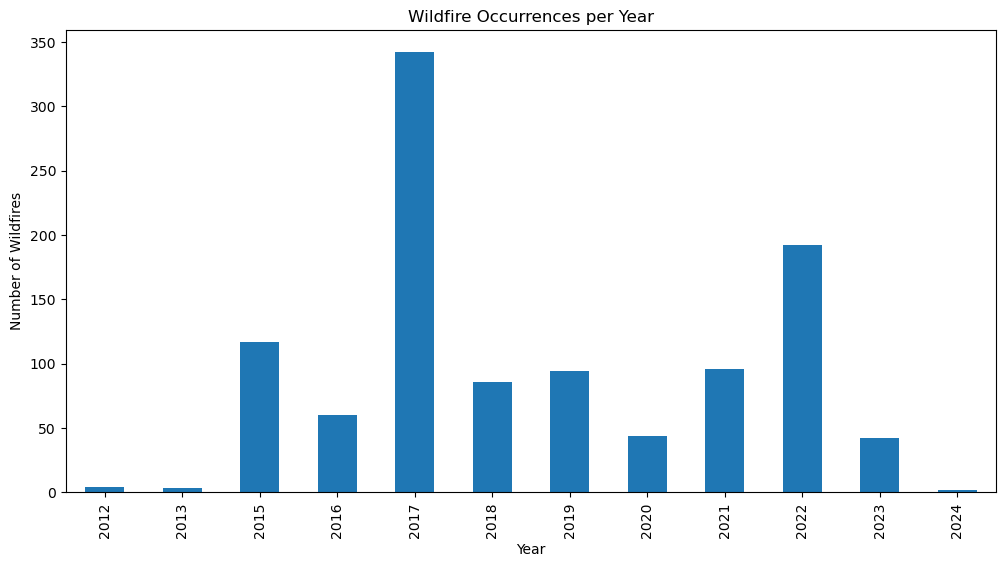

In [132]:
import matplotlib.pyplot as plt

# Convert event_time to datetime format
final_df["event_time"] = pd.to_datetime(final_df["event_time"], errors="coerce")

# Plot wildfire occurrences per year
final_df["year"] = final_df["event_time"].dt.year
final_df.groupby("year").size().plot(kind="bar", figsize=(12, 6), title="Wildfire Occurrences per Year")

plt.xlabel("Year")
plt.ylabel("Number of Wildfires")
plt.show()

In [134]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define features and target
X = final_df[["fwi_scaled", "obj_type_encoded", "wui_label_encoded", "country_encoded"]]
y = final_df["standardized_damage_encoded"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Model evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.543778801843318
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.43      0.43      0.43         7
           2       0.12      0.11      0.12         9
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         0
           6       0.57      0.31      0.40        13
           8       0.00      0.00      0.00         1
           9       0.50      1.00      0.67         1
          10       0.29      0.40      0.33         5
          11       0.31      0.56      0.40         9
          12       0.44      0.56      0.49        39
          13       0.93      0.88      0.90        57
          14       0.42      0.28      0.33        18
          15       0.00      0.00      0.00         0
          16       0.61      0.53      0.56        38
          17       0.00      0.00      0.00         1

C:\Users\donri\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\donri\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\donri\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\donri\anaconda3\Lib\site-packages\sklea

In [136]:
# Create "high_risk_fire" column: 1 if FWI > 50, 0 otherwise
final_df["high_risk_fire"] = (final_df["fwi"] > 50).astype(int)

In [138]:
from sklearn.linear_model import LogisticRegression

# Define features and target
X = final_df[["obj_type_encoded", "wui_label_encoded", "country_encoded"]]
y = final_df["high_risk_fire"]  # Binary target (1 = High Risk, 0 = Low Risk)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Predictions
y_pred_logistic = logistic_model.predict(X_test)

# Model evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_logistic))
print(classification_report(y_test, y_pred_logistic))


Accuracy: 0.5576036866359447
              precision    recall  f1-score   support

           0       0.57      0.98      0.72       124
           1       0.00      0.00      0.00        93

    accuracy                           0.56       217
   macro avg       0.28      0.49      0.36       217
weighted avg       0.32      0.56      0.41       217



In [140]:
# Create "severe_damage" column: 1 if damage level is severe (>=3), 0 otherwise
final_df["severe_damage"] = (final_df["standardized_damage_encoded"] >= 3).astype(int)


In [142]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Define features and target
X = final_df[["fwi_scaled", "obj_type_encoded", "wui_label_encoded", "country_encoded"]]
y = final_df["severe_damage"]  # Target: Binary (1 = Severe Damage, 0 = Mild/No Damage)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Gradient Boosting model
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)

# Predictions
y_pred_gb = gb_model.predict(X_test)

# Model evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))


Accuracy: 0.9078341013824884
              precision    recall  f1-score   support

           0       0.33      0.11      0.17        18
           1       0.92      0.98      0.95       199

    accuracy                           0.91       217
   macro avg       0.63      0.55      0.56       217
weighted avg       0.88      0.91      0.89       217



In [144]:
# Create "spread_risk" column: 1 if FWI is extremely high (above 70), 0 otherwise
final_df["spread_risk"] = (final_df["fwi"] > 70).astype(int)

In [152]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Define features and target
X = gdf[["obj_type_encoded", "wui_label_encoded", "country_encoded"]]
y = gdf["spread_risk"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree model
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

# Predictions
y_pred_dt = dt_model.predict(X_test)

# Model evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


Accuracy: 0.8986175115207373
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       194
           1       1.00      0.04      0.08        23

    accuracy                           0.90       217
   macro avg       0.95      0.52      0.51       217
weighted avg       0.91      0.90      0.85       217



In [148]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Define features and target
X = final_df[["obj_type_encoded", "wui_label_encoded", "country_encoded"]]
y = final_df["spread_risk"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree model
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

# Predictions
y_pred_dt = dt_model.predict(X_test)

# Model evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


Accuracy: 0.8986175115207373
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       194
           1       1.00      0.04      0.08        23

    accuracy                           0.90       217
   macro avg       0.95      0.52      0.51       217
weighted avg       0.91      0.90      0.85       217



In [150]:
import geopandas as gpd
from shapely.geometry import Point

# Convert centroid coordinates into point geometry
final_df["geometry"] = final_df.apply(lambda row: Point(row["centroid_x"], row["centroid_y"]), axis=1)

# Convert final_df to GeoDataFrame while keeping all original columns
gdf = gpd.GeoDataFrame(final_df, geometry="geometry", crs="EPSG:4326")  # EPSG 4326 (WGS 84) is standard lat/lon

# Display first few rows (including all columns)
gdf.head()  


,fid,filename,obj_type,damage_gra,event_time,country,fwi,wui_label,standardized_damage,number_of_objects,...,obj_type_encoded,wui_label_encoded,country_encoded,standardized_damage_encoded,fwi_scaled,year,high_risk_fire,severe_damage,spread_risk,geometry
0,1,EMSR390_AOI01_GRA_PRODUCT_transportationL_r1_v2.shx,"Highways, Streets and Roads",No visible damage,2019-09-15,Greece,42.304688,forest_interface,No visible damage,211,...,17,0,7,12,-0.187798,2019,0,1,0,POINT (2317991.68181 4537059.97653)
1,447,EMSR390_AOI01_GRA_PRODUCT_naturalLandUseA_r1_v2.shx,Forests and Semi-natural Areas,Possibly damaged,2019-09-15,Greece,42.304688,forest_non_wui,Possibly damaged,3,...,12,2,7,16,-0.187798,2019,0,1,0,POINT (2316521.09015 4537338.13246)
2,1579,EMSR390_AOI01_GRA_PRODUCT_builtUpA_r1_v2.shx,Residential Buildings,Possibly damaged,2019-09-15,Greece,42.304688,forest_non_wui,Possibly damaged,11,...,35,2,7,16,-0.187798,2019,0,1,0,POINT (2317016.72076 4535391.03949)
3,1587,EMSR390_AOI01_GRA_PRODUCT_observedEventA_r1_v2.shx,Unknown,Not Analysed,2019-09-15,Greece,42.304688,forest_intermix,Not Analysed,1,...,44,1,7,14,-0.187798,2019,0,1,0,POINT (2316481.75151 4535904.77092)
4,1593,EMSR390_AOI01_GRA_PRODUCT_facilitiesA_r1_v2.shx,Complex Constructions on Industrial Sites,Possibly damaged,2019-09-15,Greece,42.304688,forest_intermix,Possibly damaged,23,...,9,1,7,16,-0.187798,2019,0,1,0,POINT (2316985.70367 4537632.20079)


In [154]:
final_df.columns

Index(['fid', 'filename', 'obj_type', 'damage_gra', 'event_time', 'country',
       'fwi', 'wui_label', 'standardized_damage', 'number_of_objects', 'crs',
       'shapefile_area', 'bounding_box_minx', 'bounding_box_miny',
       'bounding_box_maxx', 'bounding_box_maxy', 'centroid_x', 'centroid_y',
       'representative_point_x', 'representative_point_y', 'convex_hull_area',
       'number_of_geometries', 'perimeter_length', 'obj_type_encoded',
       'wui_label_encoded', 'country_encoded', 'standardized_damage_encoded',
       'fwi_scaled', 'year', 'high_risk_fire', 'severe_damage', 'spread_risk',
       'geometry'],
      dtype='object')

In [156]:
gdf.columns

Index(['fid', 'filename', 'obj_type', 'damage_gra', 'event_time', 'country',
       'fwi', 'wui_label', 'standardized_damage', 'number_of_objects', 'crs',
       'shapefile_area', 'bounding_box_minx', 'bounding_box_miny',
       'bounding_box_maxx', 'bounding_box_maxy', 'centroid_x', 'centroid_y',
       'representative_point_x', 'representative_point_y', 'convex_hull_area',
       'number_of_geometries', 'perimeter_length', 'obj_type_encoded',
       'wui_label_encoded', 'country_encoded', 'standardized_damage_encoded',
       'fwi_scaled', 'year', 'high_risk_fire', 'severe_damage', 'spread_risk',
       'geometry'],
      dtype='object')

In [158]:
gdf.to_csv("gdf_geom")

In [160]:
gdf['country'].unique()

array(['Greece', 'France', 'Portugal', 'Czech Republic', 'Spain',
       'Sweden', 'Italy', 'Germany', 'Cyprus', 'Latvia', 'Hungary',
       'North Macedonia', 'Croatia', 'United Kingdom', 'Bulgaria',
       'Poland', 'Slovenia', 'Albania', 'Ukraine'], dtype=object)

C:\Users\donri\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


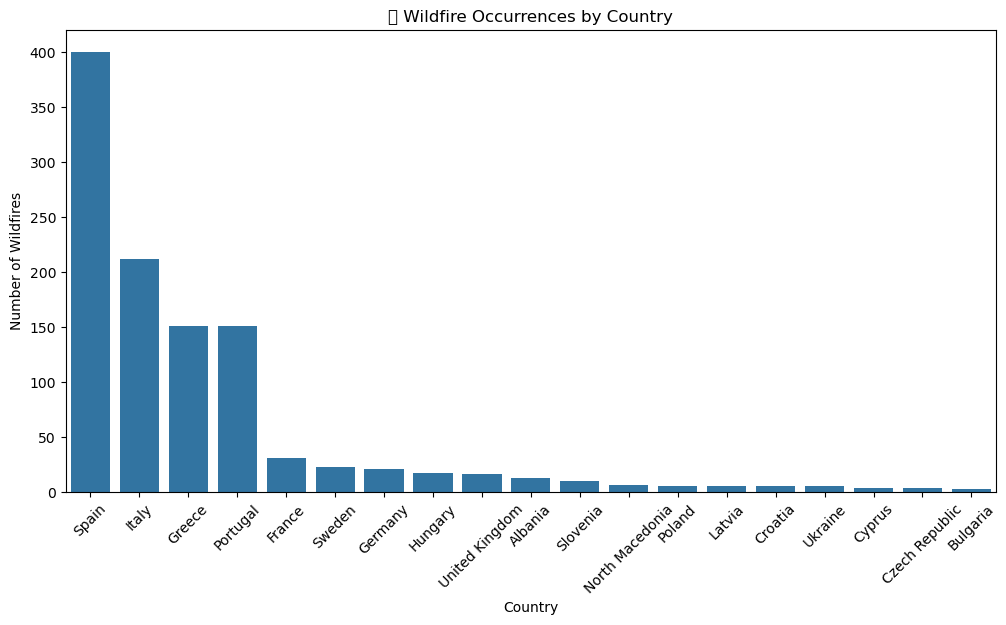

In [162]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import Point, box
plt.figure(figsize=(12, 6))
sns.countplot(data=gdf, x="country", order=gdf["country"].value_counts().index)
plt.title("🔥 Wildfire Occurrences by Country")
plt.xlabel("Country")
plt.ylabel("Number of Wildfires")
plt.xticks(rotation=45)
plt.show()

C:\Users\donri\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


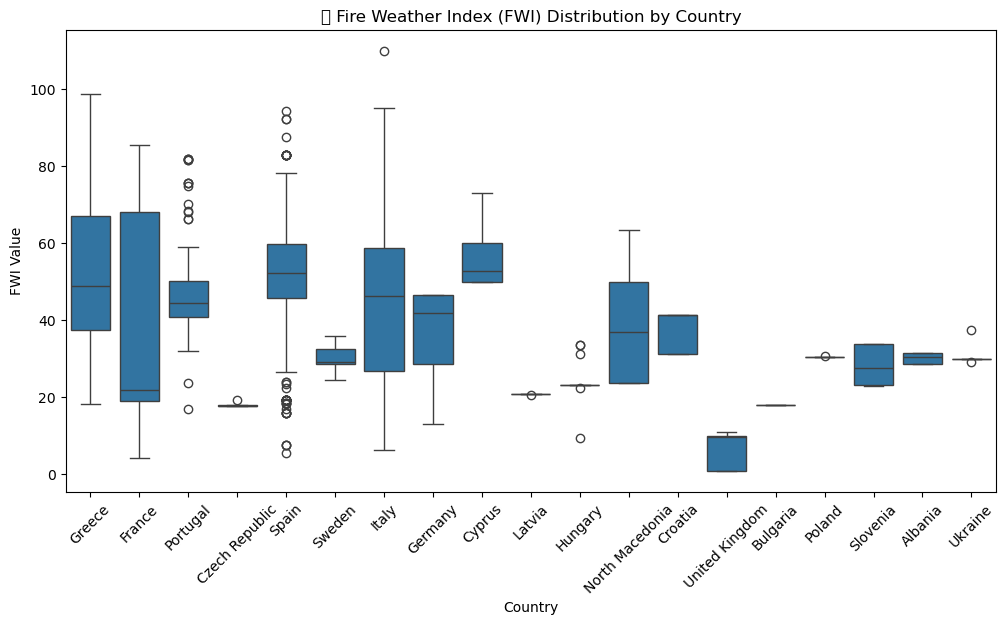

In [192]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=gdf, x="country", y="fwi")
plt.title("🌡️ Fire Weather Index (FWI) Distribution by Country")
plt.xlabel("Country")
plt.ylabel("FWI Value")
plt.xticks(rotation=45)
plt.show()


C:\Users\donri\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


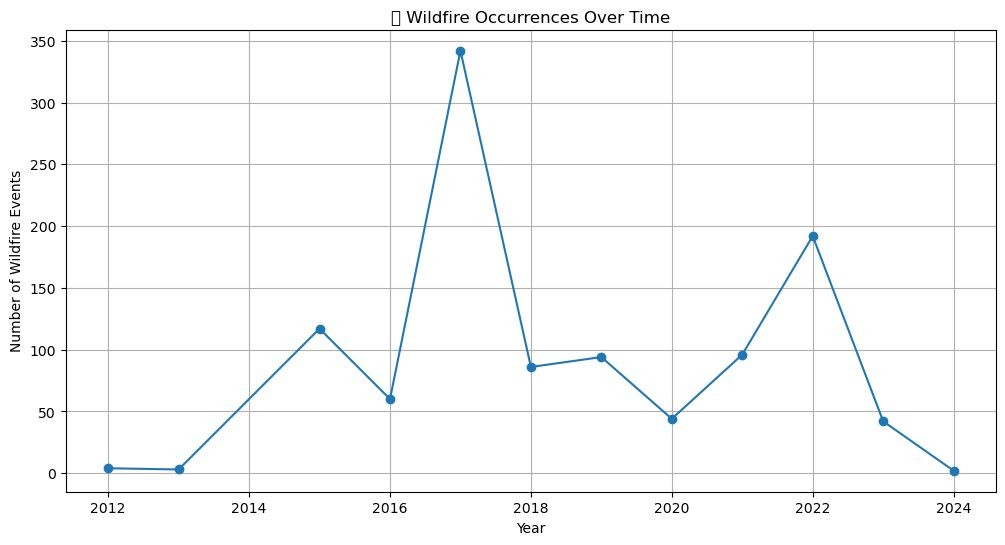

In [194]:
# Extract year from event_time
gdf["event_time"] = pd.to_datetime(gdf["event_time"], errors="coerce")
gdf["year"] = gdf["event_time"].dt.year

# Plot trend
plt.figure(figsize=(12, 6))
gdf["year"].value_counts().sort_index().plot(kind="line", marker="o", title="📈 Wildfire Occurrences Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Wildfire Events")
plt.grid()
plt.show()


C:\Users\donri\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128165 (\N{COLLISION SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


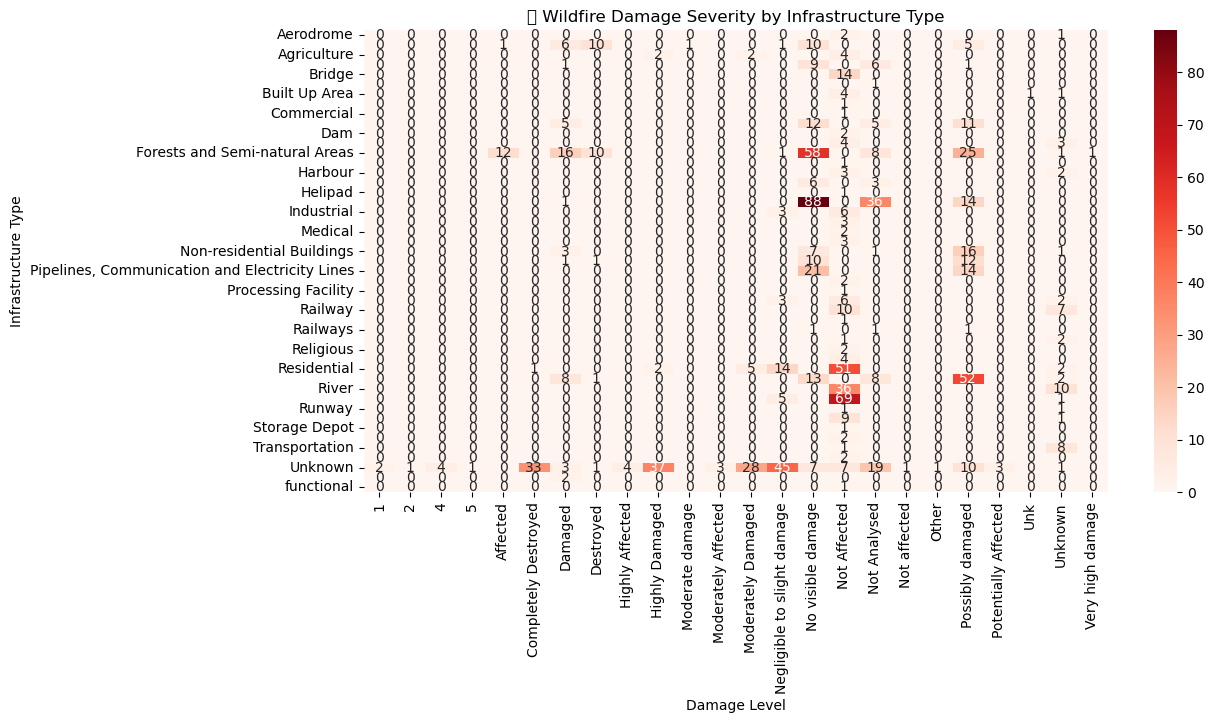

In [196]:
# Create pivot table
damage_pivot = gdf.pivot_table(index="obj_type", columns="damage_gra", aggfunc="size", fill_value=0)

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(damage_pivot, cmap="Reds", annot=True, fmt="d")
plt.title("💥 Wildfire Damage Severity by Infrastructure Type")
plt.xlabel("Damage Level")
plt.ylabel("Infrastructure Type")
plt.show()


C:\Users\donri\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


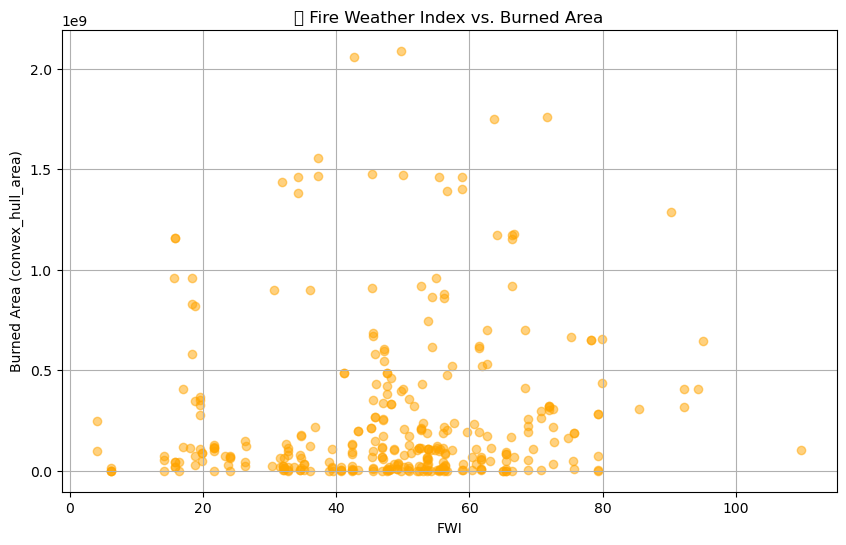

In [198]:
plt.figure(figsize=(10, 6))
plt.scatter(gdf["fwi"], gdf["convex_hull_area"], alpha=0.5, color="orange")
plt.title("🔥 Fire Weather Index vs. Burned Area")
plt.xlabel("FWI")
plt.ylabel("Burned Area (convex_hull_area)")
plt.grid()
plt.show()


C:\Users\donri\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127794 (\N{EVERGREEN TREE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


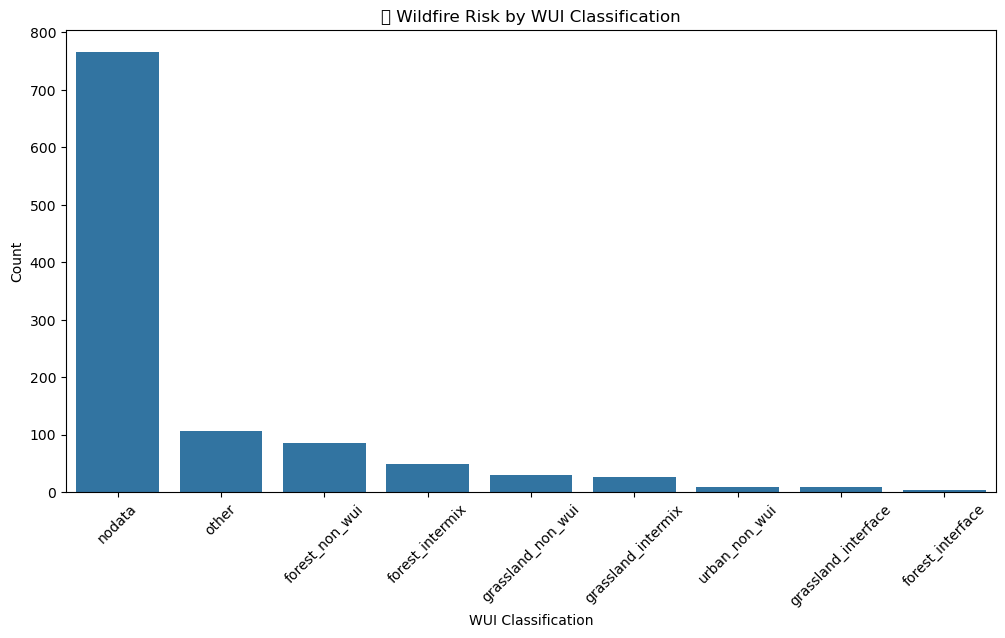

In [200]:
plt.figure(figsize=(12, 6))
sns.countplot(data=gdf, x="wui_label", order=gdf["wui_label"].value_counts().index)
plt.title("🌲 Wildfire Risk by WUI Classification")
plt.xlabel("WUI Classification")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


In [212]:
import geopandas as gpd

# Load the world map using Natural Earth data
world = gpd.read_file(r"C:\Users\donri\Downloads\ne_110m_admin_0_countries (1)")

# Check if the file loaded correctly
print(world.head())  # Print first few rows
print(world.crs)  # Check the coordinate system


        featurecla  scalerank  LABELRANK                   SOVEREIGNT SOV_A3  \
0  Admin-0 country          1          6                         Fiji    FJI   
1  Admin-0 country          1          3  United Republic of Tanzania    TZA   
2  Admin-0 country          1          7               Western Sahara    SAH   
3  Admin-0 country          1          2                       Canada    CAN   
4  Admin-0 country          1          2     United States of America    US1   

   ADM0_DIF  LEVEL               TYPE TLC                        ADMIN  ...  \
0         0      2  Sovereign country   1                         Fiji  ...   
1         0      2  Sovereign country   1  United Republic of Tanzania  ...   
2         0      2      Indeterminate   1               Western Sahara  ...   
3         0      2  Sovereign country   1                       Canada  ...   
4         1      2            Country   1     United States of America  ...   

      FCLASS_TR     FCLASS_ID     FCLASS_PL 

C:\Users\donri\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


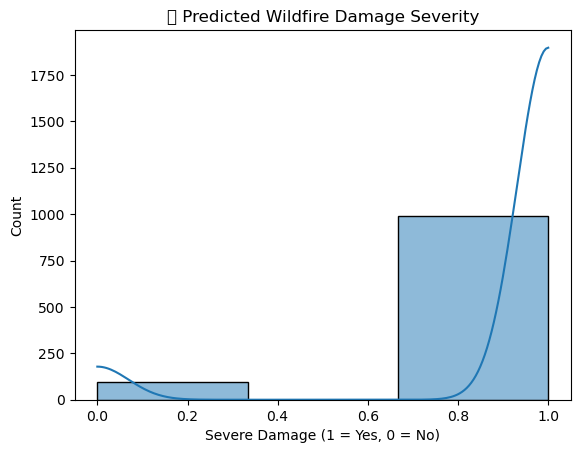

In [218]:
sns.histplot(gdf["severe_damage"], bins=3, kde=True)
plt.title("📊 Predicted Wildfire Damage Severity")
plt.xlabel("Severe Damage (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.show()


C:\Users\donri\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


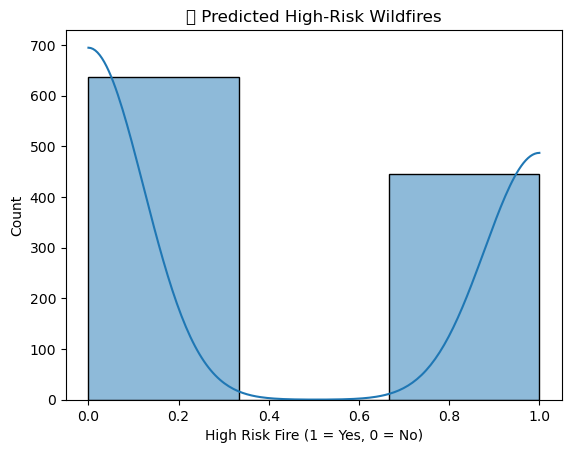

In [220]:
sns.histplot(gdf["high_risk_fire"], bins=3, kde=True)
plt.title("📊 Predicted High-Risk Wildfires")
plt.xlabel("High Risk Fire (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.show()


In [97]:
final_df.to_csv("final_wildfire_combined")

In [ ]:
import os
import geopandas as gpd
import pandas as pd

# Path to the shapefiles folder
shapefile_folder = r"C:\Users\donri\Business Challenge\ShapeFiles\Greece"  # Update with your path

# Load the original dataframe (df)
#df = pd.read_csv('original_dataframe.csv')  # Adjust the path if necessary

# List to store final results
final_records = []

# Define available extensions
available_extensions = ['.shp', '.shx', '.prj', '.dbf', '.cpg']

# Step 1: Extract unique filenames that end with '.shx' and corresponding metadata
shx_filenames = df[df['filename'].str.endswith('.shx')]['filename'].unique()

# Step 2: Create df1 with metadata corresponding to each unique filename
df1_records = []
for base_filename in shx_filenames:
    matching_row = df[df['filename'] == base_filename]
    
    if not matching_row.empty:
        record = {
            "filename": base_filename,
            "fid": matching_row['fid'].iloc[0],  # Adjust the column name if needed
            "country": matching_row['country'].iloc[0],
            "event_time": matching_row['event_time'].iloc[0],
            "fwi_index": matching_row['fwi'].iloc[0],  # Adjust the column name if needed
            "wui_label": matching_row['wui_label'].iloc[0]  # Adjust the column name if needed
        }
        df1_records.append(record)

df1 = pd.DataFrame(df1_records)

# Step 3: Now for every unique filename, we find the corresponding files in the folder
for base_filename in df1['filename']:
    # Remove .shx and replace it with other extensions for file search
    base_filename_without_shx = base_filename.replace('.shx', '')
    
    # List to store found files
    available_files = []

    # Check and add available extensions
    for ext in available_extensions:
        file_path = os.path.join(shapefile_folder, base_filename_without_shx + ext)
        if os.path.exists(file_path):
            available_files.append(file_path)

    # If the required extensions are found, process the shapefile
    if available_files:
        try:
            # Read the shapefile using GeoPandas (this will read all available extensions)
            gdf = gpd.read_file(available_files[0])  # GeoPandas automatically handles multiple extensions
            
            # Extract spatial features
            merged_geom = gdf.geometry.unary_union  # Merge all geometries into one
            
            # Calculate total area of the merged geometry
            area = merged_geom.area
            
            # Calculate bounding box (minx, miny, maxx, maxy)
            bounding_box = merged_geom.bounds  # (minx, miny, maxx, maxy)
            
            # Calculate centroid of the merged geometry
            centroid_point = merged_geom.centroid
            
            # Calculate representative point (guaranteed to be inside the geometry)
            repr_point = merged_geom.representative_point()
            
            # Extract corresponding metadata for the current filename
            matching_row = df[df['filename'] == base_filename]
            country = matching_row['country'].iloc[0]
            fwi_index = matching_row['fwi'].iloc[0]
            wui_label = matching_row['wui_label'].iloc[0]
            event_time = matching_row['event_time'].iloc[0]
            fid = matching_row['fid'].iloc[0]
            
            # Store the extracted spatial data and metadata
            record = {
                "event_id": fid,
                "shapefile_area": area,
                "bounding_box_minx": bounding_box[0],
                "bounding_box_miny": bounding_box[1],
                "bounding_box_maxx": bounding_box[2],
                "bounding_box_maxy": bounding_box[3],
                "centroid_x": centroid_point.x,
                "centroid_y": centroid_point.y,
                "representative_point_x": repr_point.x,
                "representative_point_y": repr_point.y,
                "country": country,
                "fwi_index": fwi_index,
                "wui_label": wui_label,
                "event_time": event_time
            }
            
            final_records.append(record)
            print(f"Processed file: {base_filename}")  # Print the processed file name
            
        except Exception as e:
            print(f"Error processing {base_filename}: {e}")
    else:
        print(f"Missing required extensions for file: {base_filename}")

# Step 4: Create a DataFrame from the collected records
final_df = pd.DataFrame(final_records)


In [394]:
final_df.head()

,event_id,shapefile_area,bounding_box_minx,bounding_box_miny,bounding_box_maxx,bounding_box_maxy,centroid_x,centroid_y,representative_point_x,representative_point_y,country,fwi_index,wui_label,event_time,wui_label_encoded
0,1,0.000000,20.745596,37.651281,20.864772,37.737796,20.822845,37.699402,20.823101,37.699702,Greece,42.304688,forest_interface,2019-09-15,0
1,447,0.007238,20.745563,37.644268,20.864779,37.737825,20.809666,37.701452,20.804995,37.690880,Greece,42.304688,forest_non_wui,2019-09-15,2
2,1579,0.000005,20.795815,37.670819,20.822790,37.699706,20.814114,37.687622,20.821449,37.699128,Greece,42.304688,forest_non_wui,2019-09-15,2
3,1587,0.000834,20.780711,37.661771,20.829094,37.717881,20.809309,37.691273,20.813824,37.692859,Greece,42.304688,forest_intermix,2019-09-15,1
4,1593,0.000016,20.790795,37.682029,20.823564,37.715901,20.813835,37.703552,20.818977,37.708011,Greece,42.304688,forest_intermix,2019-09-15,1


In [376]:
final_df.columns

Index(['event_id', 'shapefile_area', 'bounding_box_minx', 'bounding_box_miny',
       'bounding_box_maxx', 'bounding_box_maxy', 'centroid_x', 'centroid_y',
       'representative_point_x', 'representative_point_y', 'country',
       'fwi_index', 'wui_label', 'event_time'],
      dtype='object')

In [401]:
import numpy as np

# Ensure 'fid' is in both dataframes and exists as a column
if 'fid' in df.columns and 'event_id' in final_df.columns:
    # Merge the two dataframes on the 'fid' column to add the 'damage_gra' to final_df
    final_df = final_df.merge(df[['fid', 'damage_gra']], left_on='event_id', right_on='fid', how='left')
    
    
    # Explicitly fill missing 'damage_gra' values with NaN (this is the default behavior of left join)
    final_df['damage_gra'] = final_df['damage_gra'].apply(lambda x: np.nan if pd.isna(x) else x)
    
    # Retrieve only the fids that are present in final_df (after the merge)
    fids_present = final_df['event_id'].unique()
    
    # Print the first few rows to verify
    print(final_df[['fid', 'damage_gra']].head())
    print(f"FIDs present in final_df: {fids_present[:10]}")  # Displaying first 10 fids for example
else:
    print("The 'fid' column is missing in one of the dataframes.")


    fid         damage_gra
0     1  No visible damage
1   447   Possibly damaged
2  1579   Possibly damaged
3  1587       Not Analysed
4  1593   Possibly damaged
FIDs present in final_df: [   1  447 1579 1587 1593 1602 1603 2221 2747 2833]


In [425]:
import numpy as np

# Ensure 'event_id' is in final_df and 'fid' is in df
if 'event_id' in final_df.columns and 'fid' in df.columns:
    # Merge the two dataframes on 'event_id' (final_df) and 'fid' (df) column to add 'obj_type' to final_df
    final_df = final_df.merge(df[['fid', 'obj_type']], left_on='event_id', right_on='fid', how='left')
    
    # Fill missing 'obj_type' values with NaN if necessary (though merge already handles this with NaN for missing values)
    final_df['obj_type'] = final_df['obj_type'].apply(lambda x: np.nan if pd.isna(x) else x)
    
    # Retrieve only the 'event_id' (fid) that are present in final_df after the merge
    obj_type_present = final_df['event_id'].unique()
    
    # Print the first few rows to verify
    print(final_df[['event_id', 'obj_type']].head())
    print(f"Event IDs present in final_df: {obj_type_present[:10]}")  # Displaying first 10 event_ids for example
else:
    print("The 'event_id' column is missing in final_df or 'fid' column is missing in df.")


   event_id                                      obj_type
0         1               211-Highways, Streets and Roads
1       447              3-Forests and Semi-natural Areas
2      1579                      11-Residential Buildings
3      1587                                           NaN
4      1593  23-Complex Constructions on Industrial Sites
Event IDs present in final_df: [   1  447 1579 1587 1593 1602 1603 2221 2747 2833]


In [433]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_columns = final_df.select_dtypes(include=['object']).columns.tolist()

# Initialize LabelEncoder
le = LabelEncoder()

# Loop through categorical columns and apply LabelEncoder
for col in categorical_columns:
    final_df[col + '_encoded'] = le.fit_transform(final_df[col])

# Check the first few rows to confirm encoding
print(final_df.head())


   event_id  shapefile_area  bounding_box_minx  bounding_box_miny  \
0         1        0.000000          20.745596          37.651281   
1       447        0.007238          20.745563          37.644268   
2      1579        0.000005          20.795815          37.670819   
3      1587        0.000834          20.780711          37.661771   
4      1593        0.000016          20.790795          37.682029   

   bounding_box_maxx  bounding_box_maxy  centroid_x  centroid_y  \
0          20.864772          37.737796   20.822845   37.699402   
1          20.864779          37.737825   20.809666   37.701452   
2          20.822790          37.699706   20.814114   37.687622   
3          20.829094          37.717881   20.809309   37.691273   
4          20.823564          37.715901   20.813835   37.703552   

   representative_point_x  representative_point_y  ...  event_time  \
0               20.823101               37.699702  ...  2019-09-15   
1               20.804995               37

In [439]:
final_df.head()

,event_id,shapefile_area,bounding_box_minx,bounding_box_miny,bounding_box_maxx,bounding_box_maxy,centroid_x,centroid_y,representative_point_x,representative_point_y,...,event_time,wui_label_encoded,fid_x,damage_gra,fid_y,obj_type,obj_type_encoded,country_encoded,event_time_encoded,damage_gra_encoded
0,1,0.000000,20.745596,37.651281,20.864772,37.737796,20.822845,37.699402,20.823101,37.699702,...,2019-09-15,0,1,No visible damage,1,"211-Highways, Streets and Roads",3,5,16,5
1,447,0.007238,20.745563,37.644268,20.864779,37.737825,20.809666,37.701452,20.804995,37.690880,...,2019-09-15,2,447,Possibly damaged,447,3-Forests and Semi-natural Areas,9,5,16,8
2,1579,0.000005,20.795815,37.670819,20.822790,37.699706,20.814114,37.687622,20.821449,37.699128,...,2019-09-15,2,1579,Possibly damaged,1579,11-Residential Buildings,0,5,16,8
3,1587,0.000834,20.780711,37.661771,20.829094,37.717881,20.809309,37.691273,20.813824,37.692859,...,2019-09-15,1,1587,Not Analysed,1587,NaN,14,5,16,7
4,1593,0.000016,20.790795,37.682029,20.823564,37.715901,20.813835,37.703552,20.818977,37.708011,...,2019-09-15,1,1593,Possibly damaged,1593,23-Complex Constructions on Industrial Sites,7,5,16,8


In [445]:
final_df.columns

Index(['event_id', 'shapefile_area', 'bounding_box_minx', 'bounding_box_miny',
       'bounding_box_maxx', 'bounding_box_maxy', 'centroid_x', 'centroid_y',
       'representative_point_x', 'representative_point_y', 'country',
       'fwi_index', 'wui_label', 'event_time', 'wui_label_encoded', 'fid_x',
       'damage_gra', 'fid_y', 'obj_type', 'obj_type_encoded',
       'country_encoded', 'event_time_encoded', 'damage_gra_encoded'],
      dtype='object')

In [447]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Features and Target for damage severity prediction
X_damage = final_df[['shapefile_area', 'bounding_box_minx', 'bounding_box_miny', 
                     'bounding_box_maxx', 'bounding_box_maxy', 'centroid_x', 'centroid_y', 
                     'fwi_index', 'wui_label_encoded', 'obj_type_encoded']]
y_damage = final_df['damage_gra_encoded']  # Target variable

# Train/Test Split
X_train_damage, X_test_damage, y_train_damage, y_test_damage = train_test_split(X_damage, y_damage, test_size=0.2, random_state=42)

# Train a RandomForest Regressor
model_damage = RandomForestRegressor(n_estimators=100, random_state=42)
model_damage.fit(X_train_damage, y_train_damage)

# Predictions
y_pred_damage = model_damage.predict(X_test_damage)

# Evaluate the model
mae_damage = mean_absolute_error(y_test_damage, y_pred_damage)
r2_damage = r2_score(y_test_damage, y_pred_damage)

print(f"Damage Severity Model - MAE: {mae_damage}, R2: {r2_damage}")


Damage Severity Model - MAE: 1.3675324675324676, R2: 0.08444856771889964


In [449]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Preprocessing: Encode damage_gra (if it's categorical)
le_damage_gra = LabelEncoder()
final_df['damage_gra_encoded'] = le_damage_gra.fit_transform(final_df['damage_gra'])

# Features and Target for classification
X_damage = final_df[['shapefile_area', 'bounding_box_minx', 'bounding_box_miny', 
                     'bounding_box_maxx', 'bounding_box_maxy', 'centroid_x', 'centroid_y', 
                     'fwi_index', 'wui_label_encoded', 'obj_type_encoded']]
y_damage = final_df['damage_gra_encoded']  # Target variable

# Train/Test Split
X_train_damage, X_test_damage, y_train_damage, y_test_damage = train_test_split(X_damage, y_damage, test_size=0.2, random_state=42)

# Train a RandomForest Classifier
model_damage = RandomForestClassifier(n_estimators=100, random_state=42)
model_damage.fit(X_train_damage, y_train_damage)

# Predictions
y_pred_damage = model_damage.predict(X_test_damage)

# Evaluate the model
accuracy_damage = accuracy_score(y_test_damage, y_pred_damage)
conf_matrix = confusion_matrix(y_test_damage, y_pred_damage)

print(f"Damage Severity Model (Classification) - Accuracy: {accuracy_damage}")
print(f"Confusion Matrix:\n{conf_matrix}")


Damage Severity Model (Classification) - Accuracy: 0.6493506493506493
Confusion Matrix:
[[ 0  0  3  0  0  2]
 [ 0  0  2  0  0  0]
 [ 0  0 35  0  1 11]
 [ 0  0  0  1  0  0]
 [ 0  0  1  0  3  1]
 [ 0  0  6  0  0 11]]
